### Further clean DELINQUENCY variables (round to 2 decimals / integerize / ...)

In [1]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [2]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [3]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [4]:
%load_ext autoreload
%autoreload

In [5]:
gc.collect()

36

In [6]:
START = time.time()

### Read Data

In [7]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/delinquency2.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/delinquency2.parquet")

Shape of data: (5531451, 46)
Shape of data: (11363762, 46)
CPU times: user 6.02 s, sys: 8.74 s, total: 14.8 s
Wall time: 10.8 s


In [8]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 837 ms, sys: 495 ms, total: 1.33 s
Wall time: 1.33 s


In [9]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 2.92 s, sys: 2.64 s, total: 5.56 s
Wall time: 7.74 s


In [10]:
del test

In [11]:
print(get_cols(train, "D_"))

['D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']


In [12]:
train["target"].mean()

0.24909720794778803

In [13]:
df_list = [train, public_test, private_test]

### D_102

40655 null count, 0.007 null proportion
0.4091 of the targets have label = 1


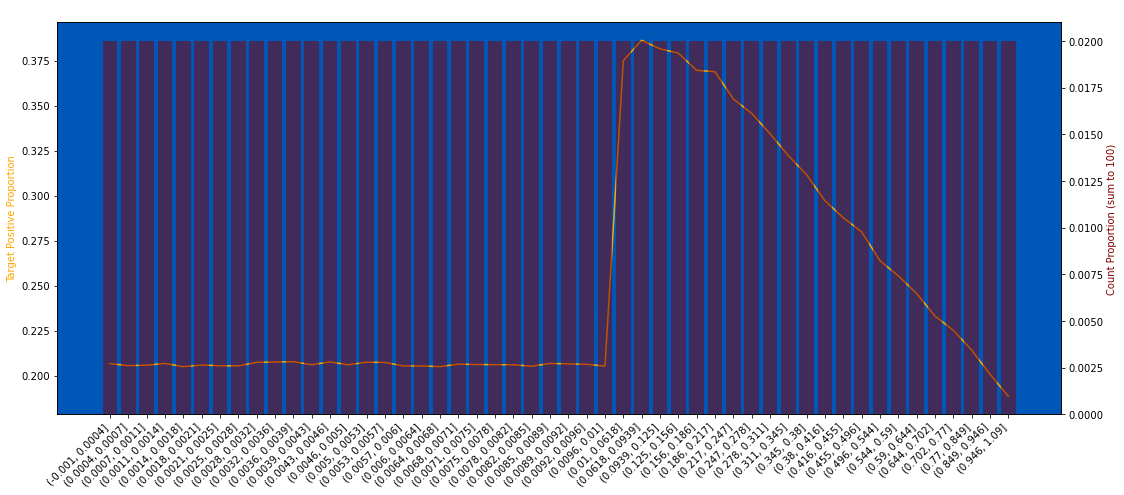

In [14]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True)

In [15]:
%%time
df_list = round_dfs(df_list, col="D_102", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 351 ms, sys: 1.31 s, total: 1.66 s
Wall time: 2.56 s


40655 null count, 0.007 null proportion
0.4091 of the targets have label = 1


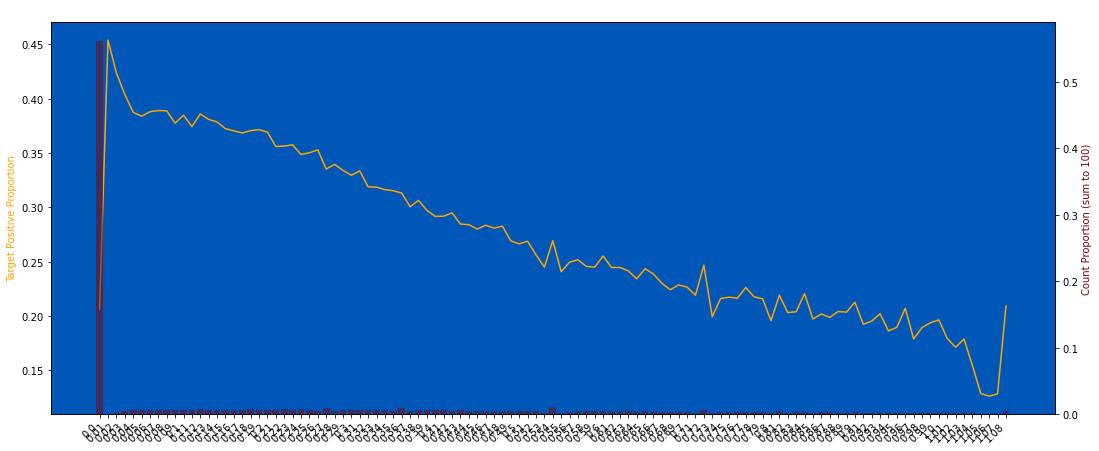

In [16]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True, without_drop_tail=True)

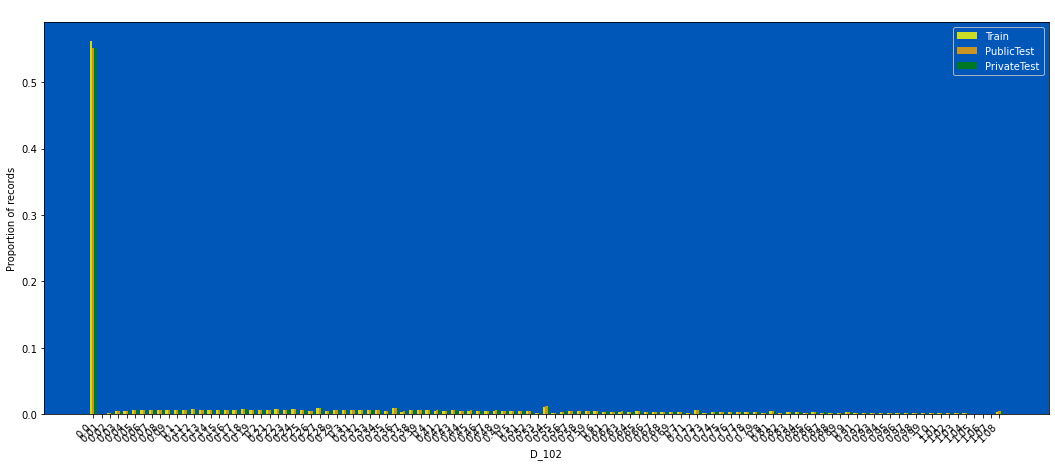

In [17]:
plot_train_test_distribution(df_list, "D_102", nunique_thr=3000, without_drop_tail=True)

### D_103

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


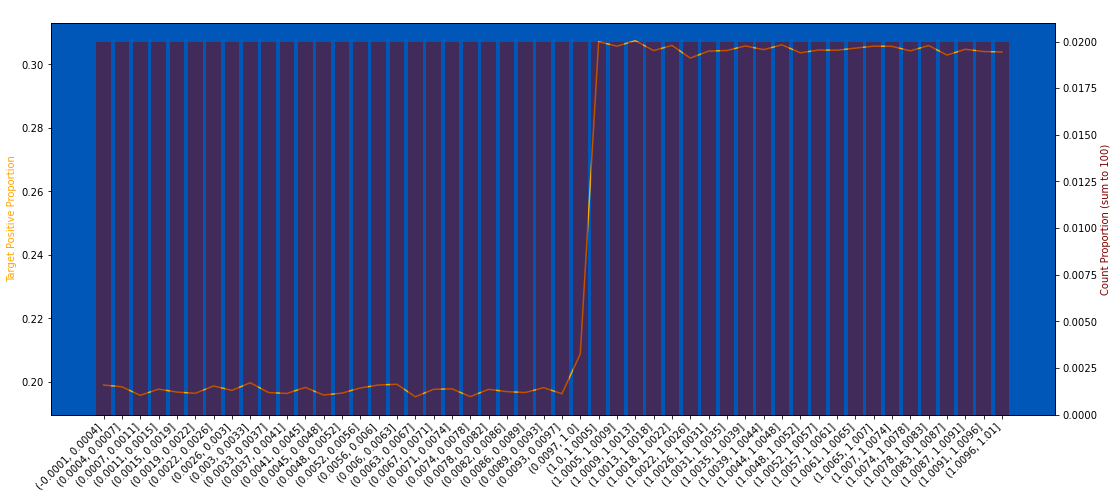

In [18]:
plot_target_check(train, "D_103", q=50, use_raw_bin=True)

In [19]:
%%time
df_list = round_dfs(df_list, col="D_103", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 342 ms, sys: 1.22 s, total: 1.56 s
Wall time: 2.47 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


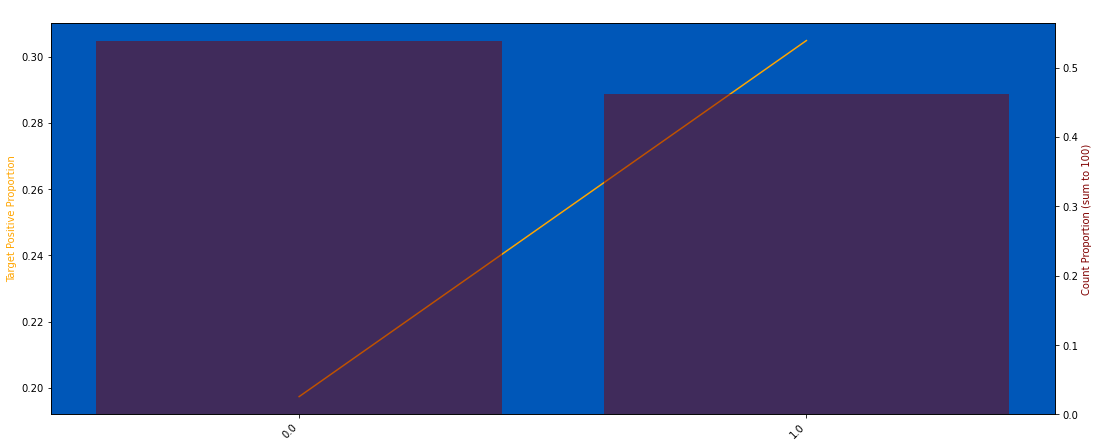

In [20]:
plot_target_check(train, "D_103", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

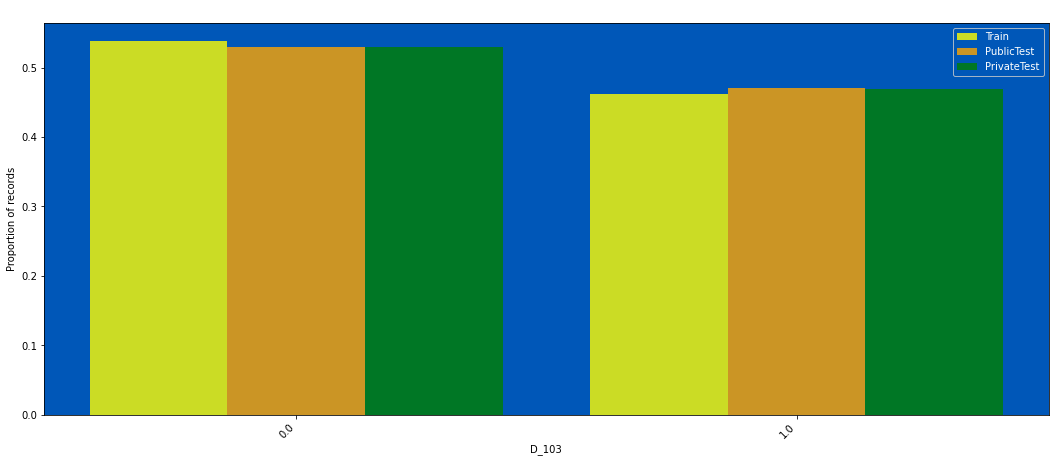

In [21]:
plot_train_test_distribution(df_list, "D_103", nunique_thr=3000, without_drop_tail=True)

### D_104

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


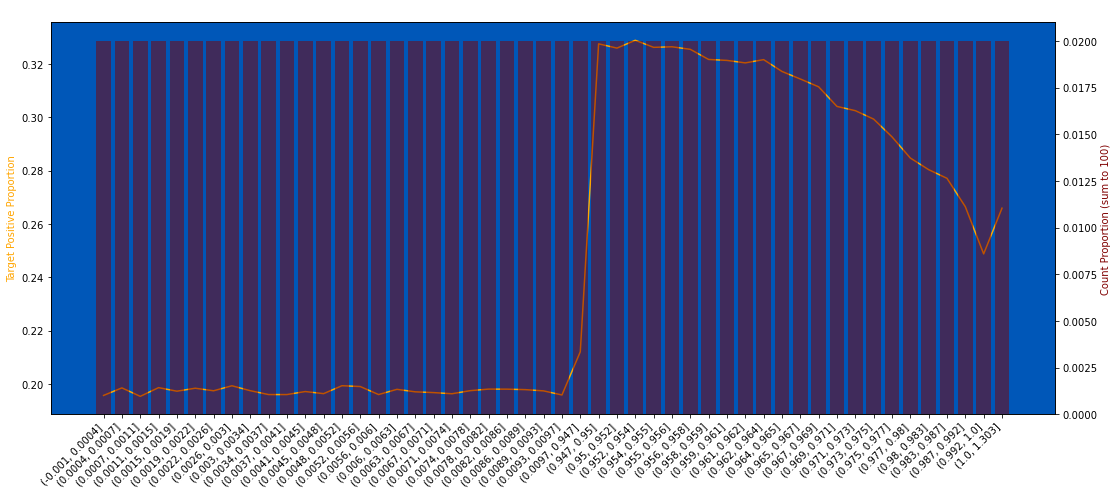

In [22]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True)

In [23]:
%%time
df_list = round_dfs(df_list, col="D_104", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 342 ms, sys: 1.24 s, total: 1.58 s
Wall time: 2.48 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


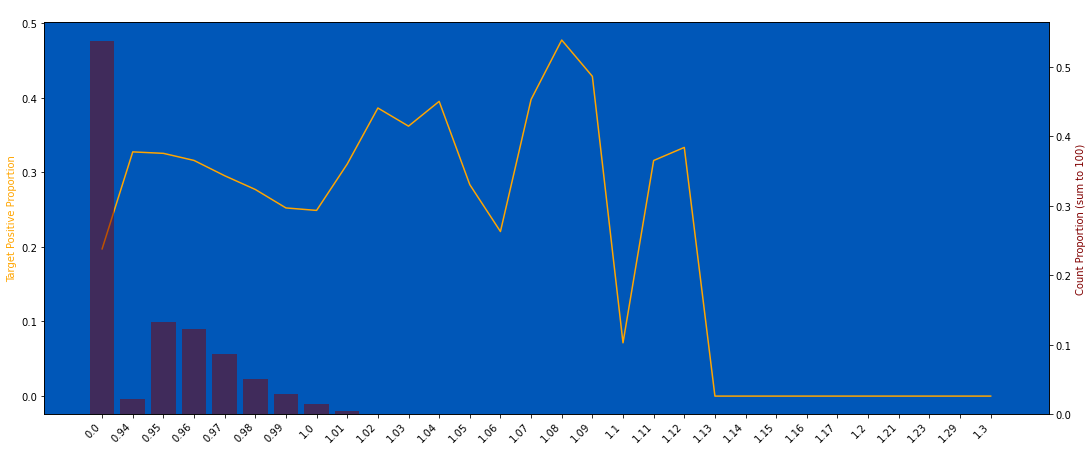

In [24]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True, without_drop_tail=True)

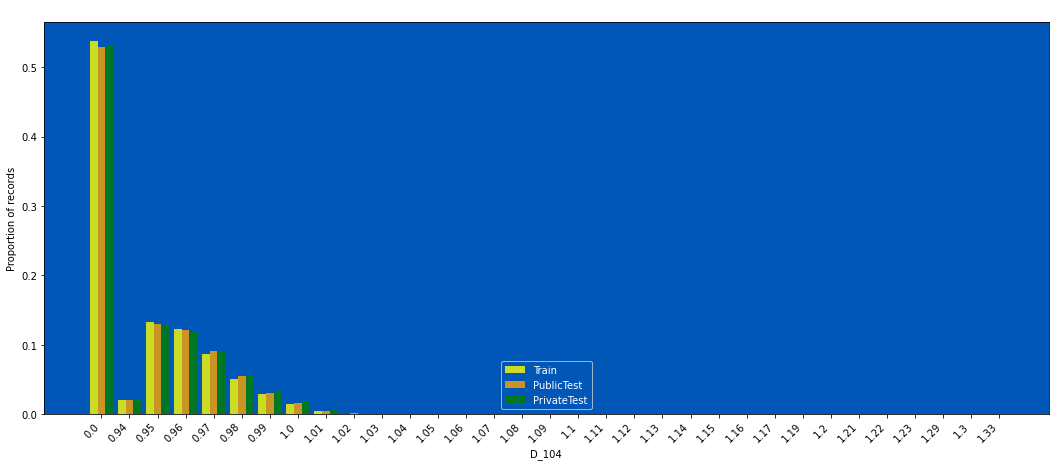

In [25]:
plot_train_test_distribution(df_list, "D_104", nunique_thr=3000, without_drop_tail=True)

### D_105

3021431 null count, 0.546 null proportion
0.2027 of the targets have label = 1


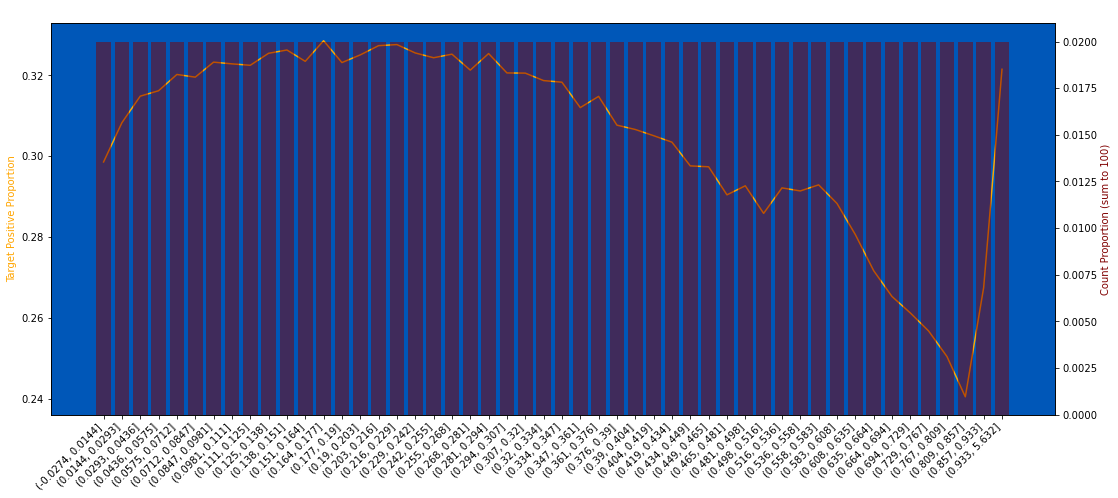

In [26]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True)

In [27]:
%%time
df_list = round_dfs(df_list, col="D_105", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 331 ms, sys: 1.31 s, total: 1.64 s
Wall time: 2.76 s


3021431 null count, 0.546 null proportion
0.2027 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


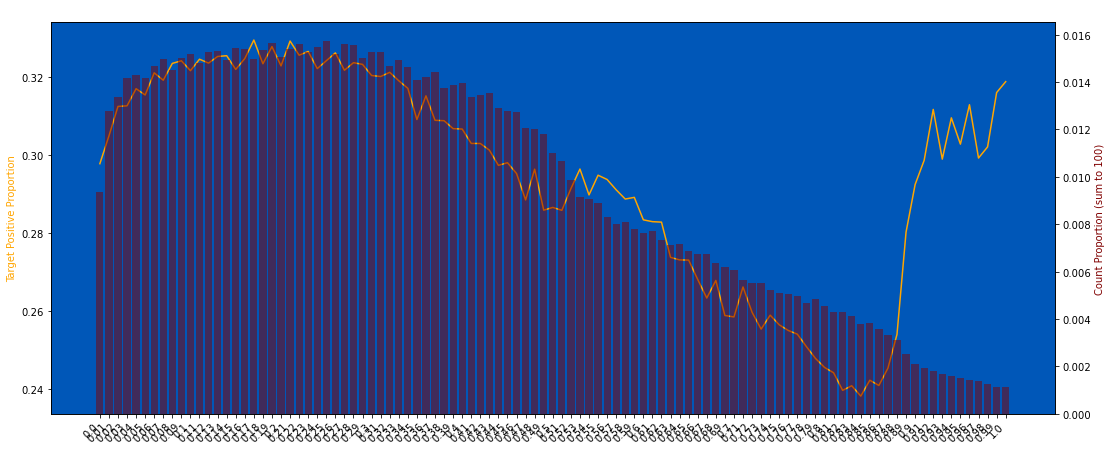

In [28]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


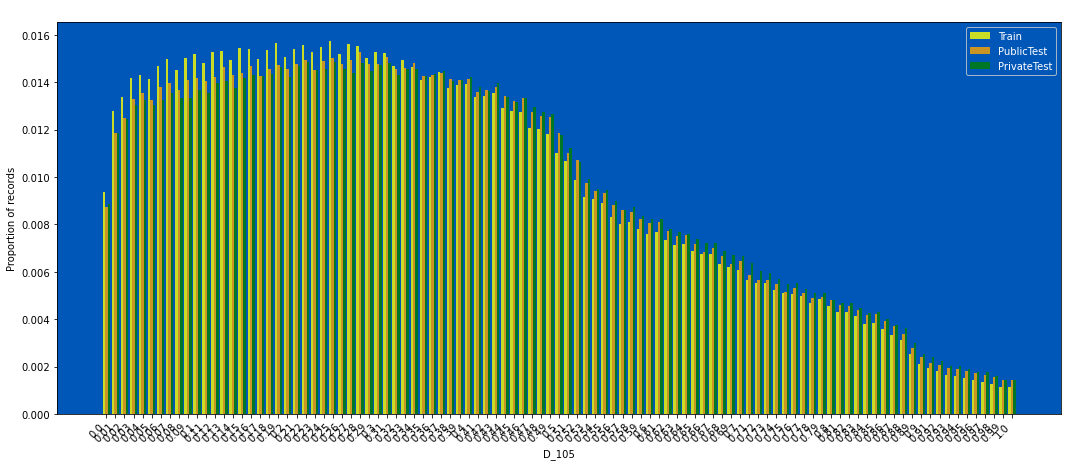

In [29]:
plot_train_test_distribution(df_list, "D_105", nunique_thr=3000)

**Train Test Drift: Moderate**

### D_106

4990102 null count, 0.902 null proportion
0.2164 of the targets have label = 1


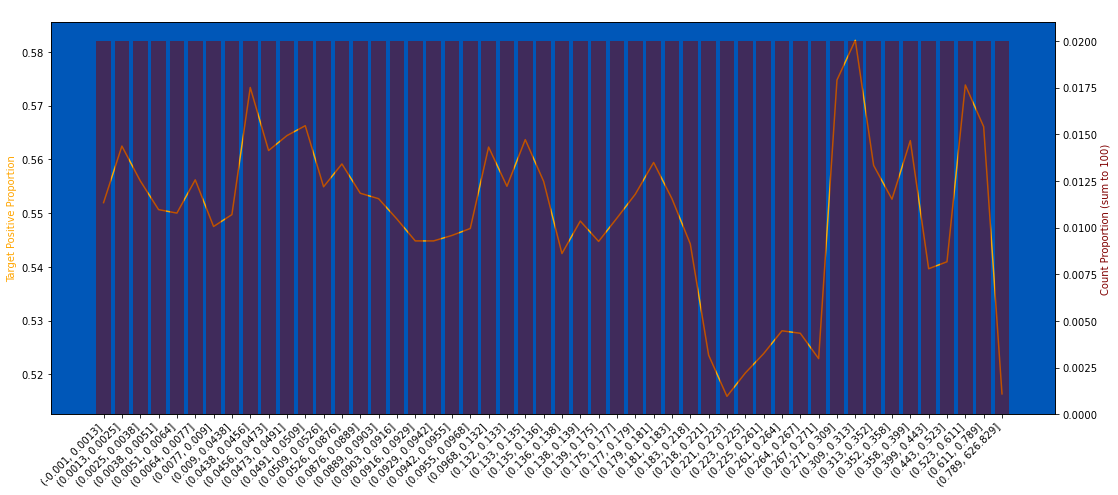

In [30]:
plot_target_check(train, "D_106", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [31]:
%%time
df_list = round_dfs(df_list, col="D_106", decimals=3, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 327 ms, sys: 1.34 s, total: 1.66 s
Wall time: 2.8 s


In [32]:
for df in df_list:
    df["D_106_"] = ((df["D_106"] + 0.001) / 0.0434).round(0)

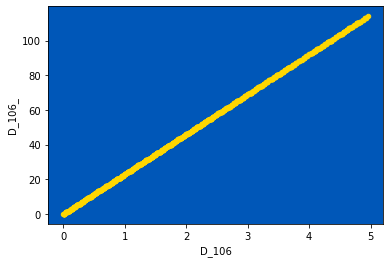

In [33]:
check_binning(train, "D_106", end=1000)

In [34]:
for df in df_list:
    df["D_106"] = ((df["D_106"] + 0.001) / 0.0434).round(0)

4990102 null count, 0.902 null proportion
0.2164 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


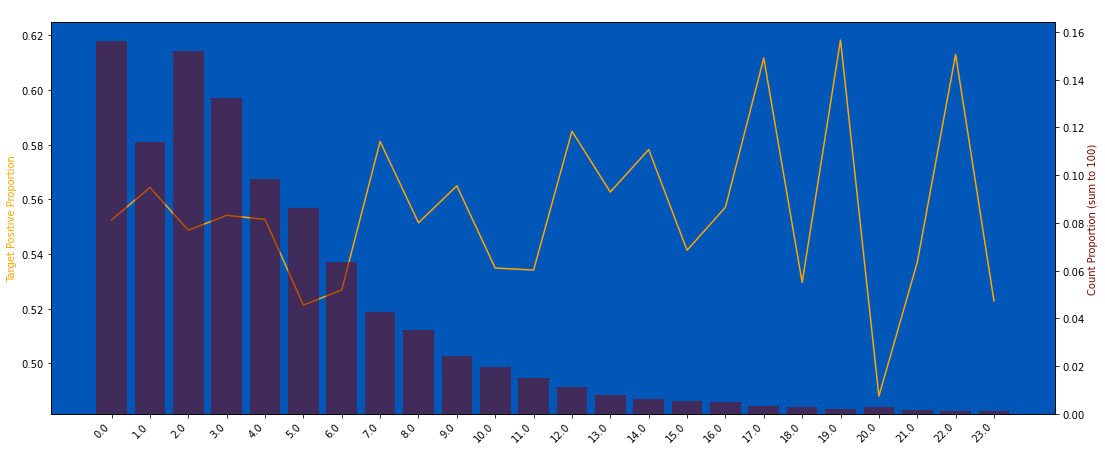

In [35]:
plot_target_check(train, "D_106", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


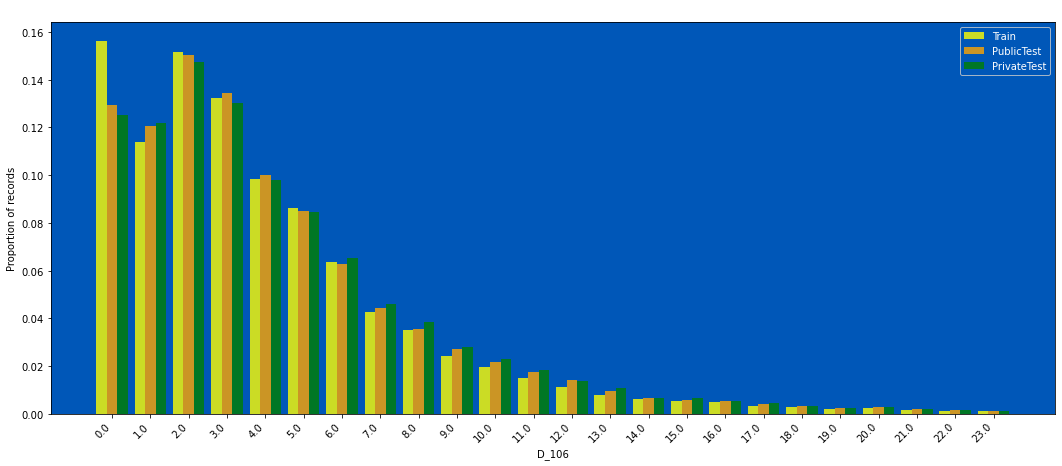

In [36]:
plot_train_test_distribution(df_list, "D_106", nunique_thr=3000)

### D_107

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


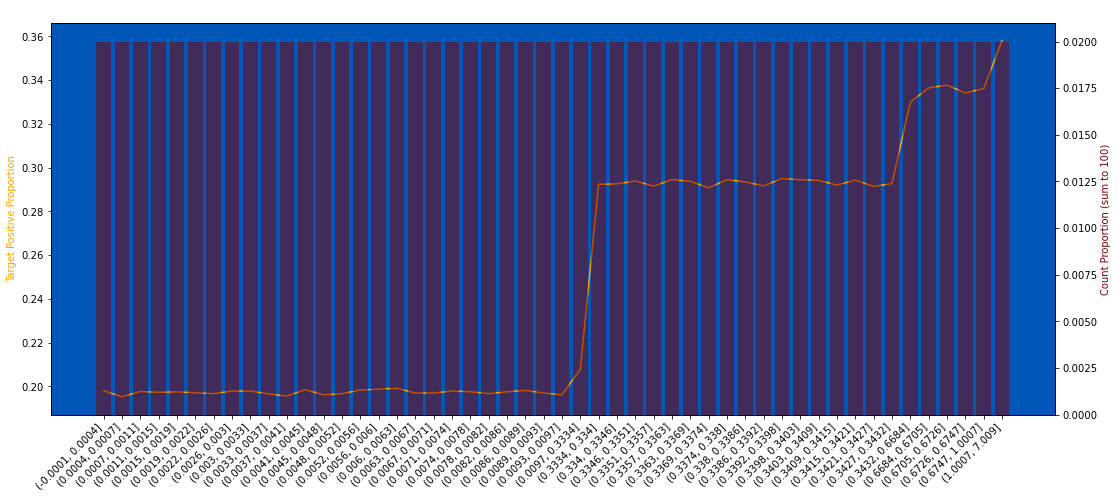

In [37]:
plot_target_check(train, "D_107", q=50, use_raw_bin=True)

In [38]:
%%time
df_list = round_dfs(df_list, col="D_107", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 318 ms, sys: 1.38 s, total: 1.7 s
Wall time: 2.6 s


In [39]:
for df in df_list:
    df["D_107_"] = ((df["D_107"] + 0.001) / 0.33).round(0)

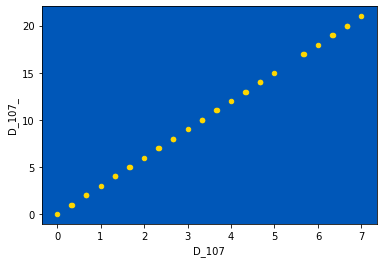

In [40]:
check_binning(train, "D_107", end=600)

In [41]:
for df in df_list:
    df["D_107"] = ((df["D_107"] + 0.001) / 0.33).round(0)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


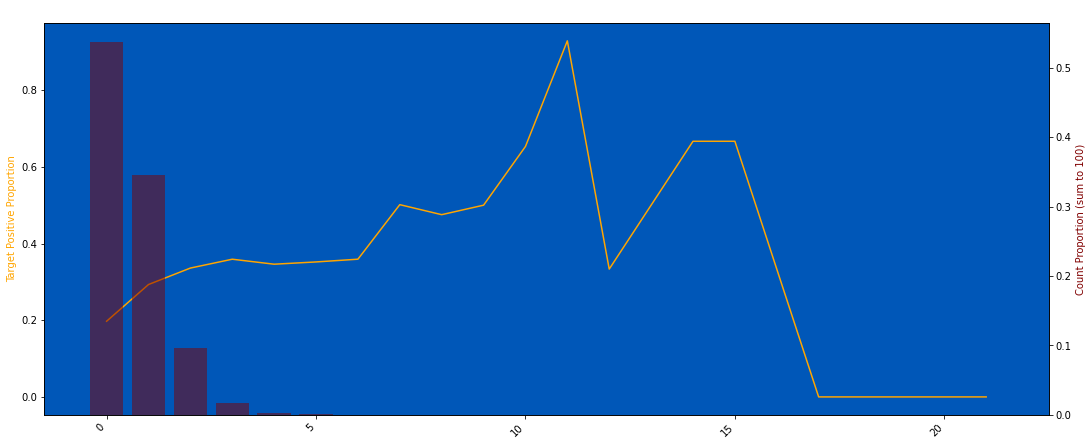

In [42]:
plot_target_check(train, "D_107", q=50, use_raw_bin=True, without_drop_tail=True)

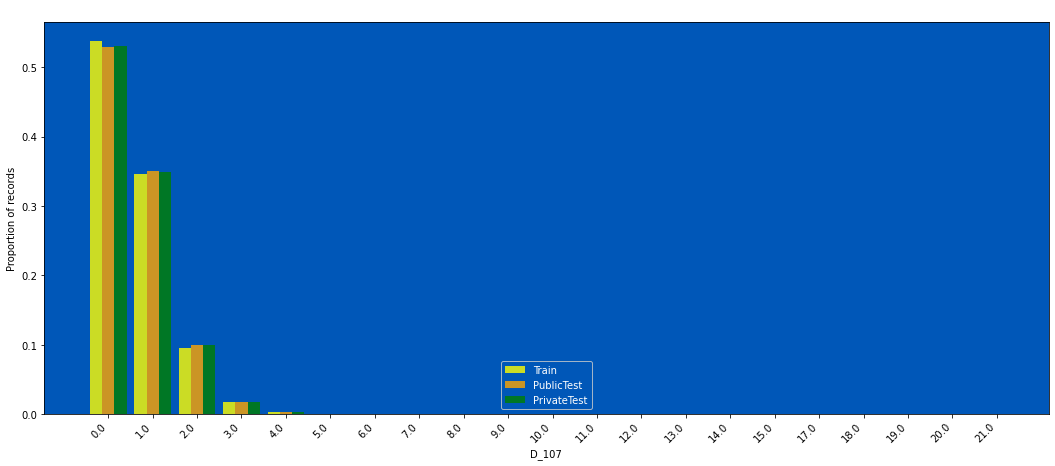

In [43]:
plot_train_test_distribution(df_list, "D_107", nunique_thr=3000, without_drop_tail=True)

### D_108

5502513 null count, 0.995 null proportion
0.2482 of the targets have label = 1


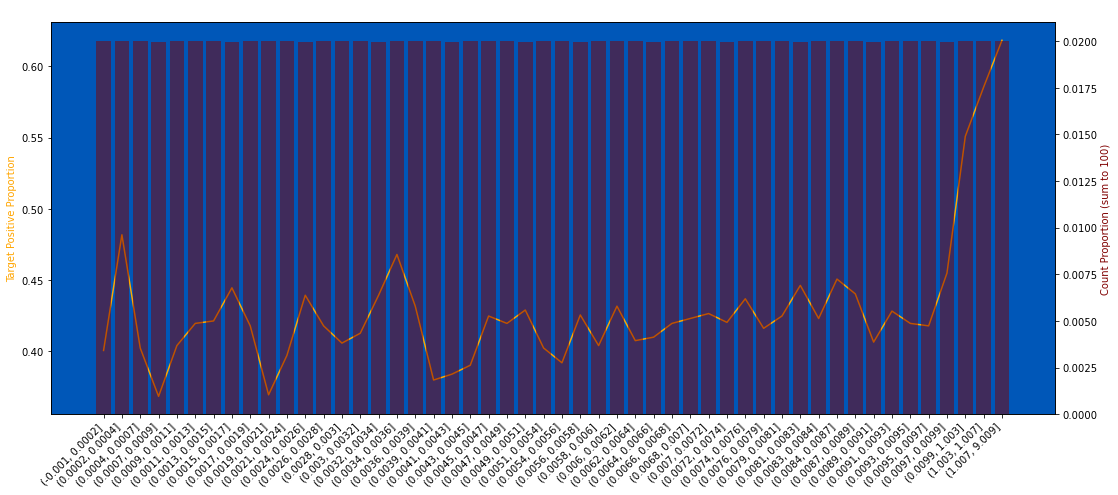

In [44]:
plot_target_check(train, "D_108", q=50, use_raw_bin=True)

In [45]:
%%time
df_list = round_dfs(df_list, col="D_108", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 318 ms, sys: 1.42 s, total: 1.74 s
Wall time: 2.85 s


5502513 null count, 0.995 null proportion
0.2482 of the targets have label = 1


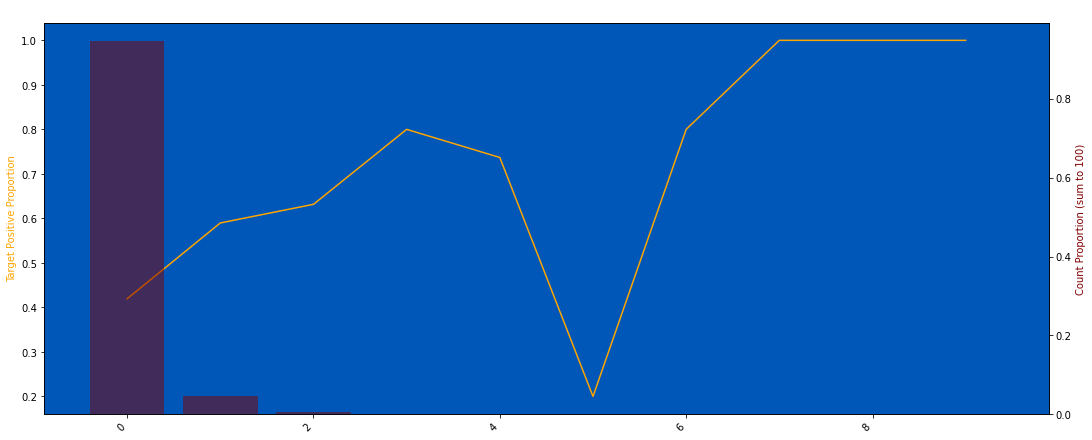

In [46]:
plot_target_check(train, "D_108", q=50, use_raw_bin=True, without_drop_tail=True)

5502513 null count, 0.995 null proportion
0.2482 of the targets have label = 1


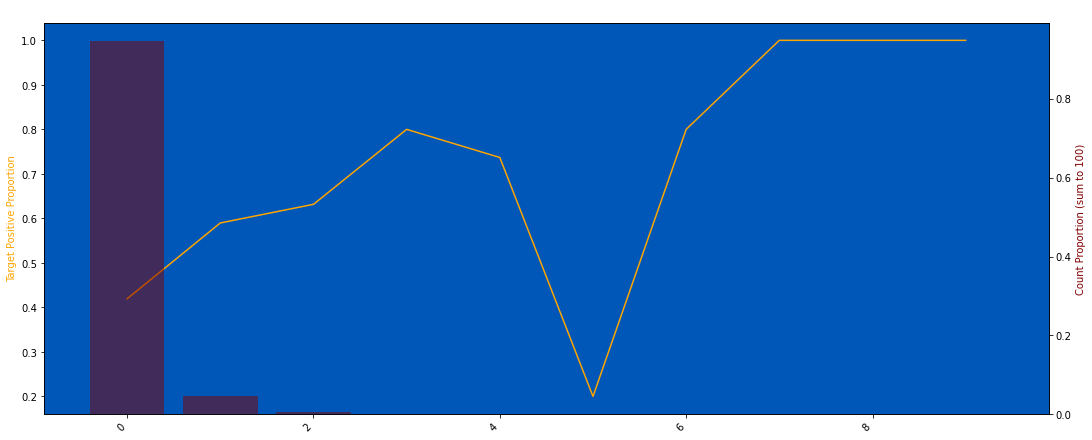

In [47]:
plot_target_check(train, "D_108", q=50, use_raw_bin=True, without_drop_tail=True)

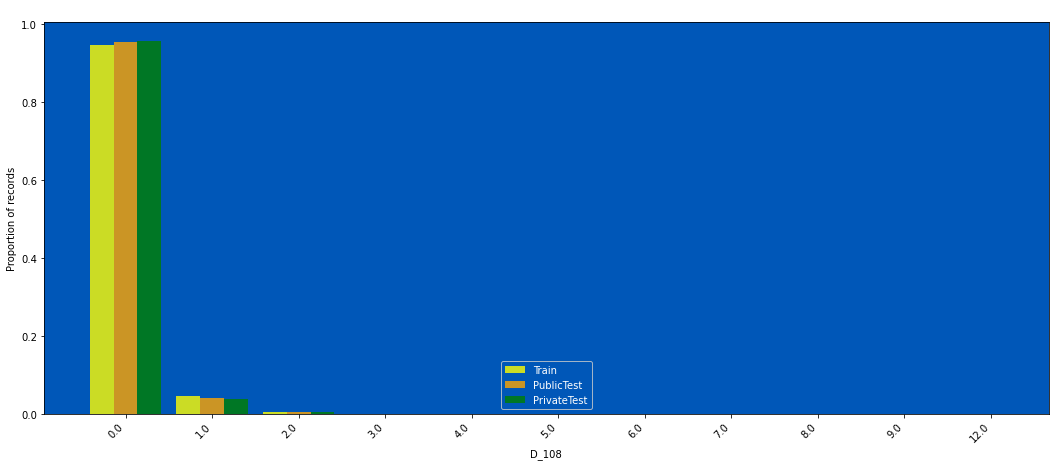

In [48]:
plot_train_test_distribution(df_list, "D_108", nunique_thr=3000, without_drop_tail=True)

### D_109

1597 null count, 0.000 null proportion
0.2298 of the targets have label = 1


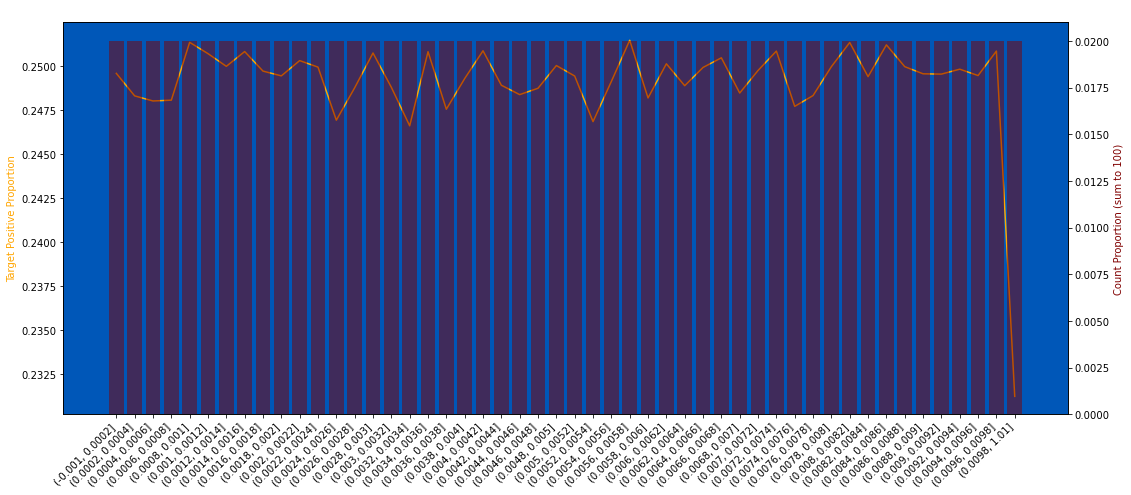

In [49]:
plot_target_check(train, "D_109", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [50]:
%%time
df_list = round_dfs(df_list, col="D_109", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 320 ms, sys: 1.33 s, total: 1.65 s
Wall time: 2.55 s


1597 null count, 0.000 null proportion
0.2298 of the targets have label = 1


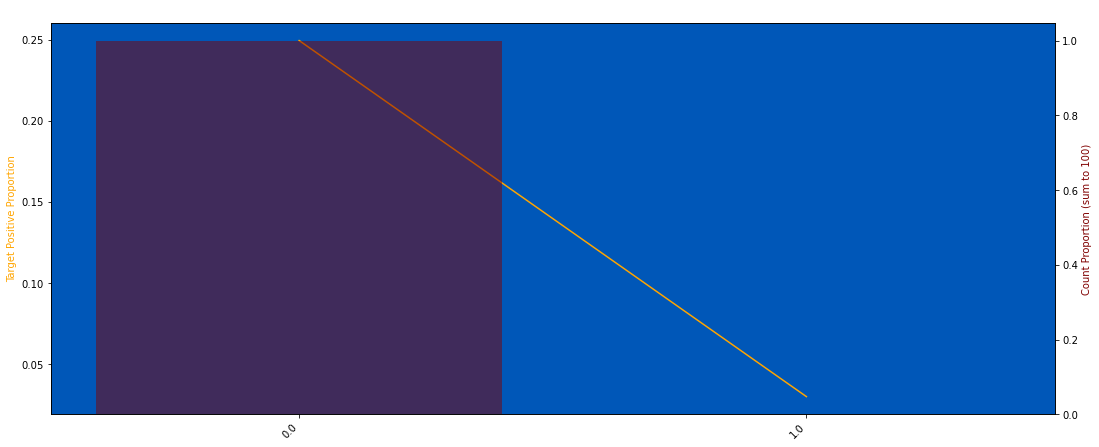

In [51]:
plot_target_check(train, "D_109", q=50, use_raw_bin=True, nunique_thr=10, strfy_x=True)

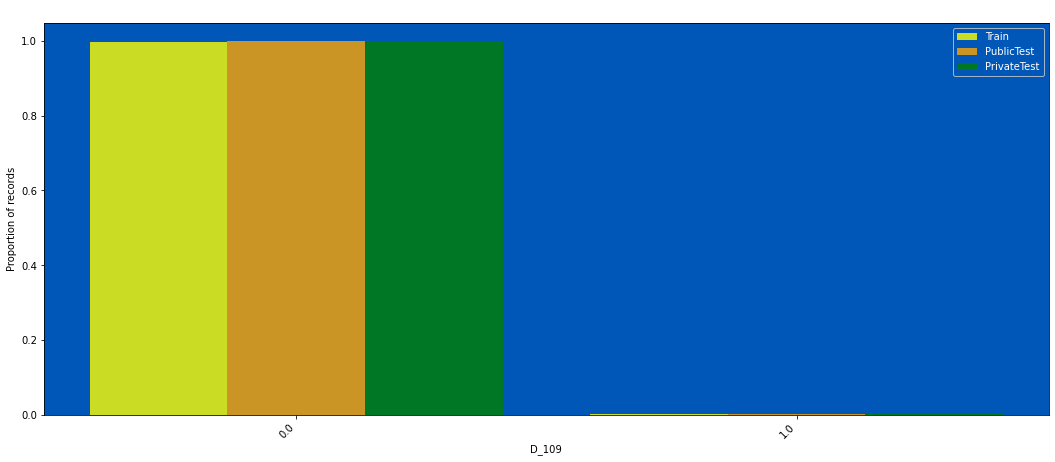

In [52]:
plot_train_test_distribution(df_list, "D_109", nunique_thr=10, without_drop_tail=True)

### D_110

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


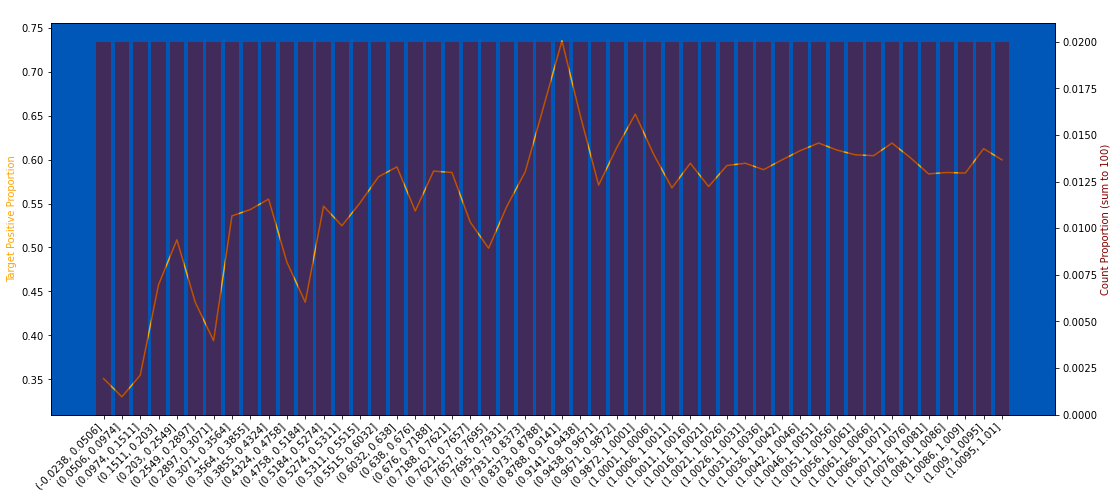

In [53]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True)

In [54]:
%%time
df_list = round_dfs(df_list, col="D_110", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 322 ms, sys: 1.33 s, total: 1.65 s
Wall time: 2.74 s


In [55]:
for df in df_list:
    df["D_110_"] = (df["D_110"] / 0.2).round(0)

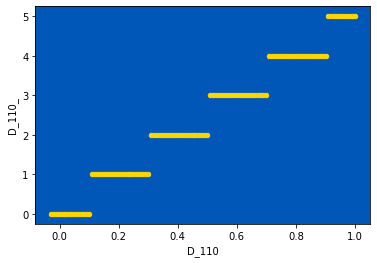

In [56]:
check_binning(train, "D_110", end=1000)

In [57]:
for df in df_list:
    df["D_110"] = (df["D_110"] / 0.2).round(0)

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


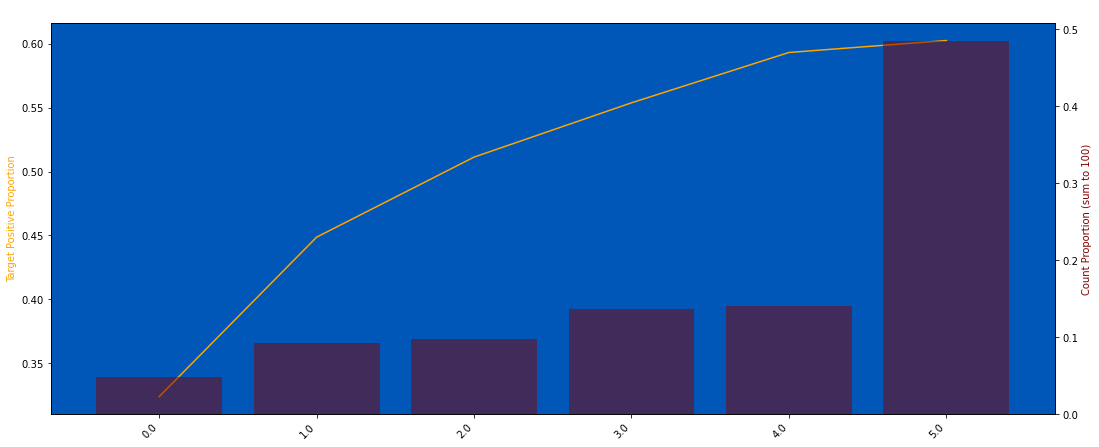

In [58]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

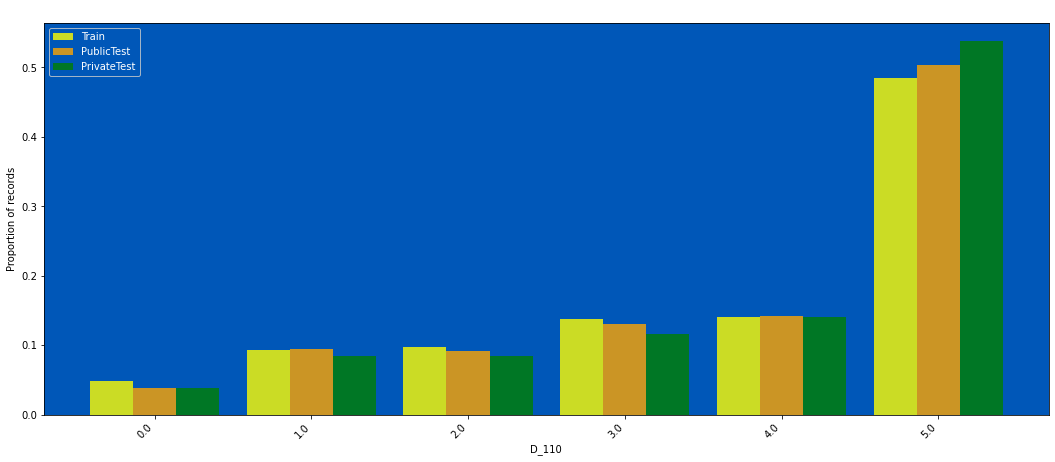

In [59]:
plot_train_test_distribution(df_list, "D_110", nunique_thr=3000, without_drop_tail=True)

### D_111

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


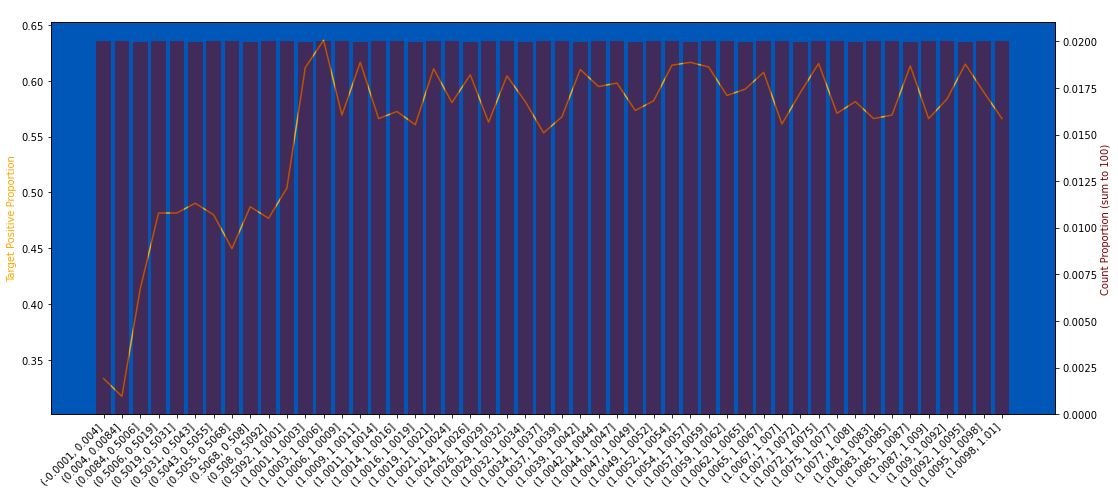

In [60]:
plot_target_check(train, "D_111", q=50, use_raw_bin=True)

In [61]:
%%time
df_list = round_dfs(df_list, col="D_111", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 304 ms, sys: 1.41 s, total: 1.72 s
Wall time: 2.81 s


In [62]:
for df in df_list:
    df["D_111_"] = (df["D_111"] * 2).round(0)

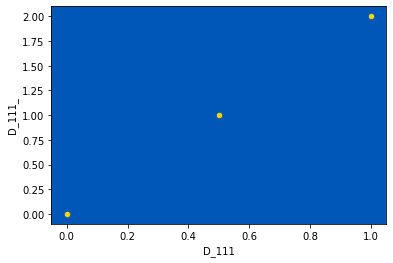

In [63]:
check_binning(train, "D_111", end=1000)

In [64]:
for df in df_list:
    df["D_111"] = (df["D_111"] * 2).round(0)

5500117 null count, 0.994 null proportion
0.2473 of the targets have label = 1


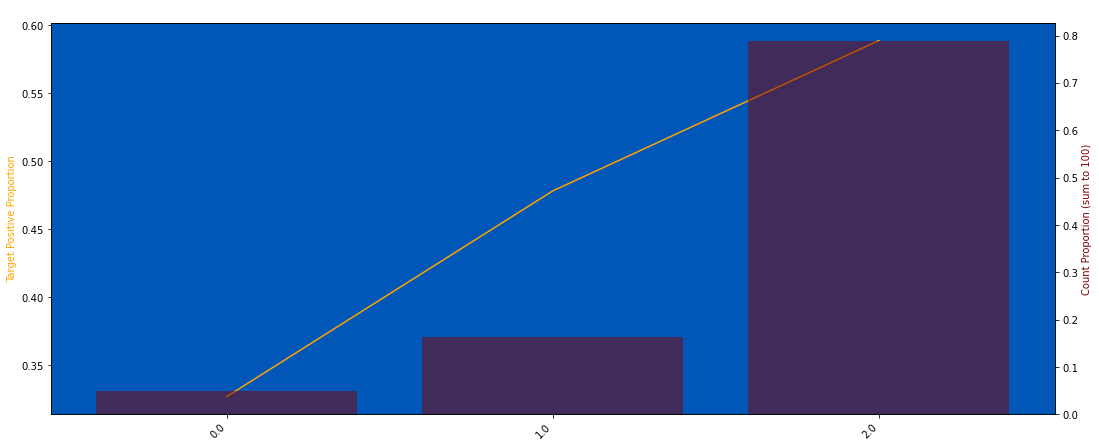

In [65]:
plot_target_check(train, "D_111", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

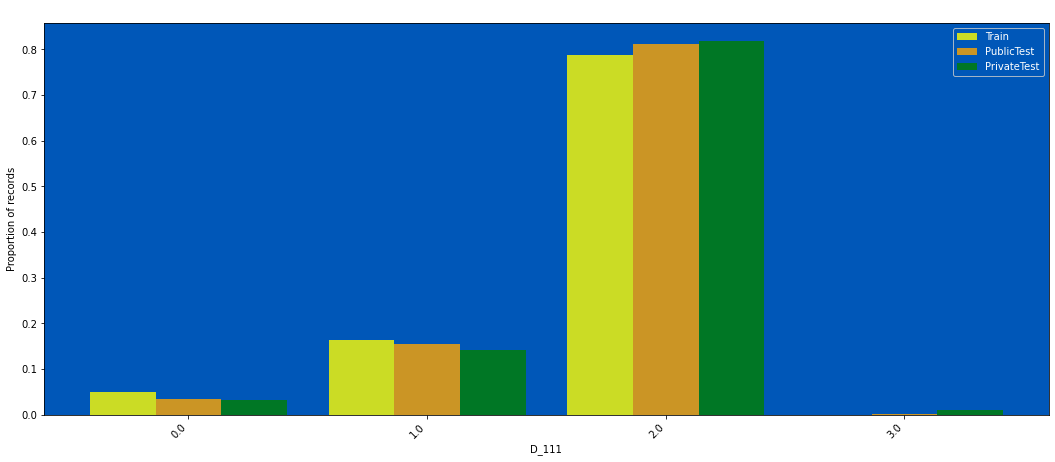

In [66]:
plot_train_test_distribution(df_list, "D_111", nunique_thr=3000, without_drop_tail=True)

### D_112 (Done)

2650 null count, 0.000 null proportion
0.3026 of the targets have label = 1


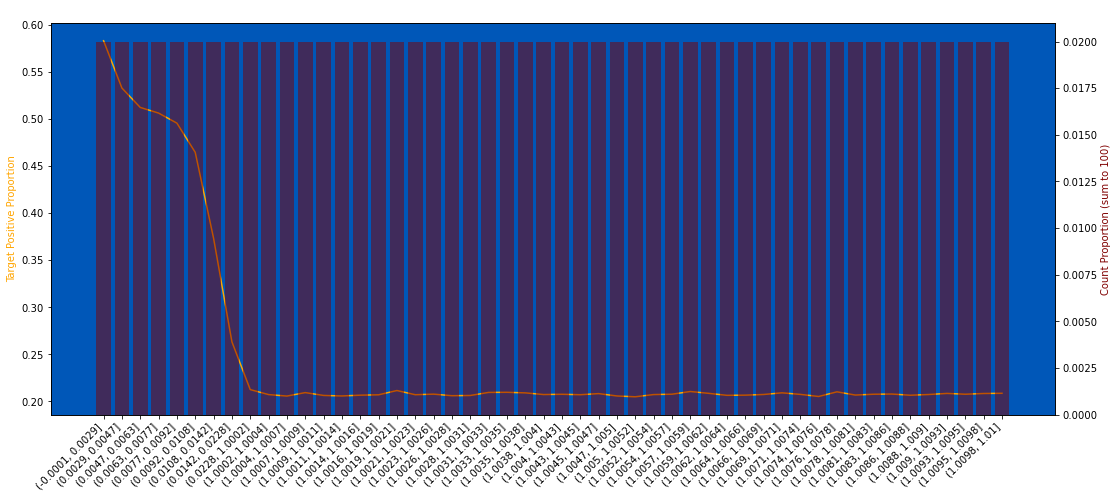

In [67]:
plot_target_check(train, "D_112", q=50, use_raw_bin=True, nunique_thr=1000)

In [68]:
%%time
df_list = round_dfs(df_list, col="D_112", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 308 ms, sys: 1.45 s, total: 1.76 s
Wall time: 2.67 s


In [69]:
for df in df_list:
    df["D_112"] = df["D_112"].map({0: 0, 0.01: 1, 0.02: 2, 1: 3})

2650 null count, 0.000 null proportion
0.3026 of the targets have label = 1


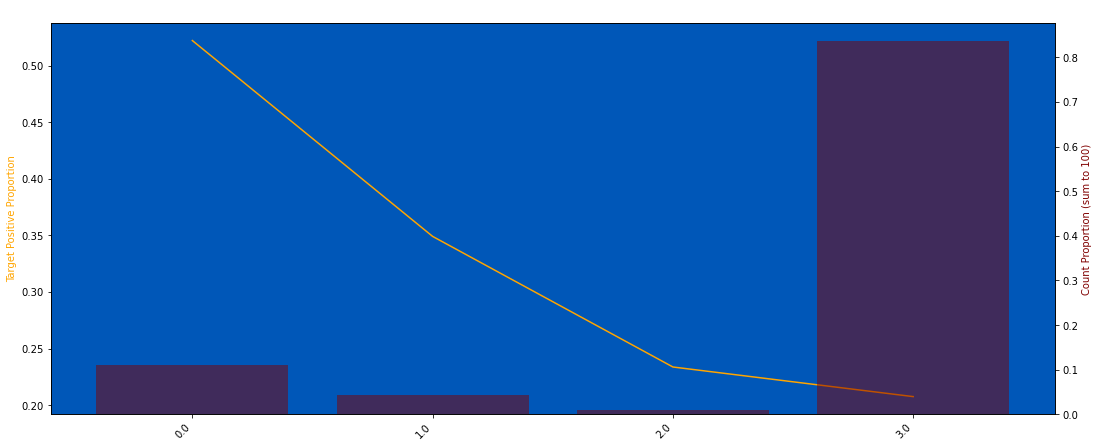

In [70]:
plot_target_check(train, "D_112", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

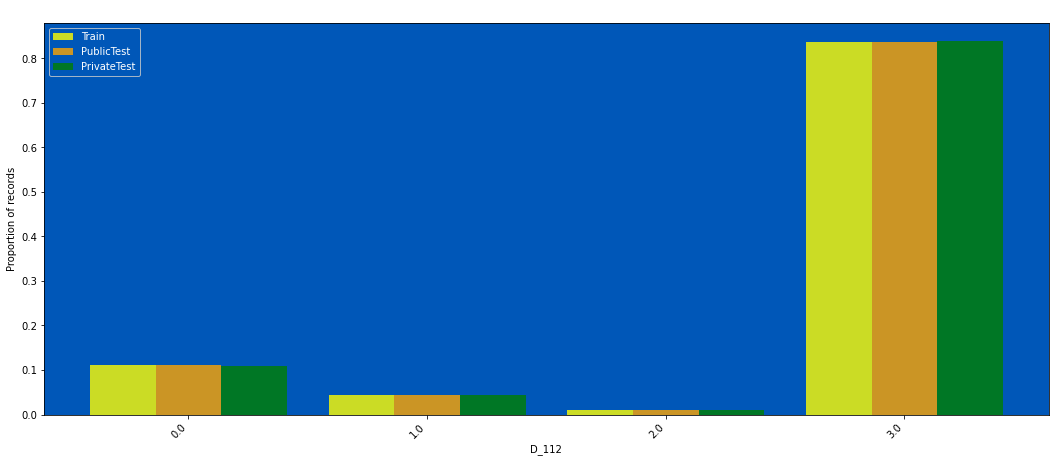

In [71]:
plot_train_test_distribution(df_list, "D_112", nunique_thr=3000, without_drop_tail=True)

### D_113 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


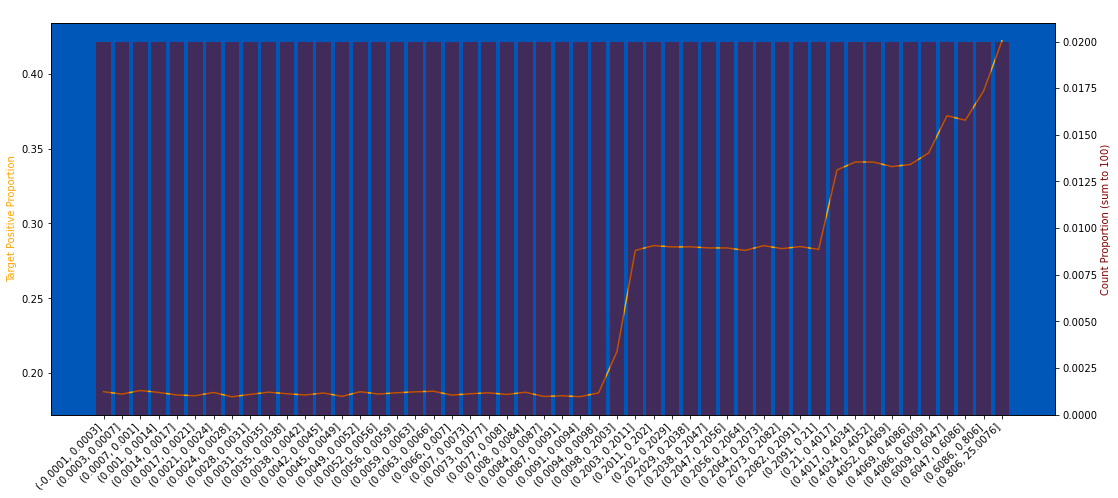

In [72]:
plot_target_check(train, "D_113", q=50, use_raw_bin=True, nunique_thr=50)

In [73]:
%%time
df_list = round_dfs(df_list, col="D_113", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 303 ms, sys: 1.34 s, total: 1.65 s
Wall time: 2.57 s


In [74]:
for df in df_list:
    df["D_113_"] = (df["D_113"] * 2).round(0)

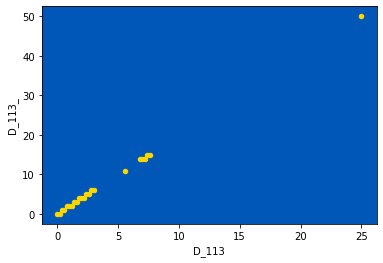

In [75]:
check_binning(train, "D_113", end=500)

In [76]:
for df in df_list:
    df["D_113"] = (df["D_113"] * 2).round(0)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


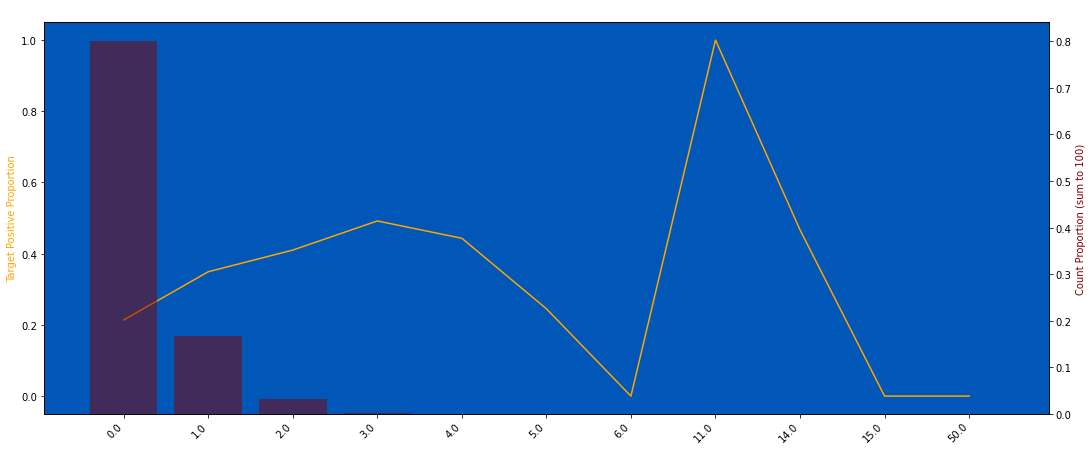

In [77]:
plot_target_check(train, "D_113", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

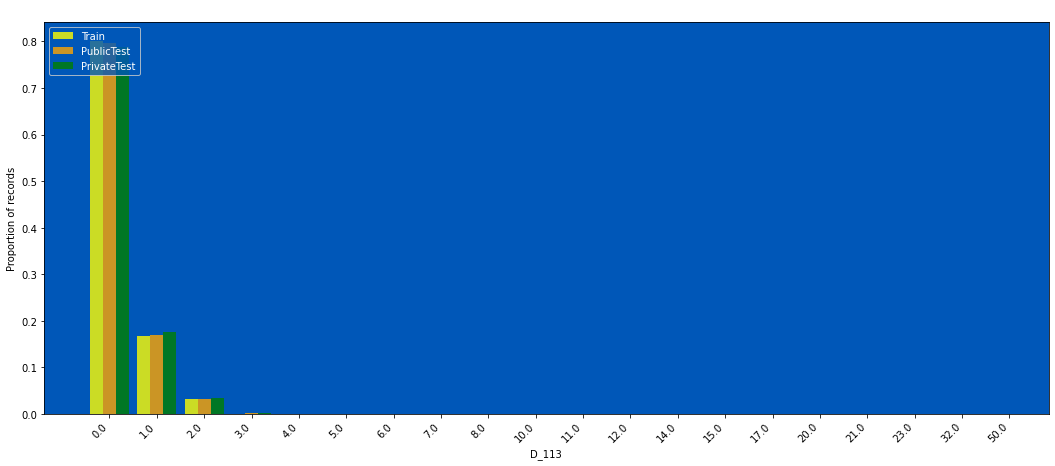

In [78]:
plot_train_test_distribution(df_list, "D_113", nunique_thr=3000, without_drop_tail=True)

### D_114 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


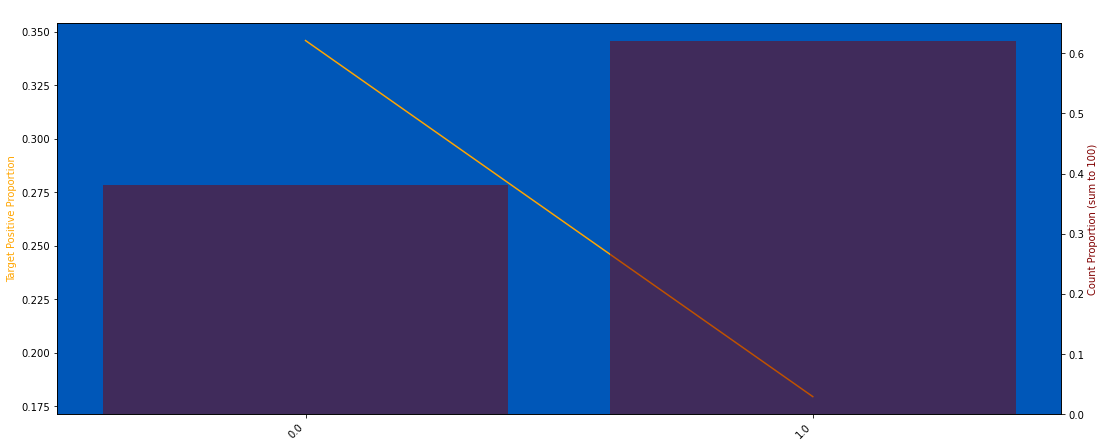

In [79]:
plot_target_check(train, "D_114", q=50, use_raw_bin=True, without_drop_tail=True, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


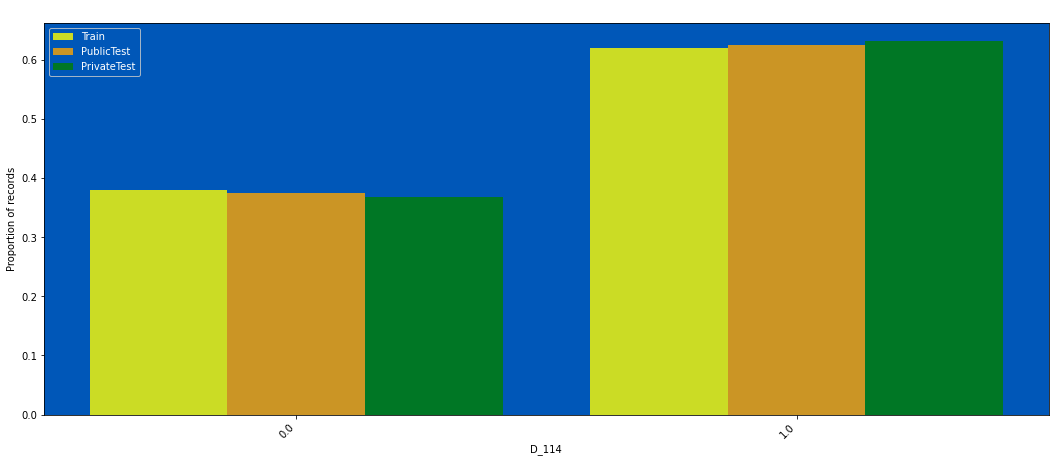

In [80]:
plot_train_test_distribution(df_list, "D_114", nunique_thr=3000)

### D_115

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


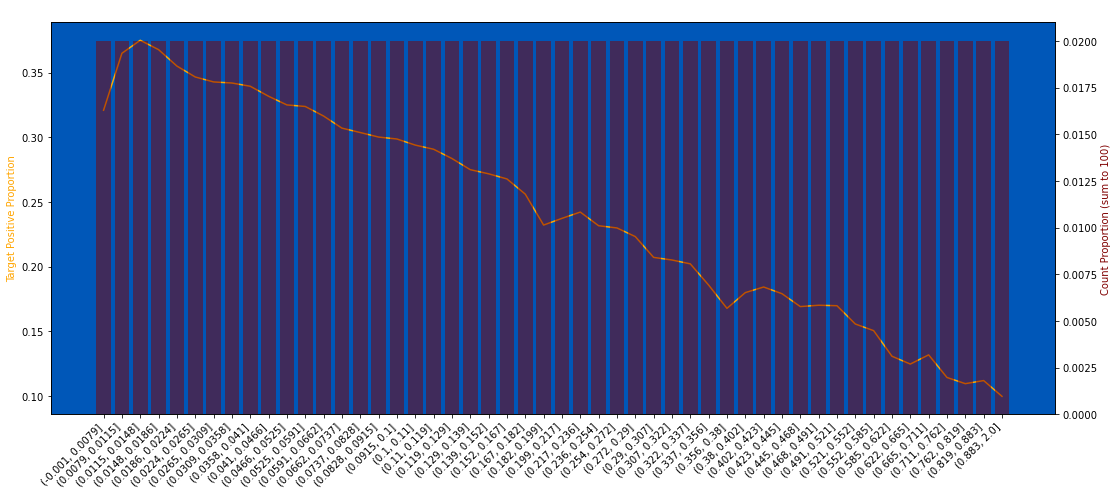

In [81]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True)

In [82]:
%%time
df_list = round_dfs(df_list, col="D_115", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 294 ms, sys: 1.36 s, total: 1.66 s
Wall time: 2.57 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


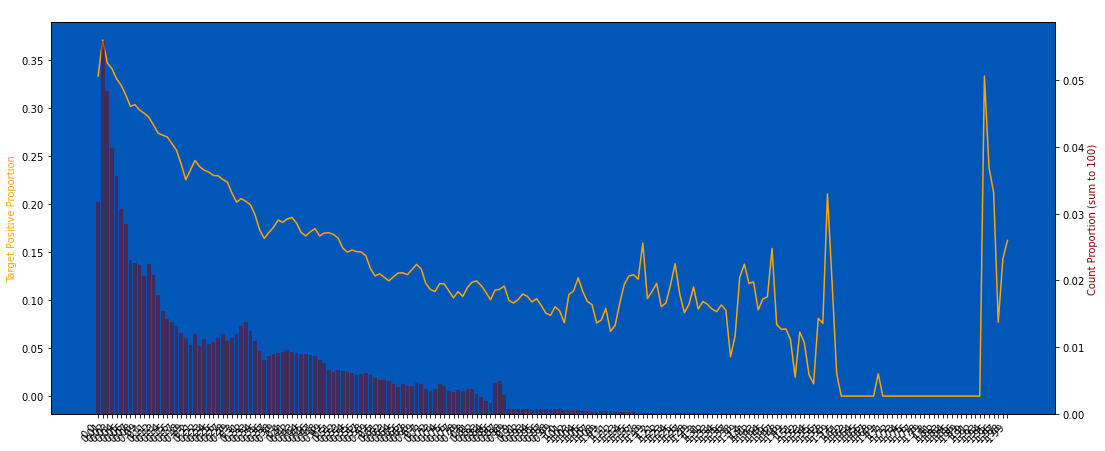

In [83]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


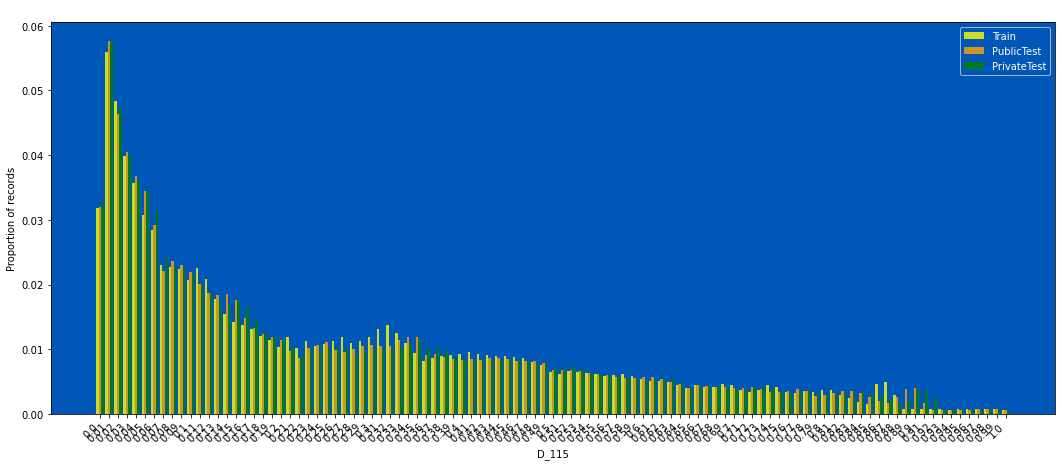

In [84]:
plot_train_test_distribution(df_list, "D_115", nunique_thr=500)

**Train Test Drift: Moderate**

### D_116 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


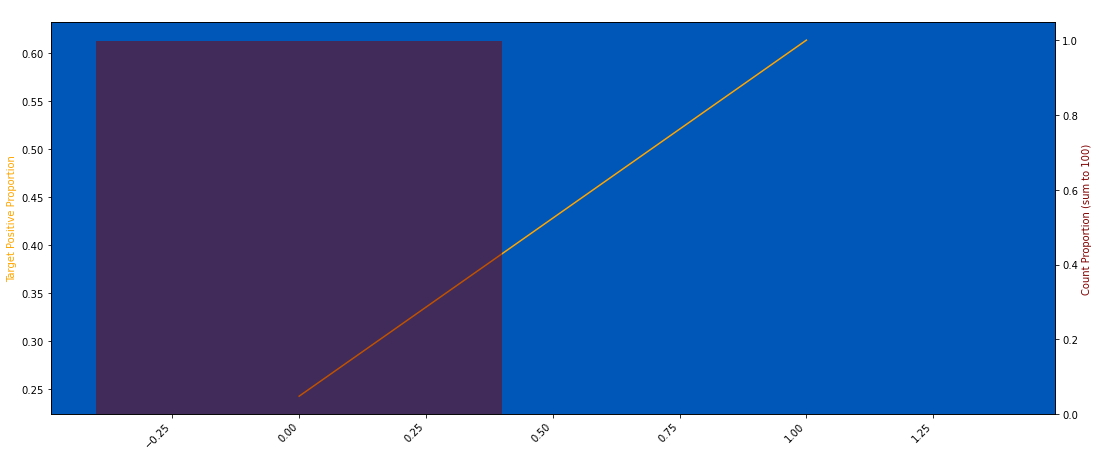

In [85]:
plot_target_check(train, "D_116", q=50, use_raw_bin=True, nunique_thr=50, without_drop_tail=True)

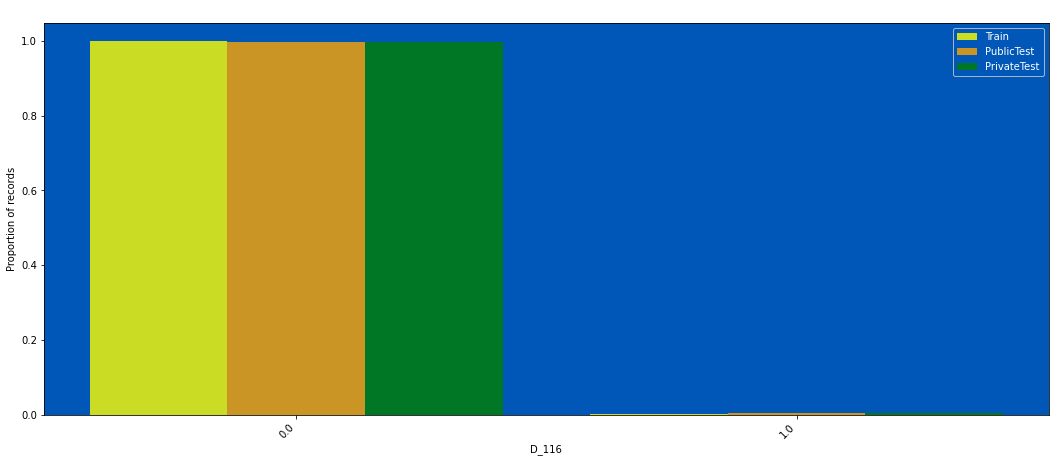

In [86]:
plot_train_test_distribution(df_list, "D_116", nunique_thr=50, without_drop_tail=True)

### D_117

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


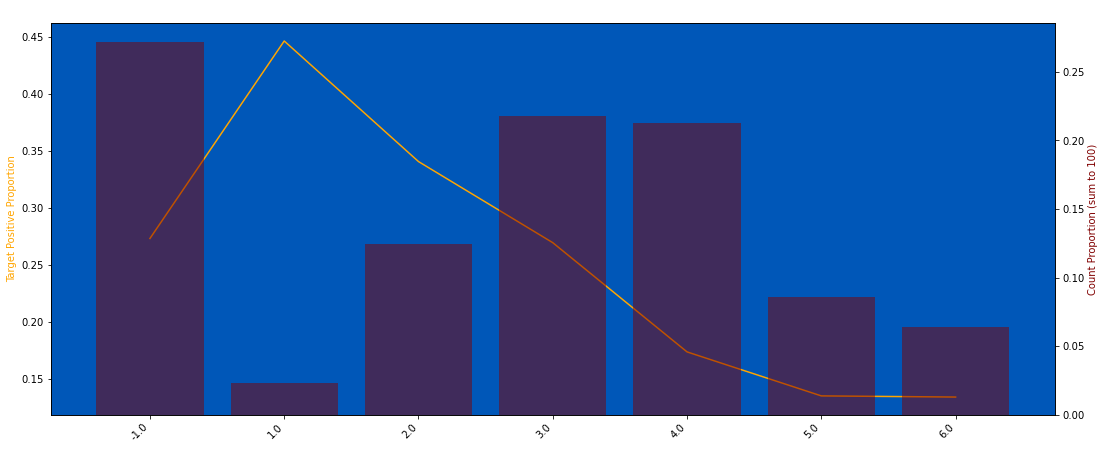

In [87]:
plot_target_check(train, "D_117", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

- -1 should be NaN

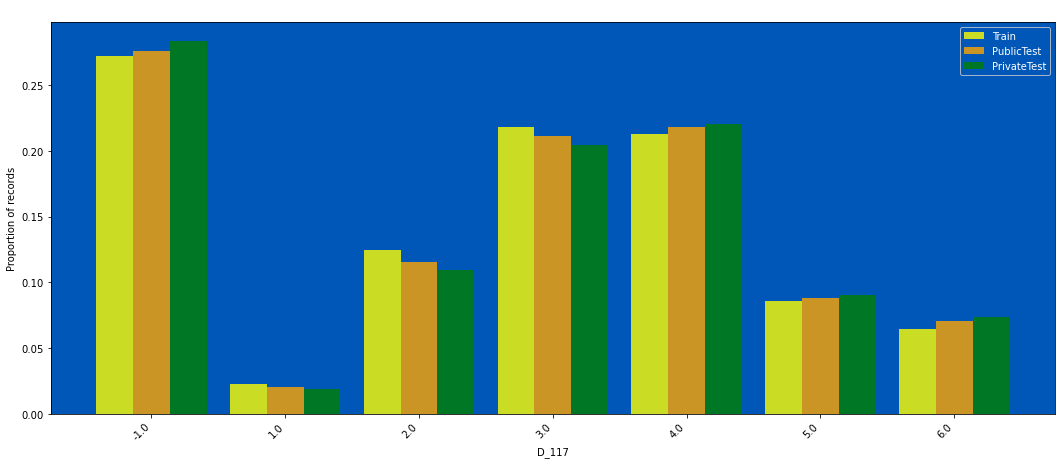

In [88]:
plot_train_test_distribution(df_list, "D_117", nunique_thr=20)

### D_118

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


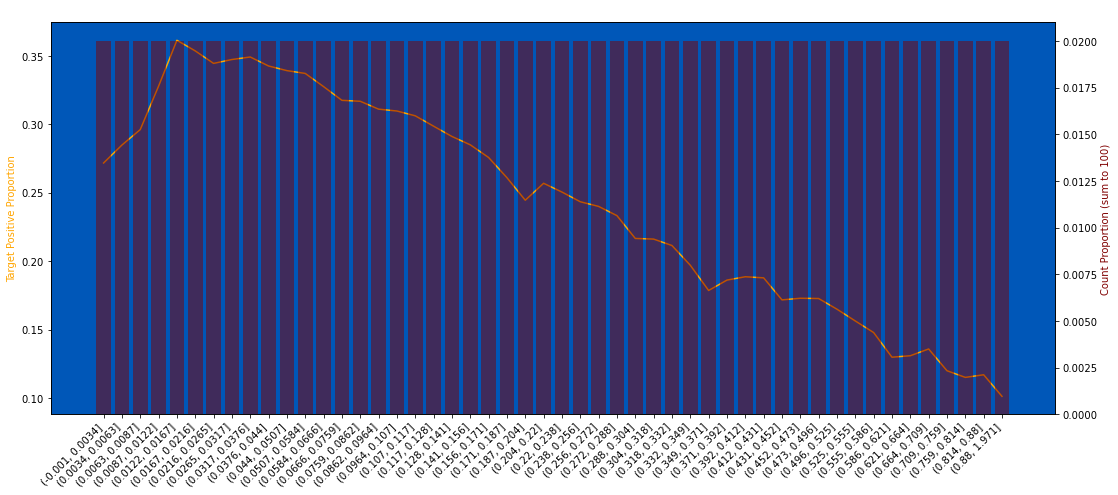

In [89]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True)

In [90]:
%%time
df_list = round_dfs(df_list, col="D_118", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 298 ms, sys: 1.27 s, total: 1.57 s
Wall time: 2.48 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


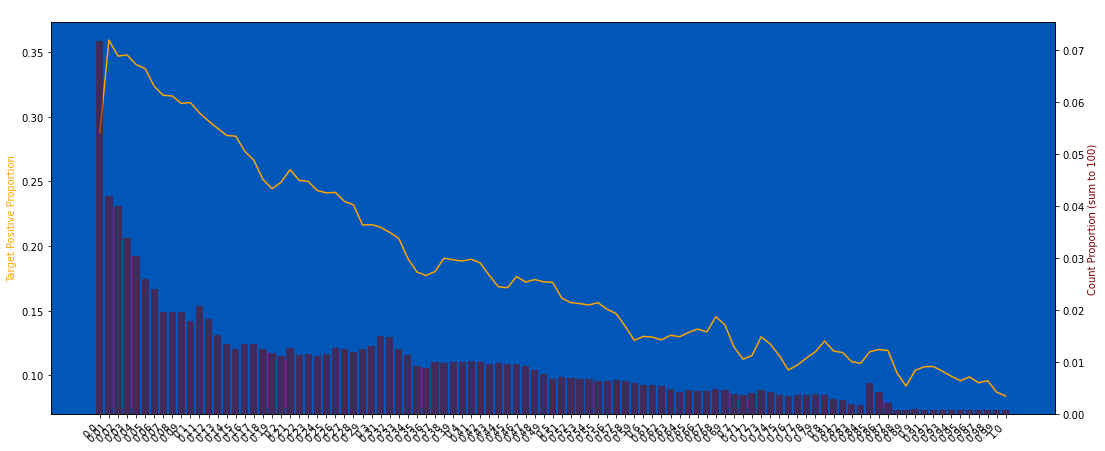

In [91]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

- -1 should be NaN

Bottom 1% and Top 1% are dropped from this chart


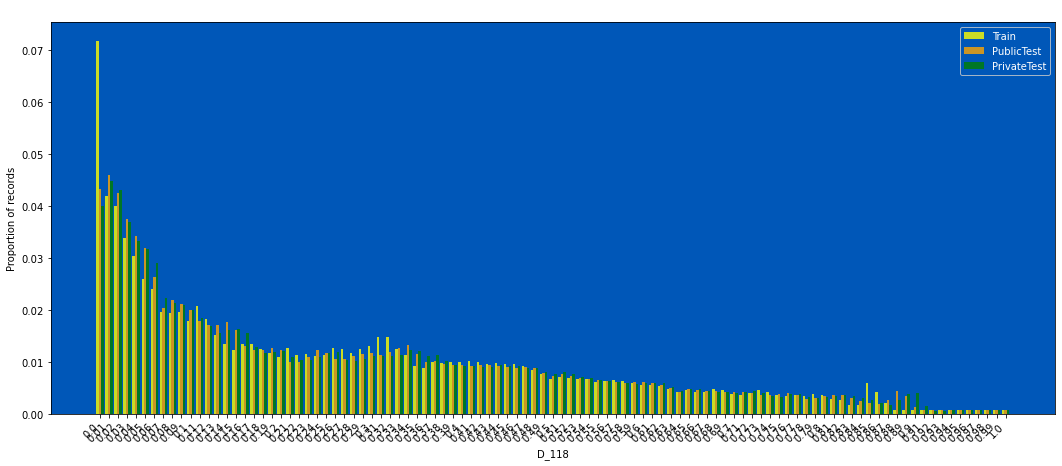

In [92]:
plot_train_test_distribution(df_list, "D_118", nunique_thr=500)

### D_119

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


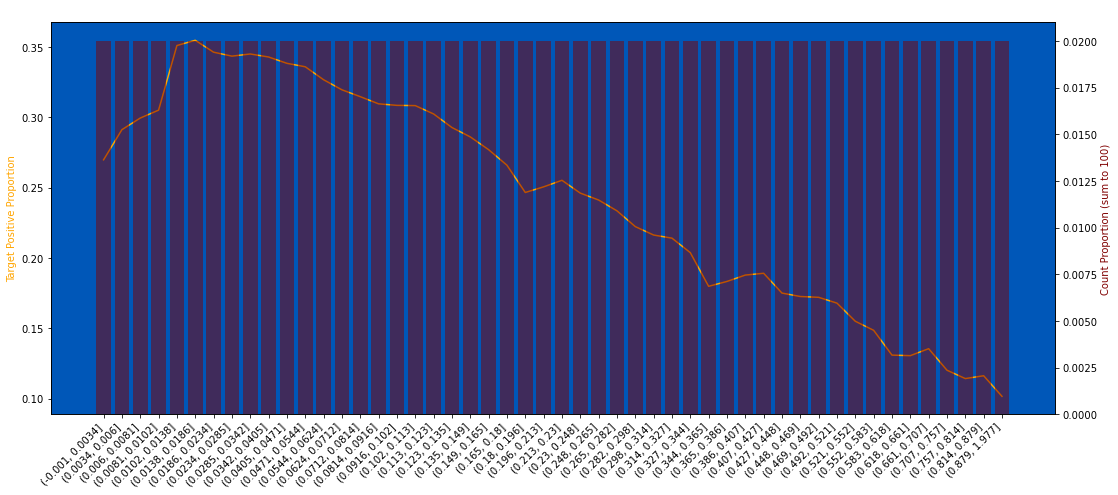

In [93]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True)

In [94]:
%%time
df_list = round_dfs(df_list, col="D_119", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 299 ms, sys: 1.32 s, total: 1.61 s
Wall time: 2.51 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


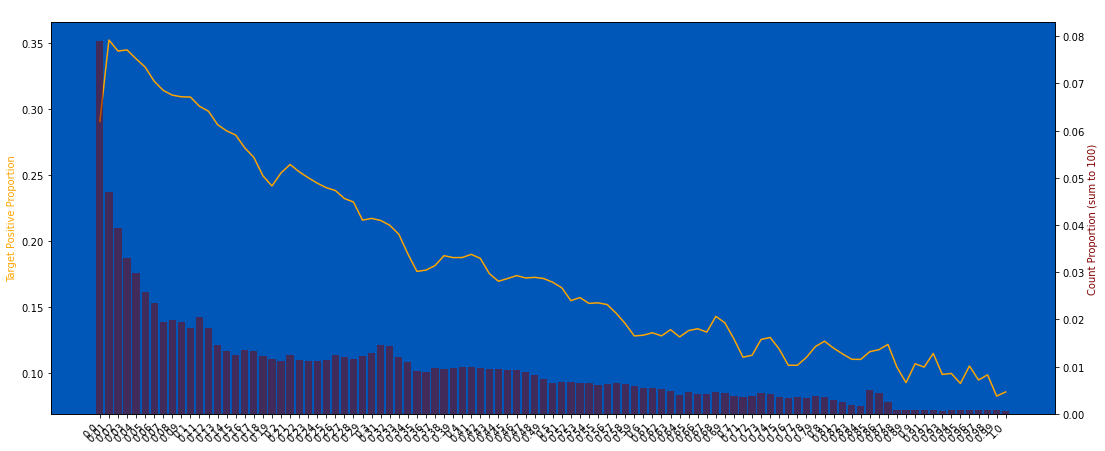

In [95]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

- -1 should be NaN

Bottom 1% and Top 1% are dropped from this chart


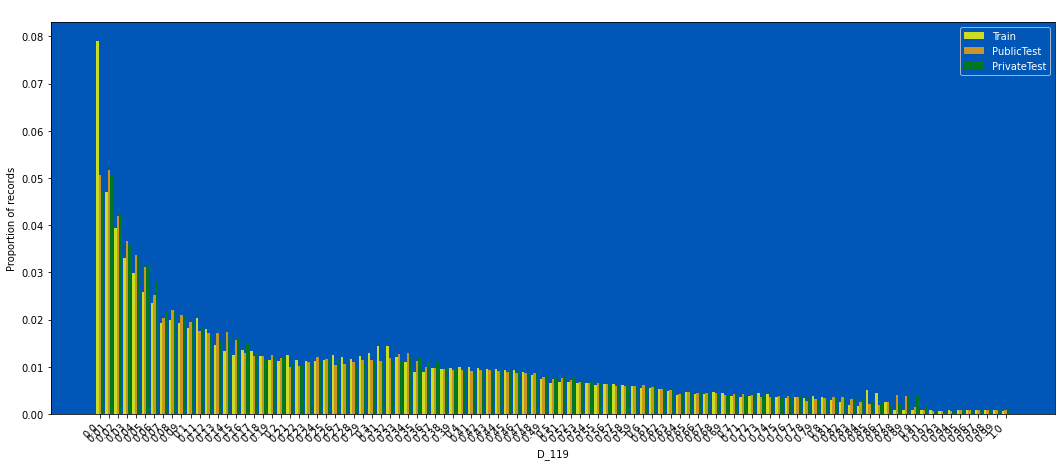

In [96]:
plot_train_test_distribution(df_list, "D_119", nunique_thr=500)

### D_120 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


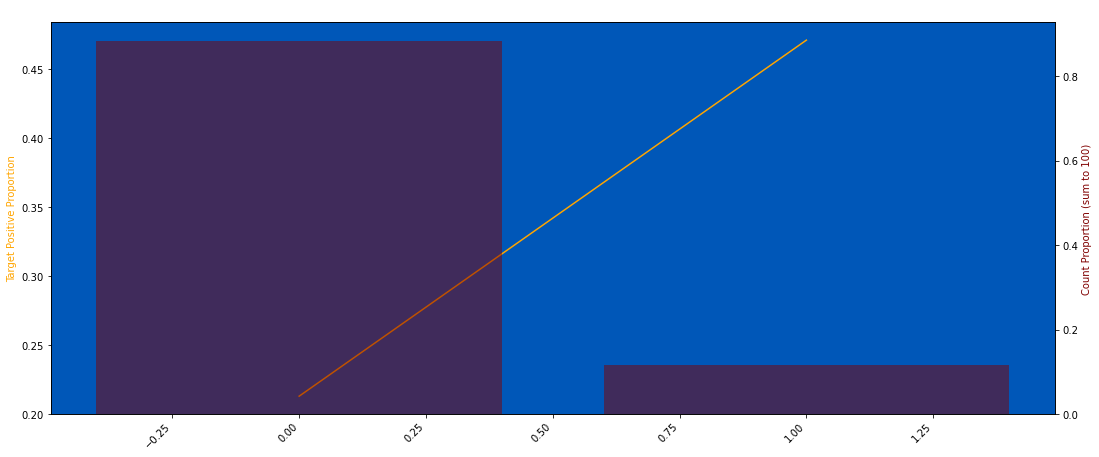

In [97]:
plot_target_check(train, "D_120", q=50, use_raw_bin=True, nunique_thr=500, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


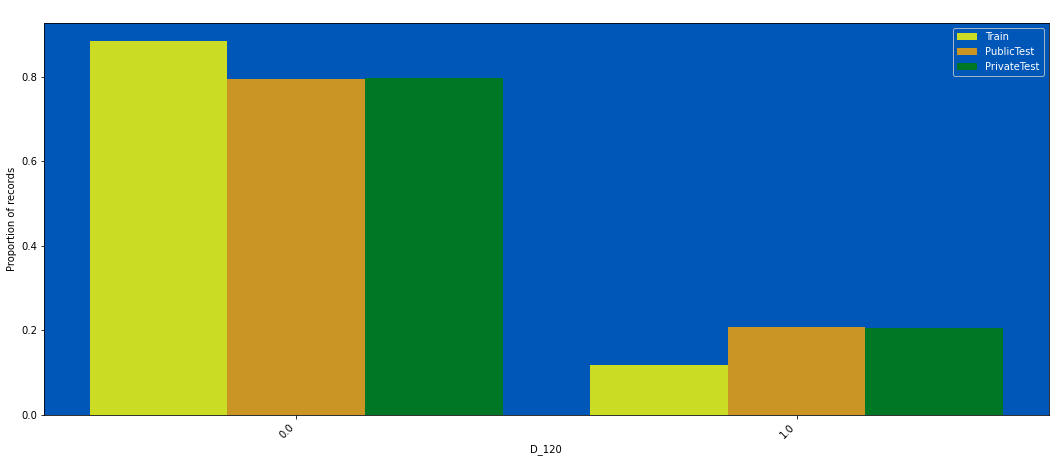

In [98]:
plot_train_test_distribution(df_list, "D_120", nunique_thr=500)

### D_121

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


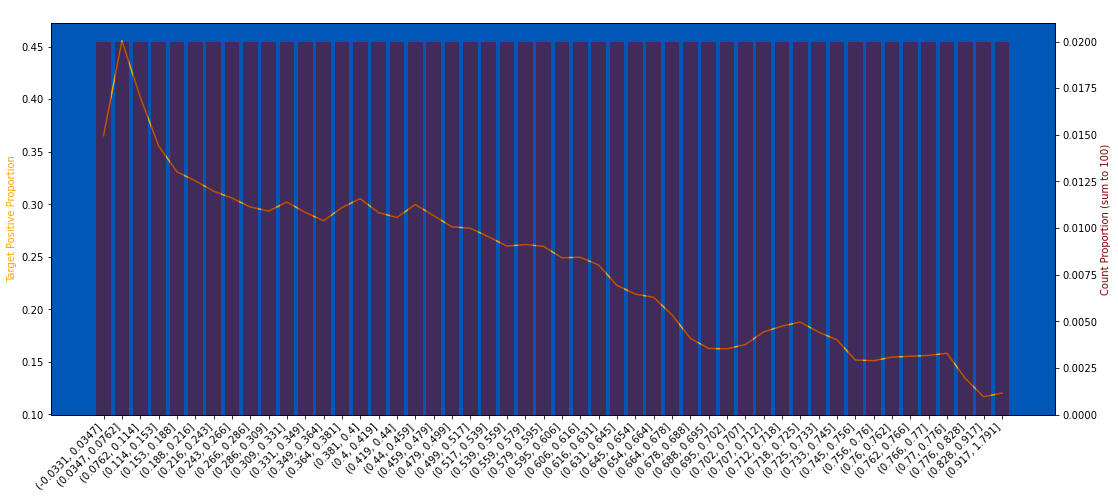

In [99]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True)

In [100]:
%%time
df_list = round_dfs(df_list, col="D_121", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 292 ms, sys: 1.3 s, total: 1.59 s
Wall time: 2.5 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


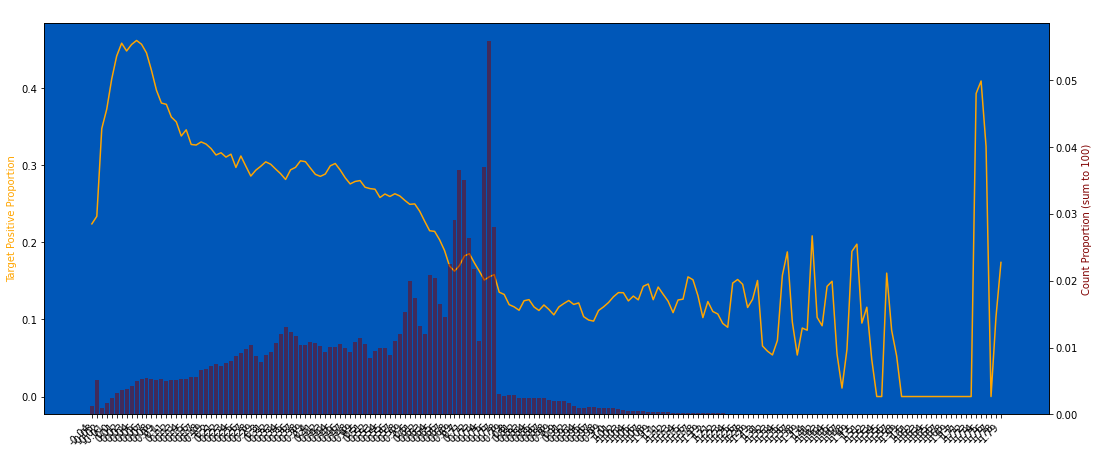

In [101]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


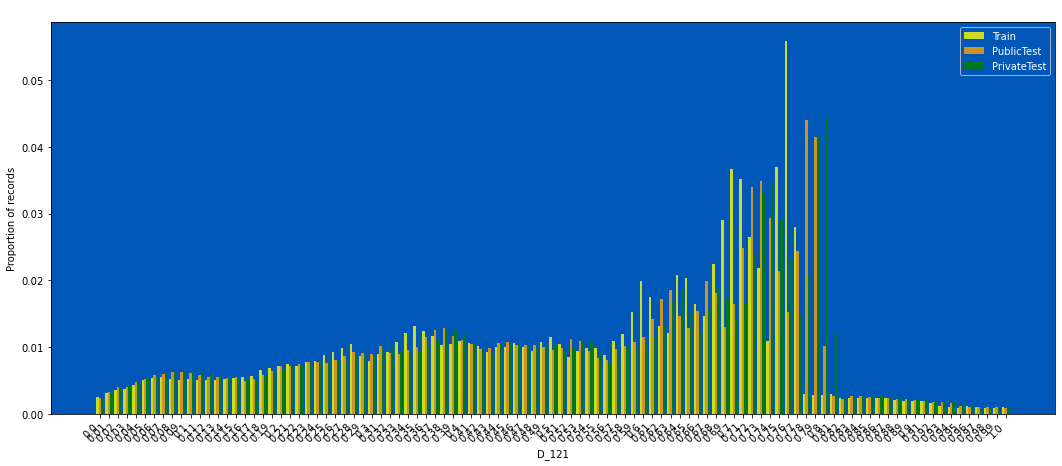

In [102]:
plot_train_test_distribution(df_list, "D_121", nunique_thr=500)

**Train Test Drift: Heavy**

### D_122

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


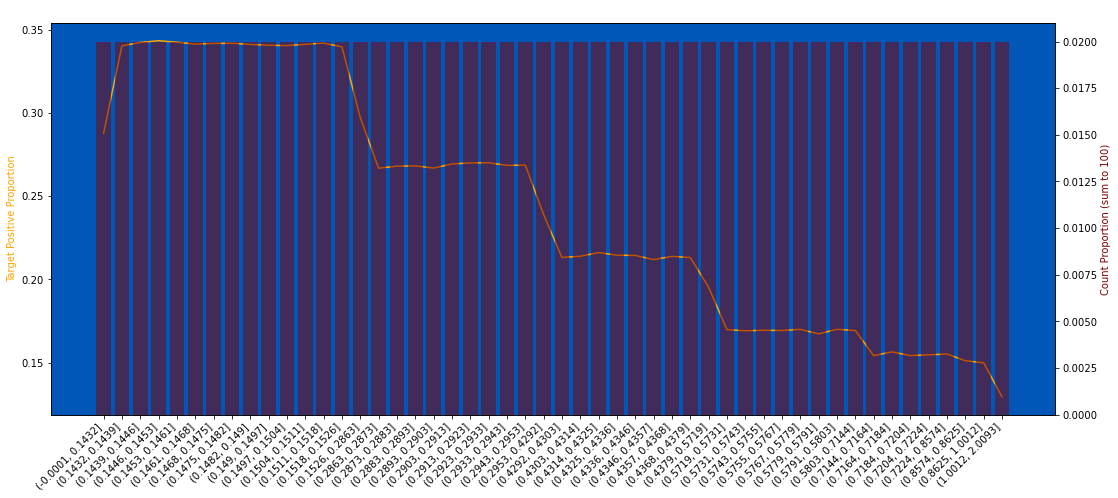

In [103]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True, nunique_thr=100)

In [104]:
%%time
df_list = round_dfs(df_list, col="D_122", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 293 ms, sys: 1.28 s, total: 1.57 s
Wall time: 2.51 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


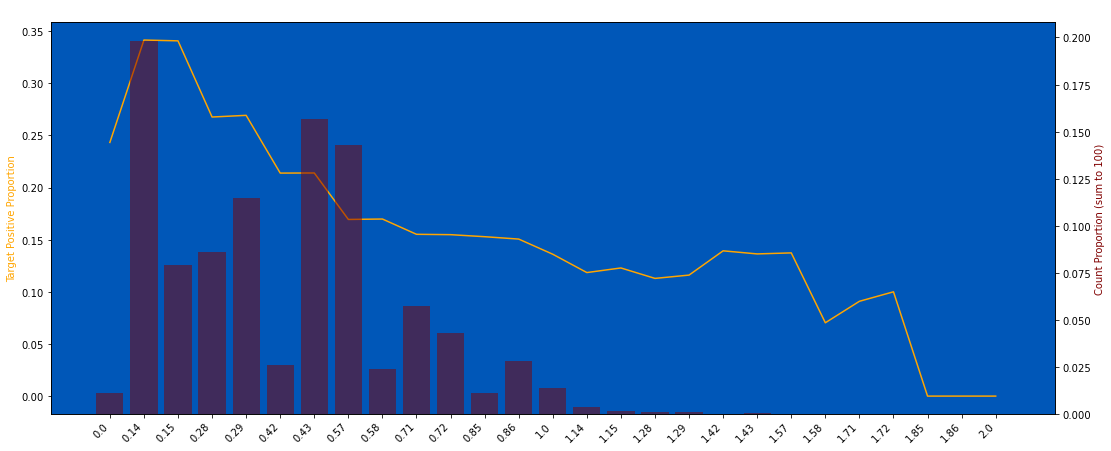

In [105]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

In [106]:
for df in df_list:
    df["D_122_"] = ((df["D_122"] + 0.001) / 0.14).round(0)

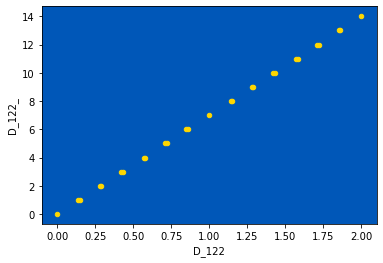

In [107]:
check_binning(train, "D_122", end=1000)

In [108]:
for df in df_list:
    df["D_122"] = ((df["D_122"] + 0.001) / 0.14).round(0)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


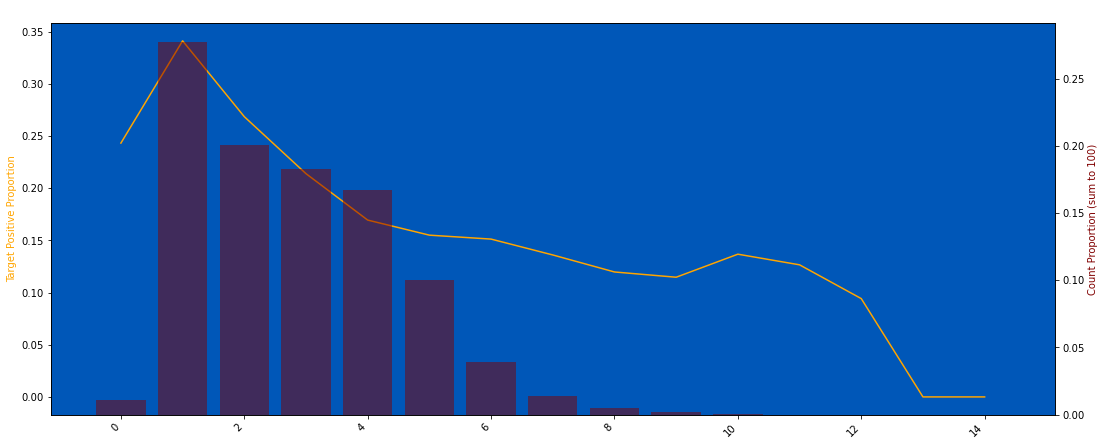

In [109]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True, without_drop_tail=True)

- 0 is NaN

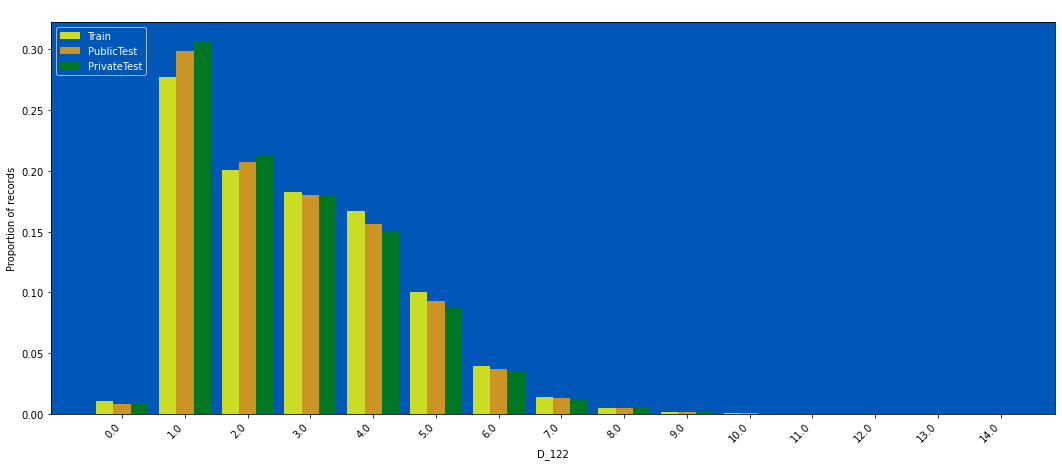

In [110]:
plot_train_test_distribution(df_list, "D_122", nunique_thr=500, without_drop_tail=True)

### D_123 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


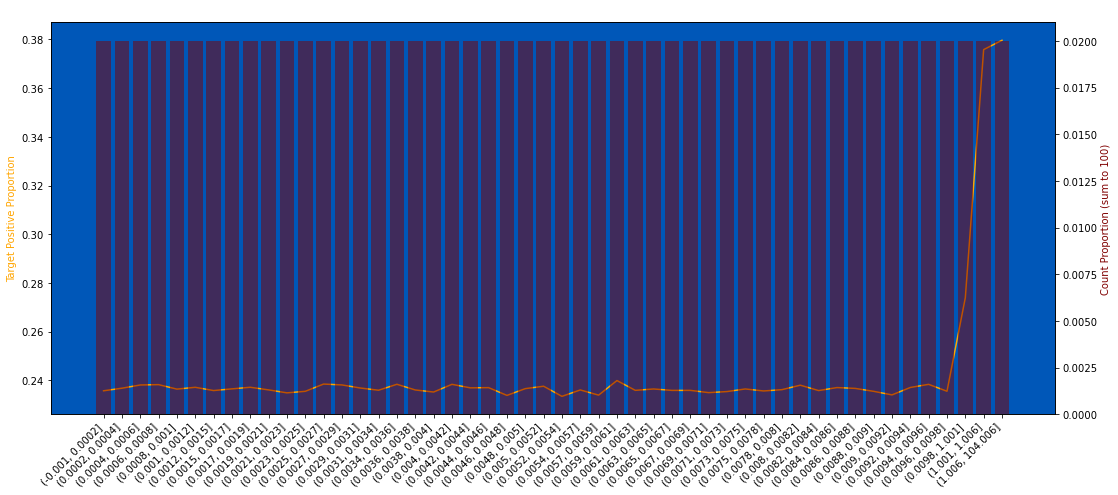

In [111]:
plot_target_check(train, "D_123", q=50, use_raw_bin=True, nunique_thr=50)

In [112]:
%%time
df_list = round_dfs(df_list, col="D_123", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 335 ms, sys: 1.33 s, total: 1.66 s
Wall time: 2.56 s


176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


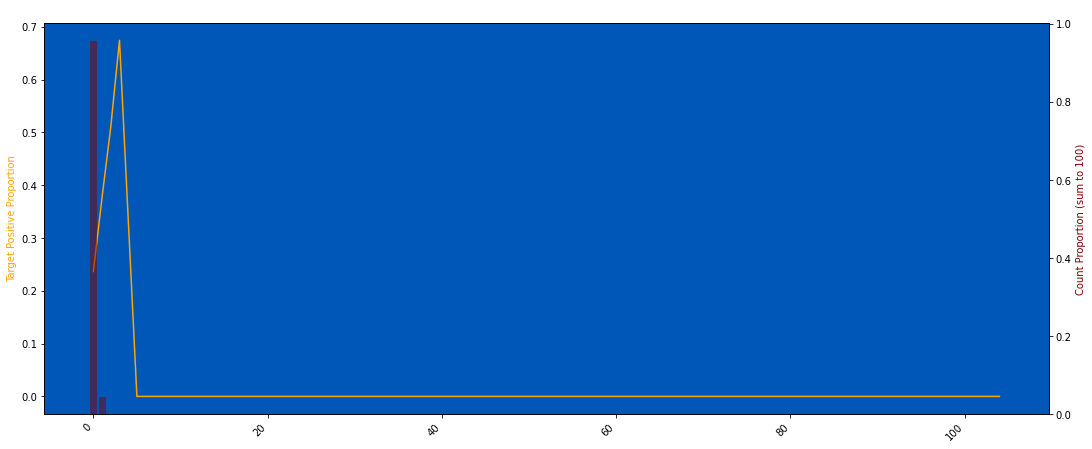

In [113]:
plot_target_check(train, "D_123", q=50, use_raw_bin=True, nunique_thr=50)

- 0 is NaN

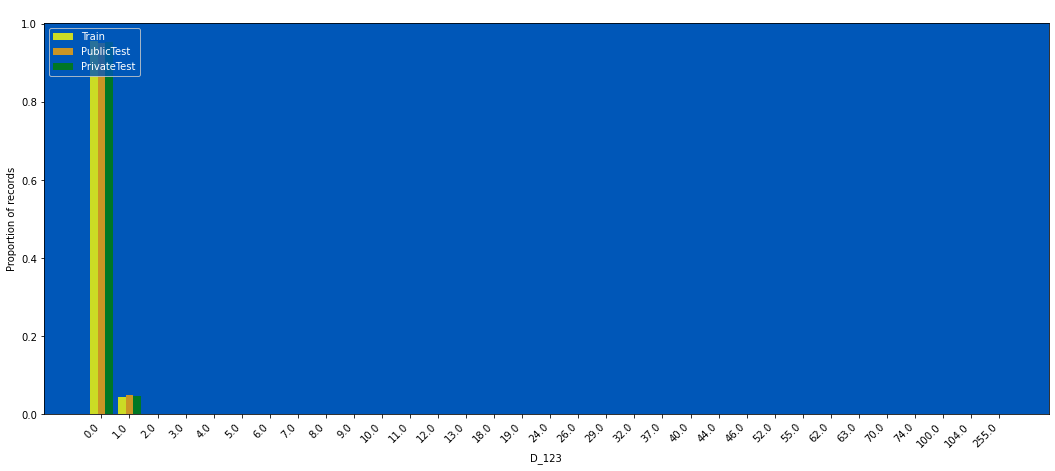

In [114]:
plot_train_test_distribution(df_list, "D_123", nunique_thr=500, without_drop_tail=True)

### D_124

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


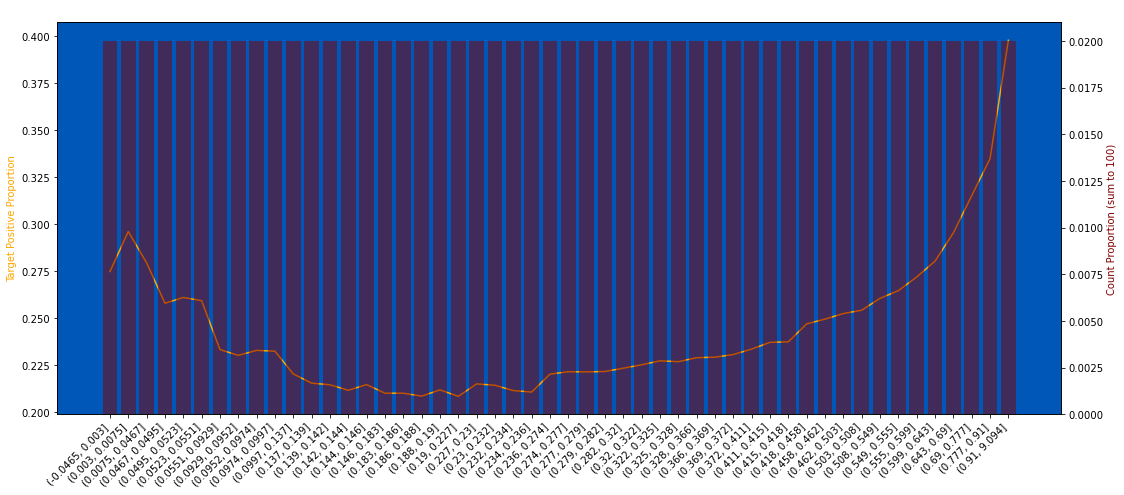

In [115]:
plot_target_check(train, "D_124", q=50, use_raw_bin=True)

In [116]:
%%time
df_list = round_dfs(df_list, col="D_124", decimals=4, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 284 ms, sys: 1.24 s, total: 1.53 s
Wall time: 2.47 s


In [117]:
for df in df_list:
    df["D_124_"] = ((df["D_124"]) / 0.0452).round(0)

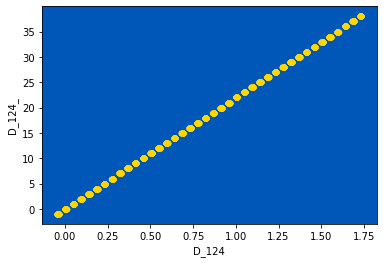

In [118]:
check_binning(train, "D_124", end=4000)

In [119]:
for df in df_list:
    df["D_124"] = ((df["D_124"]) / 0.0452).round(0)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


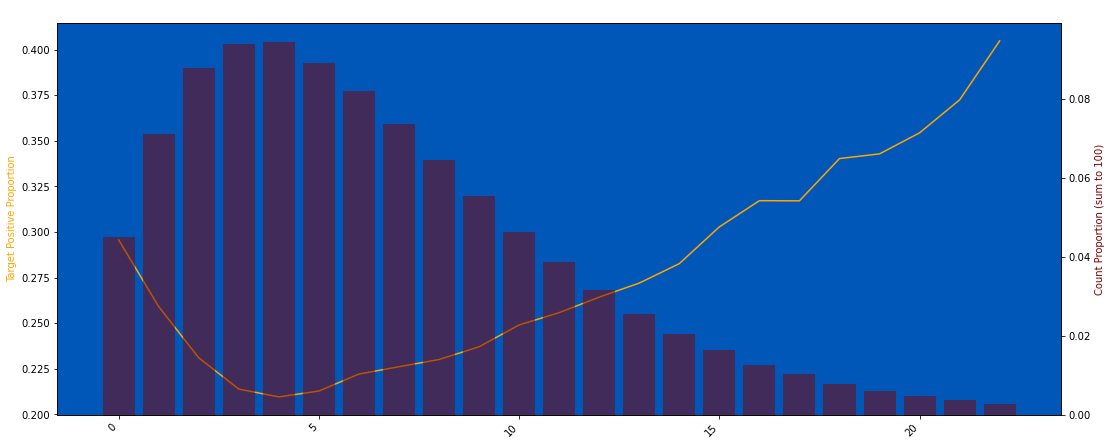

In [120]:
plot_target_check(train, "D_124", q=50, use_raw_bin=True)

Bottom 1% and Top 1% are dropped from this chart


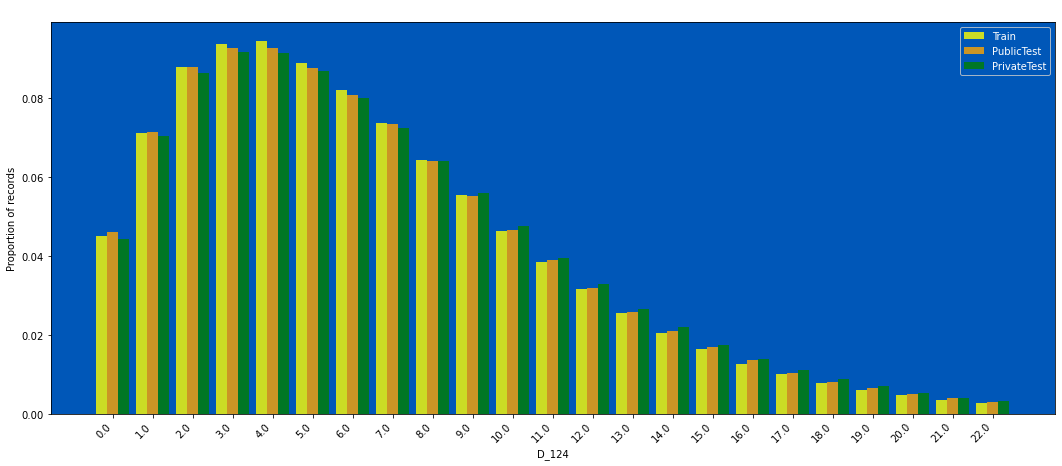

In [121]:
plot_train_test_distribution(df_list, "D_124", nunique_thr=500)

### D_125 (Done)

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


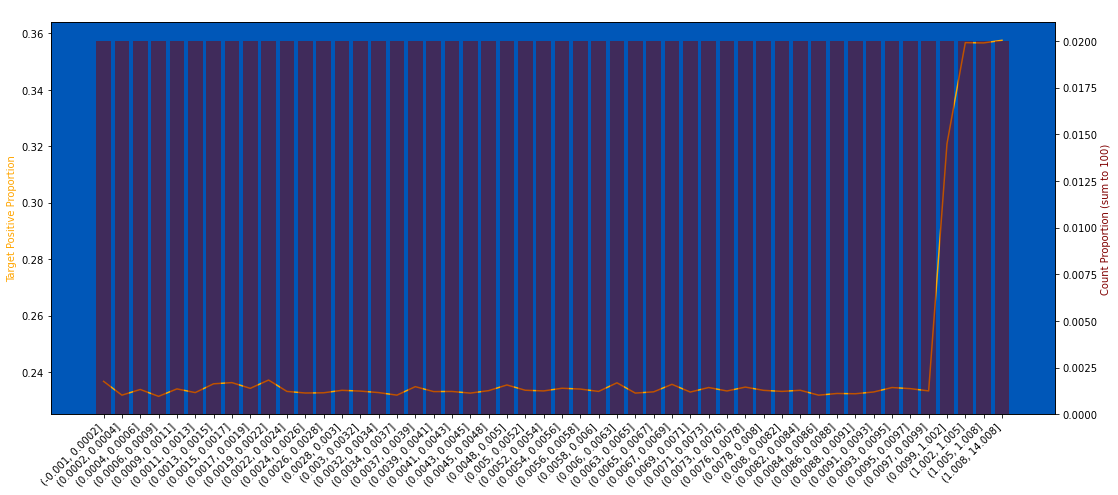

In [122]:
plot_target_check(train, "D_125", q=50, use_raw_bin=True)

In [123]:
%%time
df_list = round_dfs(df_list, col="D_125", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 276 ms, sys: 1.29 s, total: 1.56 s
Wall time: 2.47 s


In [124]:
# for df in df_list:
#     df["D_125"] = np.where(df["D_125"] > 2, 2, df["D_125"])

176716 null count, 0.032 null proportion
0.4377 of the targets have label = 1


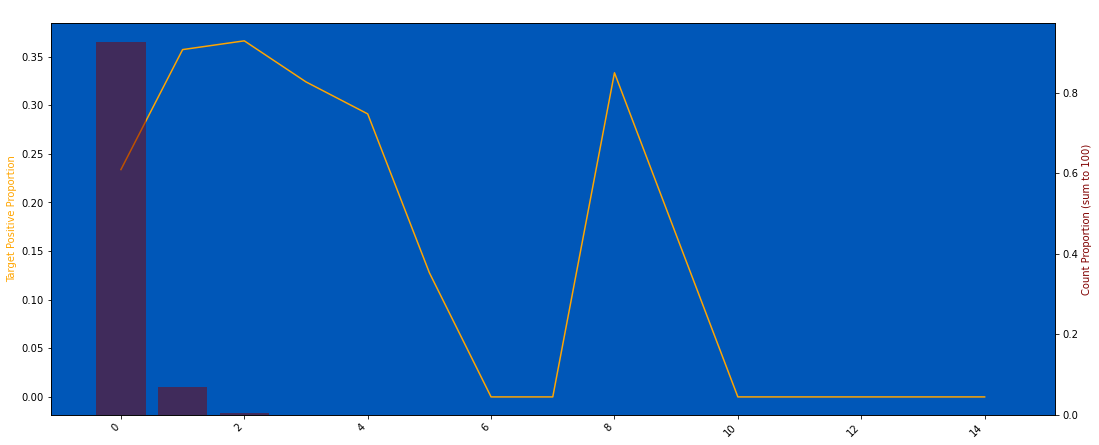

In [125]:
plot_target_check(train, "D_125", q=50, use_raw_bin=True, without_drop_tail=True)

- 0 is NaN

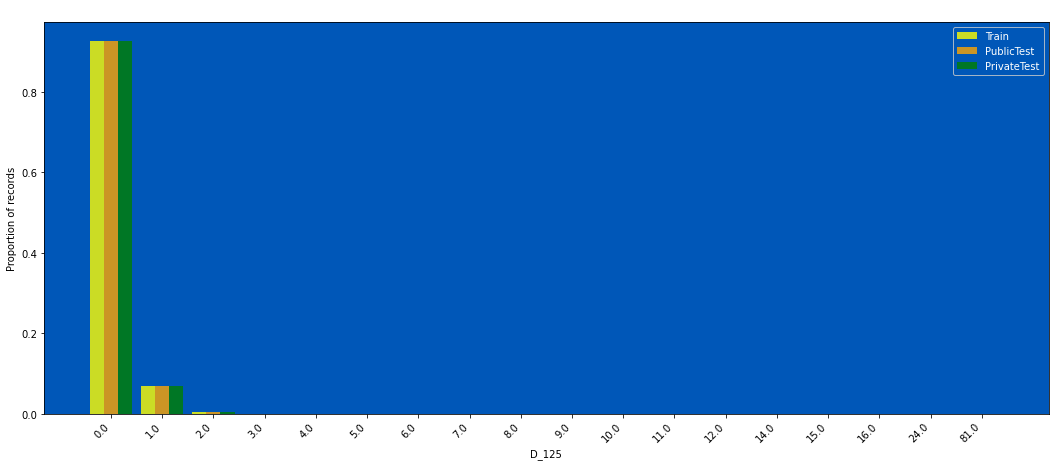

In [126]:
plot_train_test_distribution(df_list, "D_125", nunique_thr=500, without_drop_tail=True)

### D_126

In [127]:
mapping = dict(train.groupby(["D_126"])["target"].mean())
mapping

{-1.0: 0.20953782704351892, 0.0: 0.30987532017012914, 1.0: 0.2328086854069079}

In [128]:
for df in df_list:
    df["D_126"] = df["D_126"].map(mapping)

116816 null count, 0.021 null proportion
0.4680 of the targets have label = 1


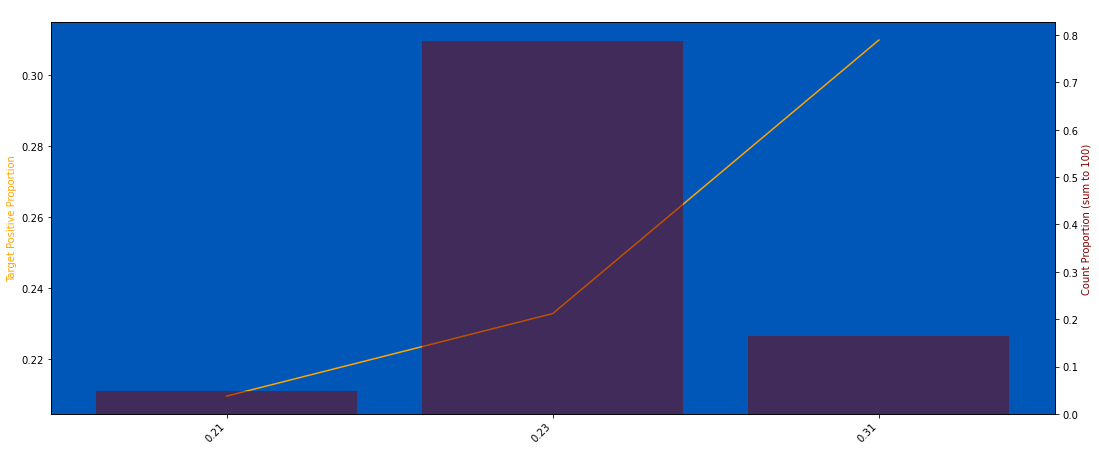

In [129]:
plot_target_check(train, "D_126", q=50, use_raw_bin=True, strfy_x=True, without_drop_tail=True)

In [130]:
for df in df_list:
    df["D_126"] = df["D_126"].astype("category").cat.codes

0 null count, 0.000 null proportion
nan of the targets have label = 1


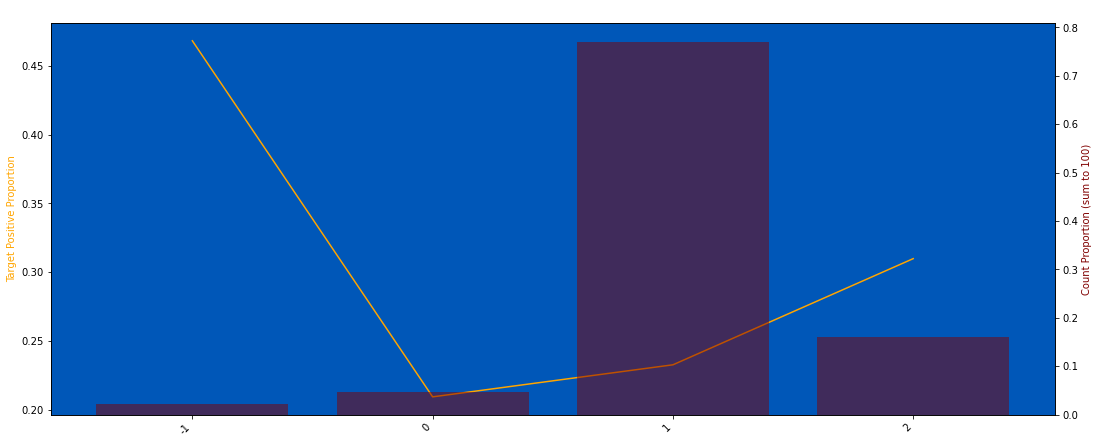

In [131]:
plot_target_check(train, "D_126", q=50, use_raw_bin=True, strfy_x=True, without_drop_tail=True)

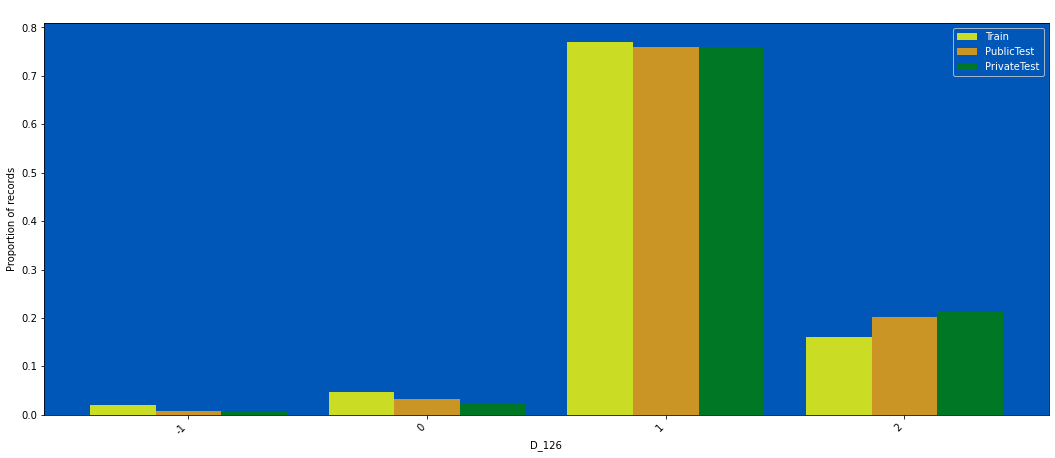

In [132]:
plot_train_test_distribution(df_list, "D_126", nunique_thr=1000, without_drop_tail=True)

### D_127 (Done)

0 null count, 0.000 null proportion
nan of the targets have label = 1


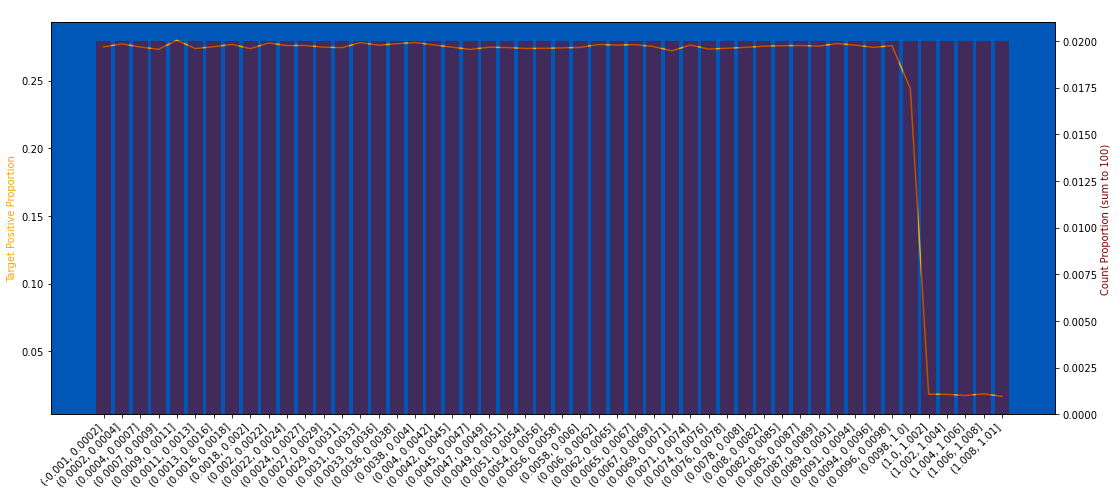

In [133]:
plot_target_check(train, "D_127", q=50, use_raw_bin=True)

In [134]:
%%time
df_list = round_dfs(df_list, col="D_127", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 321 ms, sys: 1.28 s, total: 1.6 s
Wall time: 2.51 s


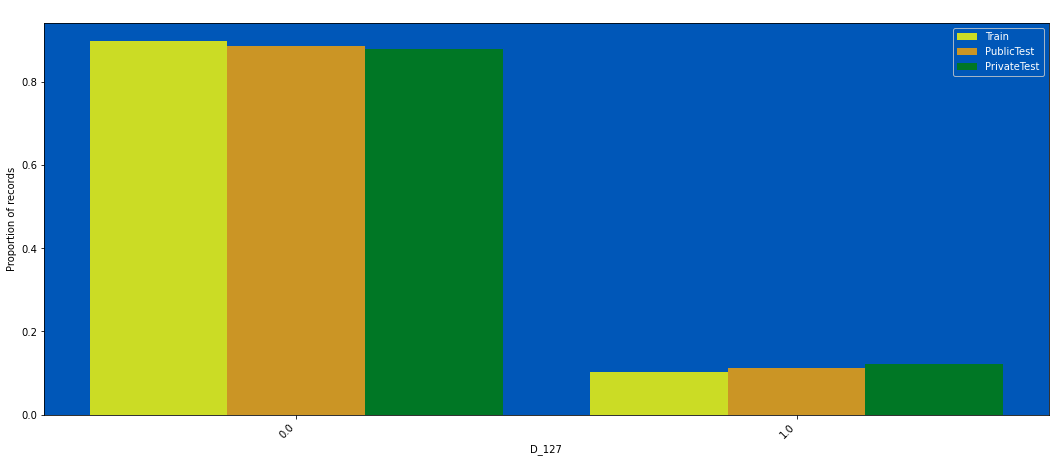

In [135]:
plot_train_test_distribution(df_list, "D_127", nunique_thr=500, without_drop_tail=True)

### D_128 (Done)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


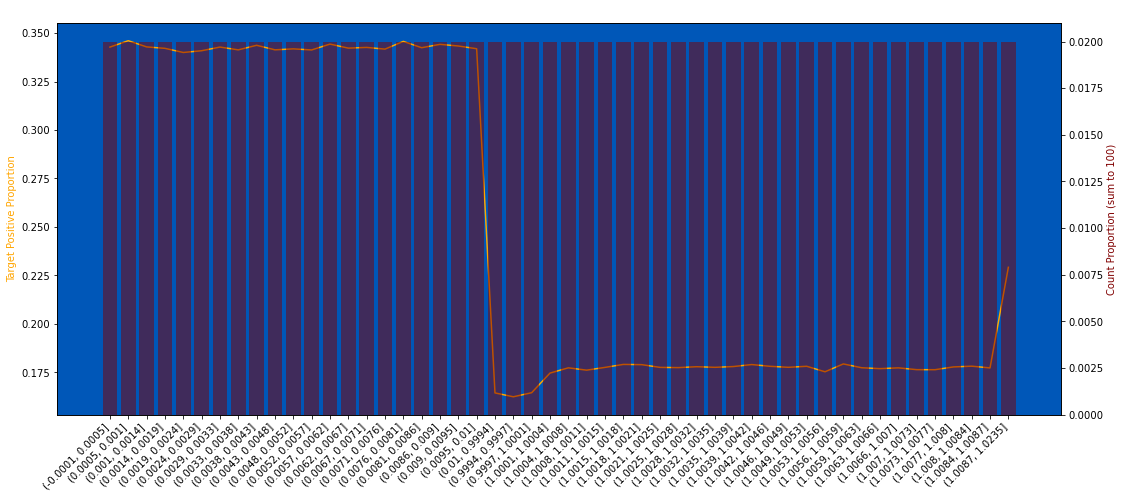

In [136]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True)

In [137]:
%%time
df_list = round_dfs(df_list, col="D_128", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 356 ms, sys: 1.31 s, total: 1.67 s
Wall time: 2.61 s


In [138]:
for df in df_list:
    df["D_128"] = df["D_128"].round(1)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


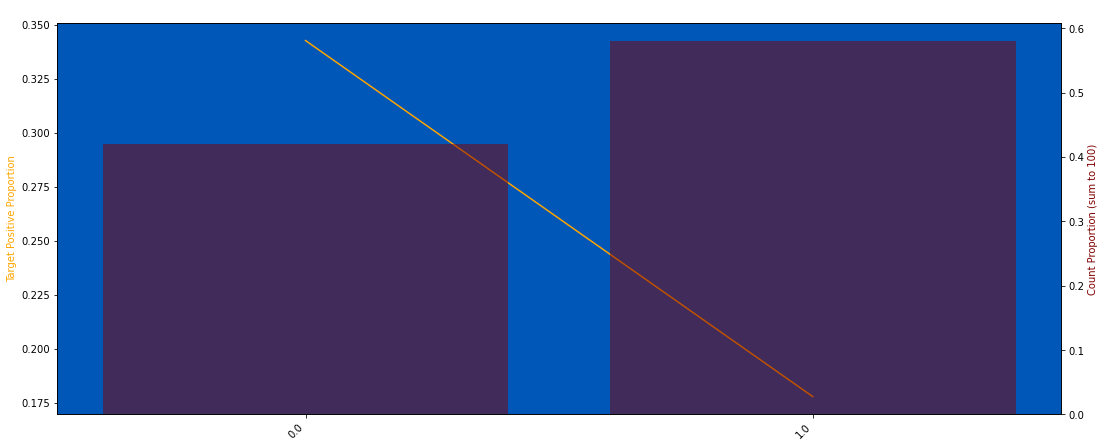

In [139]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


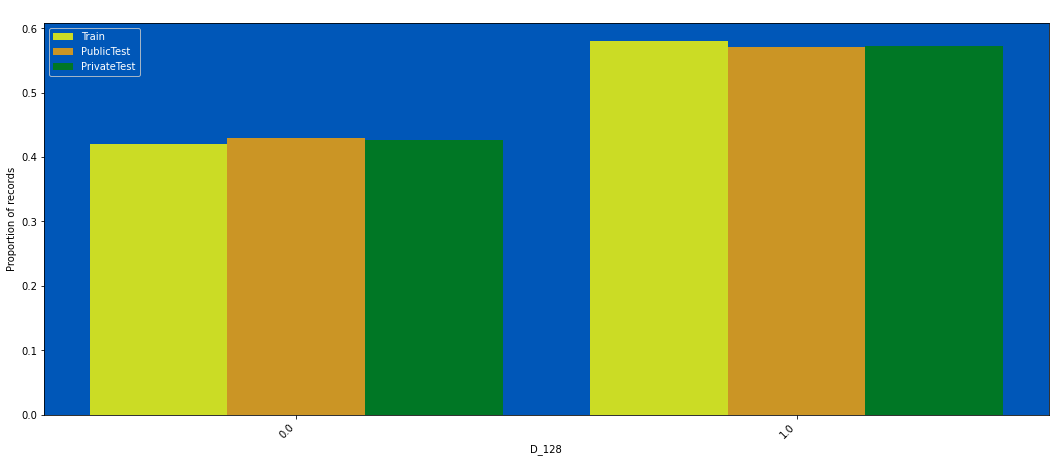

In [140]:
plot_train_test_distribution(df_list, "D_128", nunique_thr=500)

### D_129

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


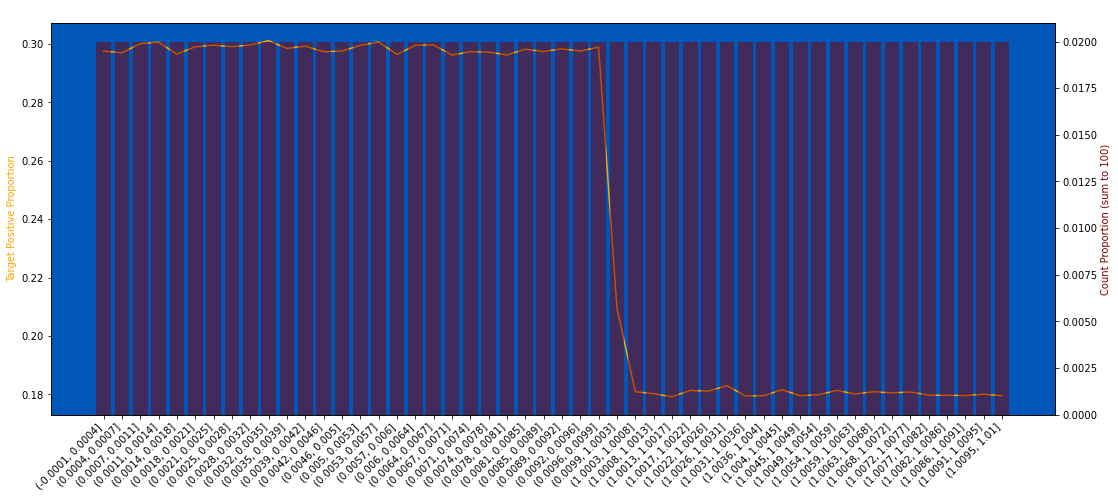

In [141]:
plot_target_check(train, "D_129", q=50, use_raw_bin=True)

In [142]:
%%time
df_list = round_dfs(df_list, col="D_129", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 267 ms, sys: 1.18 s, total: 1.45 s
Wall time: 2.36 s


In [143]:
for df in df_list:
    df["D_129"] = df["D_129"].round(1)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


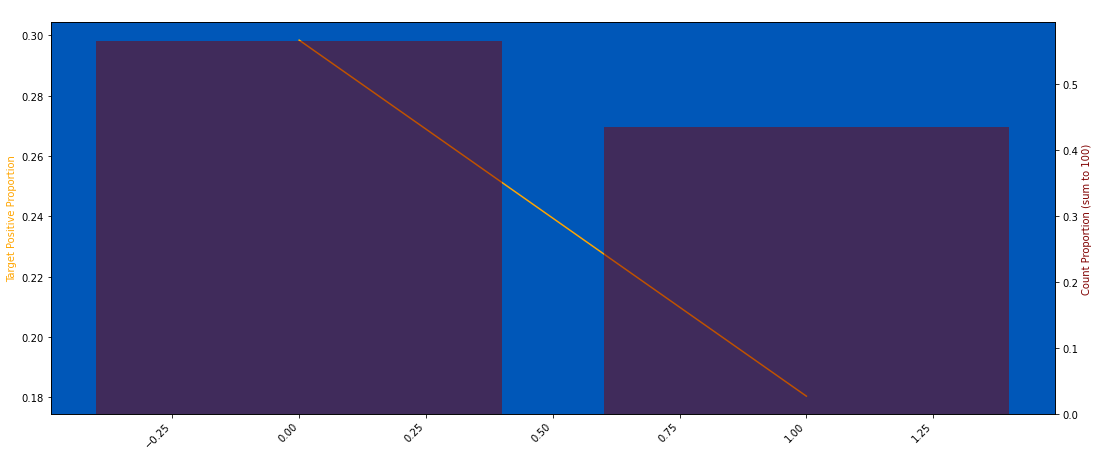

In [144]:
plot_target_check(train, "D_129", q=50, use_raw_bin=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


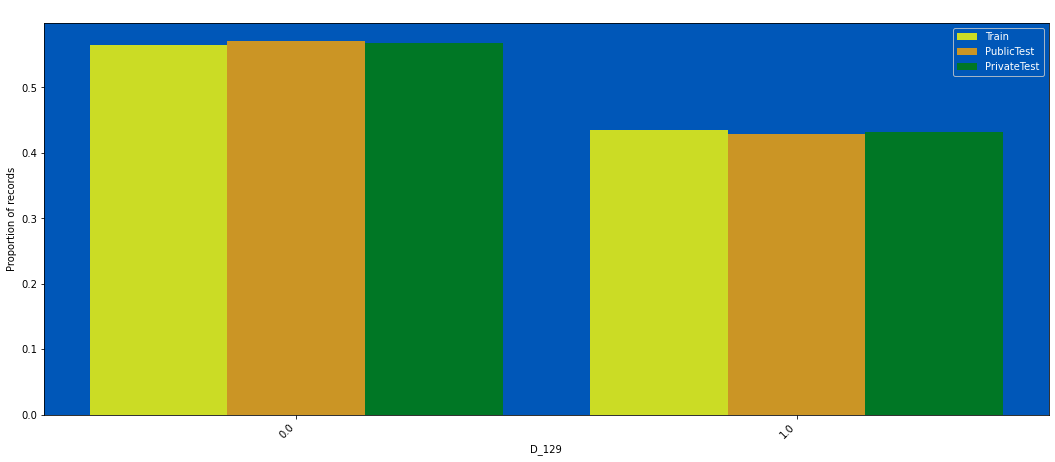

In [145]:
plot_train_test_distribution(df_list, "D_129", nunique_thr=500)

### D_130 (Done)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


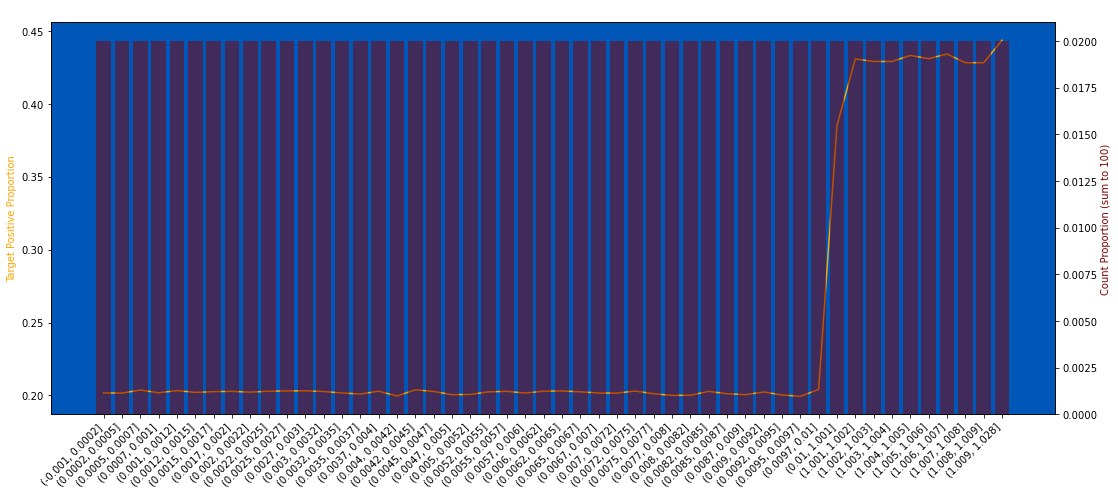

In [146]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True)

In [147]:
%%time
df_list = round_dfs(df_list, col="D_130", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 275 ms, sys: 1.37 s, total: 1.65 s
Wall time: 2.66 s


In [148]:
for df in df_list:
    df["D_130"] = np.where(df["D_130"] > 1, 1, df["D_130"])

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


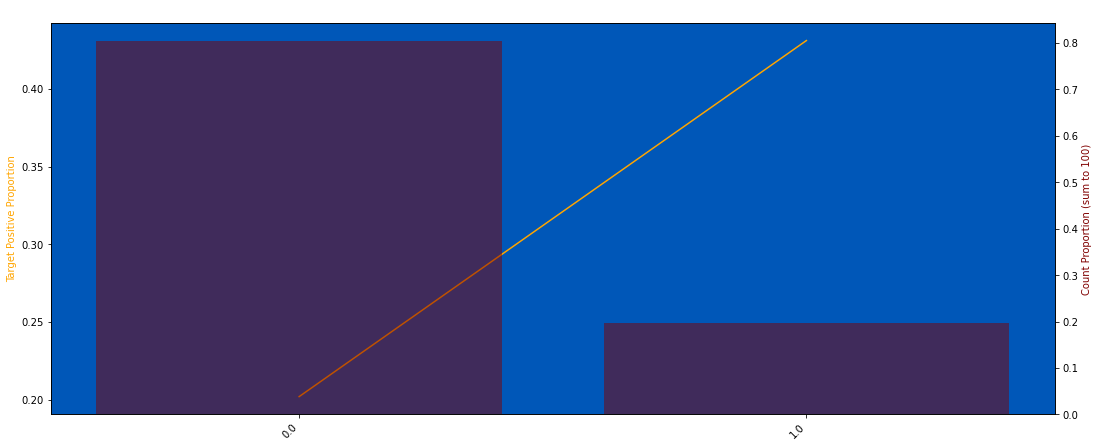

In [149]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True, without_drop_tail=True)

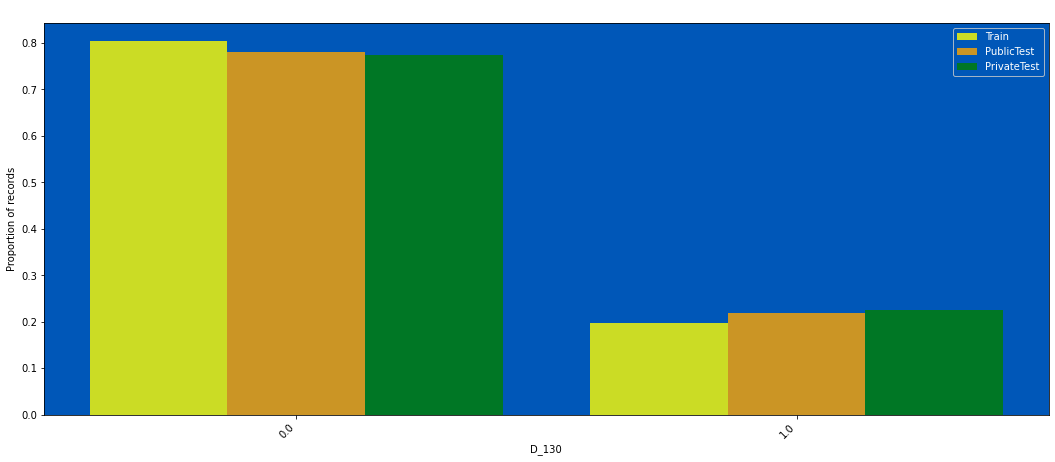

In [150]:
plot_train_test_distribution(df_list, "D_130", nunique_thr=500, without_drop_tail=True)

### D_131

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


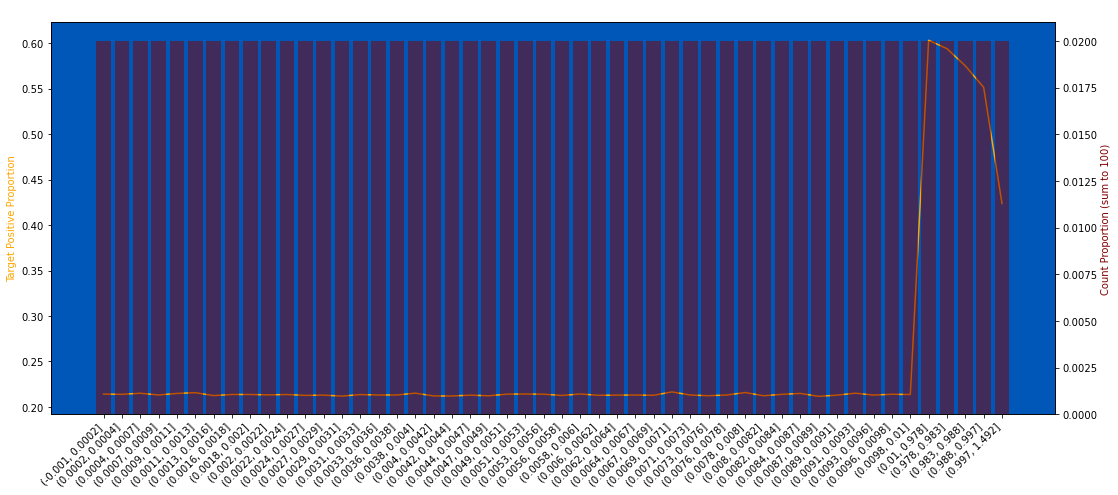

In [151]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True)

In [152]:
%%time
df_list = round_dfs(df_list, col="D_131", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 253 ms, sys: 1.17 s, total: 1.43 s
Wall time: 2.33 s


In [153]:
# %%time
# for df in df_list:
#     df["D_131"] = df["D_131"].parallel_apply(lambda x: manual_stack(x, start=1.03, stack_interval=0.16, denom=100))

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


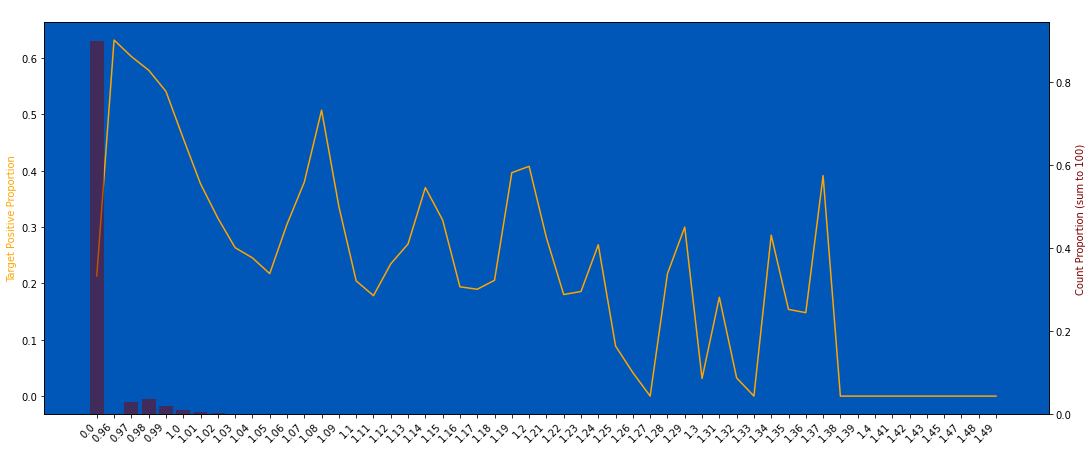

In [154]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

- 0 is NaN

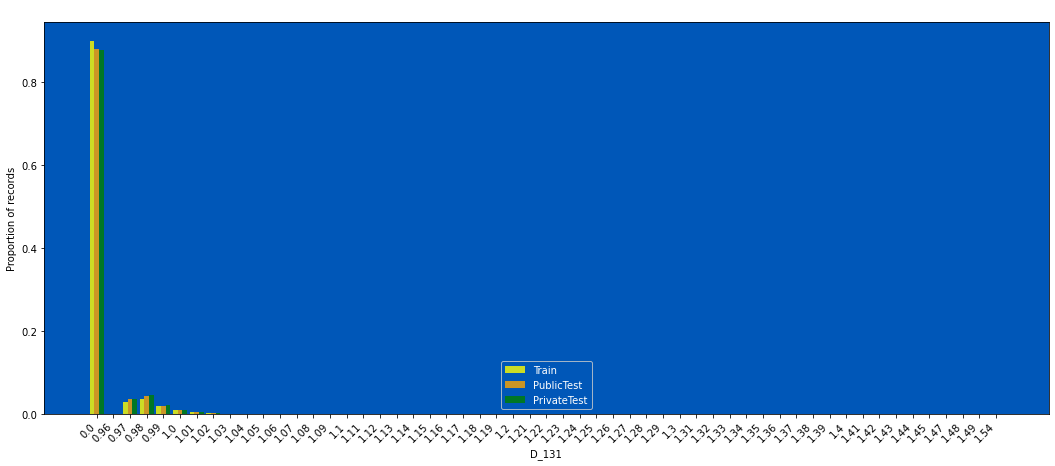

In [155]:
plot_train_test_distribution(df_list, "D_131", nunique_thr=500, without_drop_tail=True)

### D_132

4988874 null count, 0.902 null proportion
0.2164 of the targets have label = 1


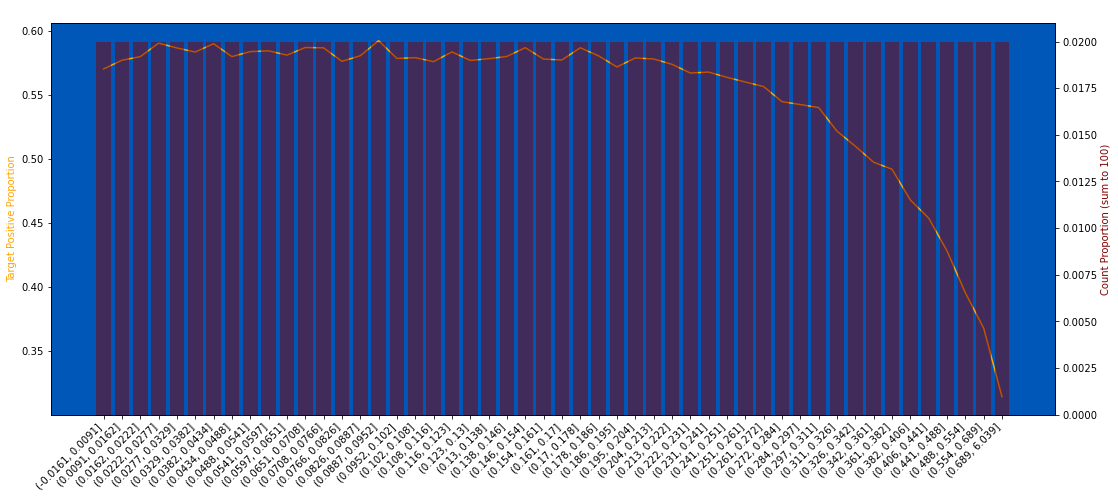

In [156]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True)

In [157]:
%%time
df_list = round_dfs(df_list, col="D_132", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 254 ms, sys: 1.11 s, total: 1.36 s
Wall time: 2.46 s


4988874 null count, 0.902 null proportion
0.2164 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


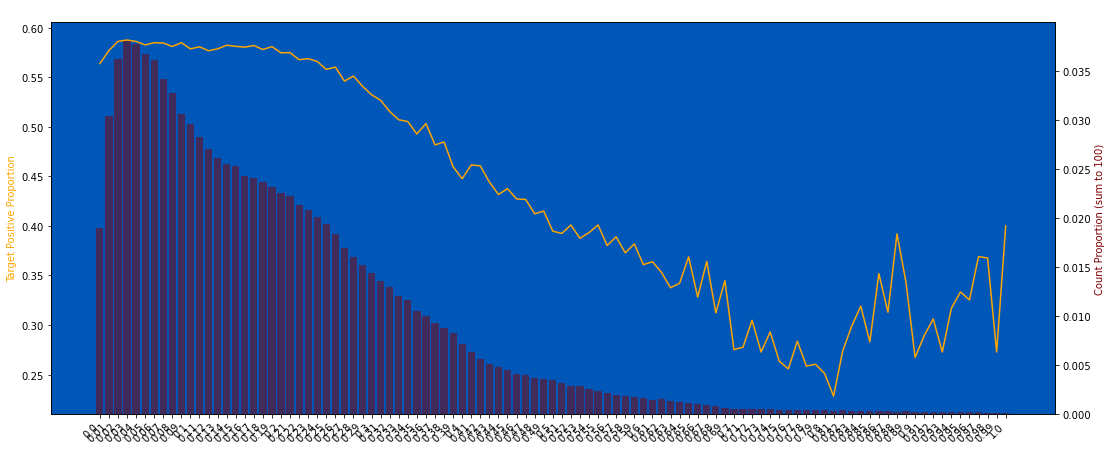

In [158]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


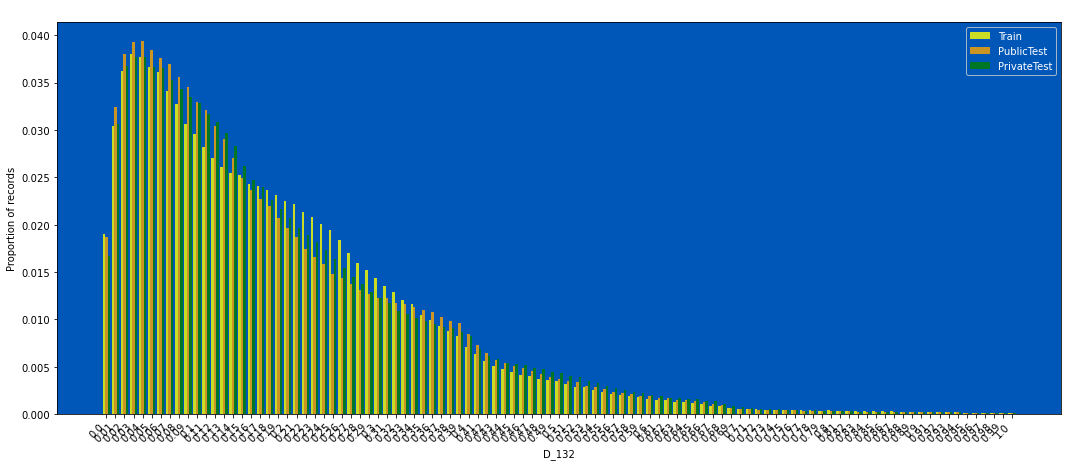

In [159]:
plot_train_test_distribution(df_list, "D_132", nunique_thr=5000)

**Train Test Drift: Moderate**

### D_133

42716 null count, 0.008 null proportion
0.4210 of the targets have label = 1


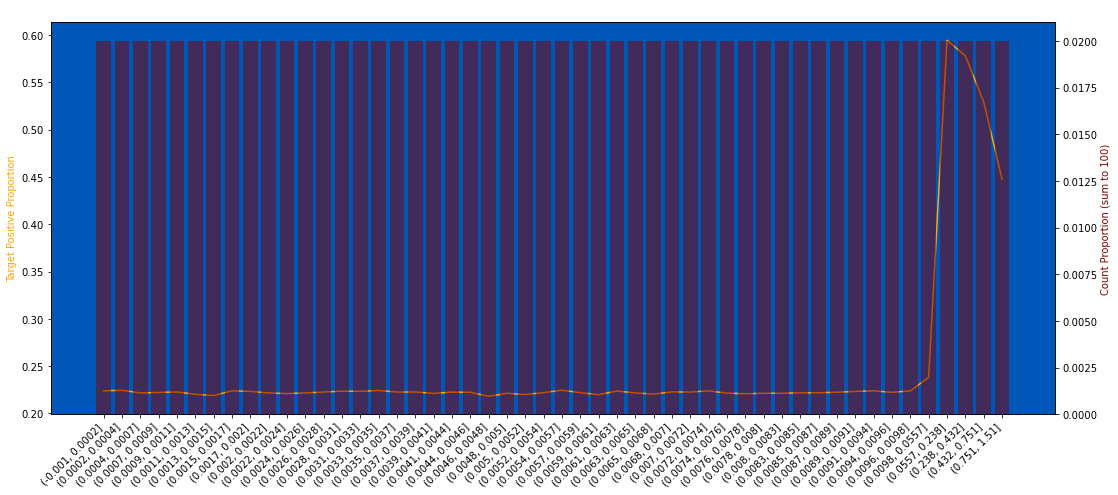

In [160]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True)

In [161]:
%%time
df_list = round_dfs(df_list, col="D_133", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 247 ms, sys: 1.16 s, total: 1.4 s
Wall time: 2.3 s


42716 null count, 0.008 null proportion
0.4210 of the targets have label = 1


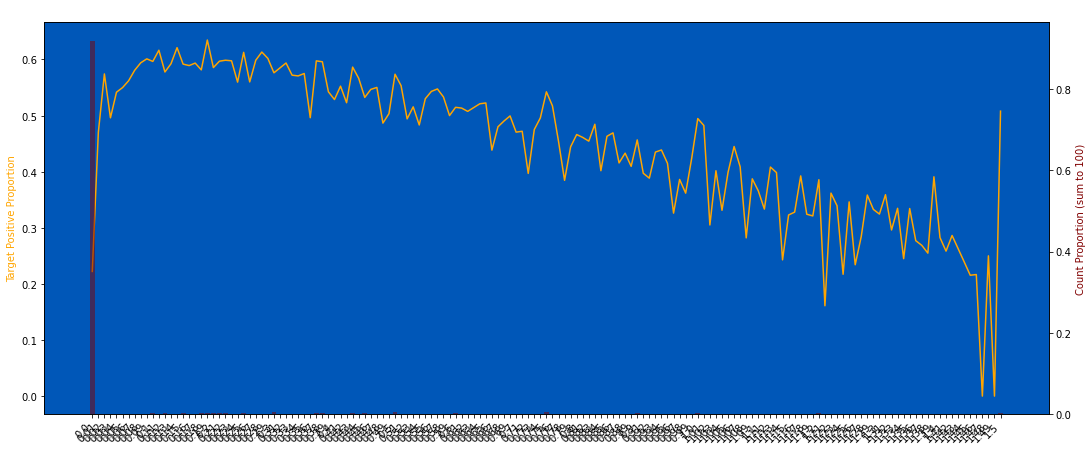

In [162]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

- 0 is NaN

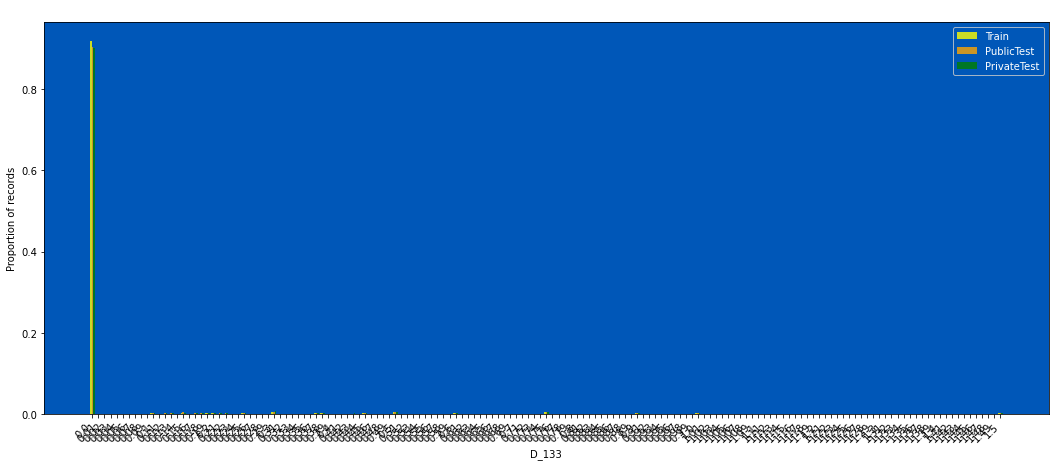

In [163]:
plot_train_test_distribution(df_list, "D_133", nunique_thr=5000, without_drop_tail=True)

### D_134

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


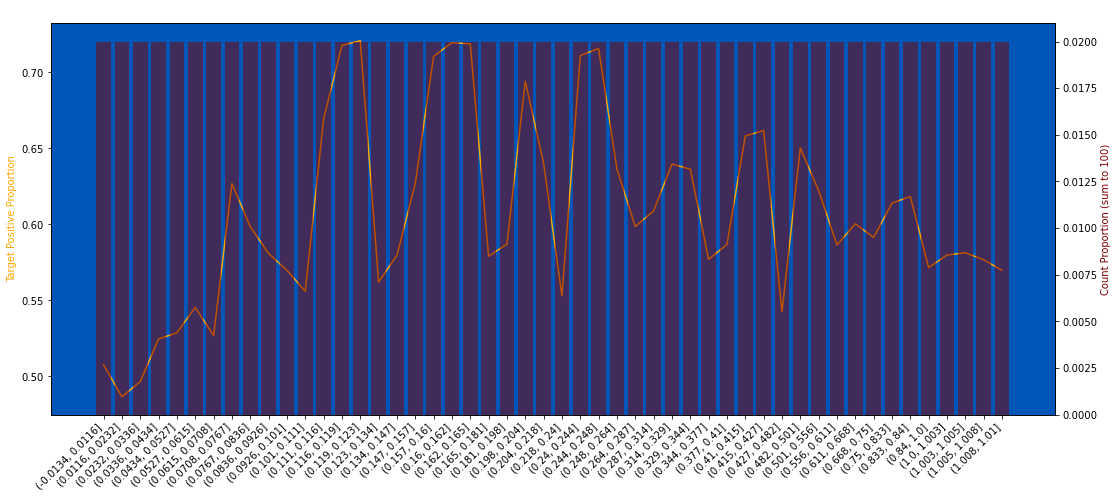

In [164]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True)

In [165]:
%%time
df_list = round_dfs(df_list, col="D_134", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 245 ms, sys: 1.09 s, total: 1.34 s
Wall time: 2.44 s


5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


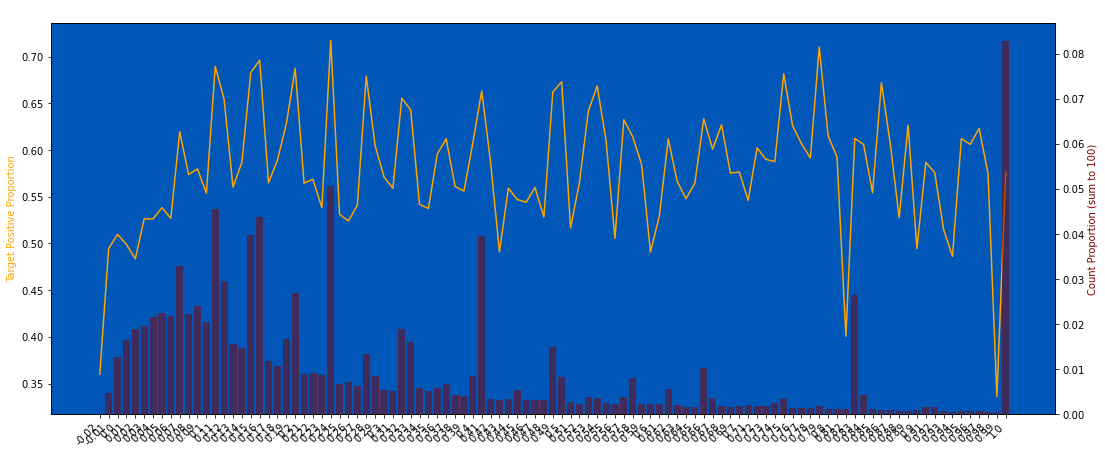

In [166]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

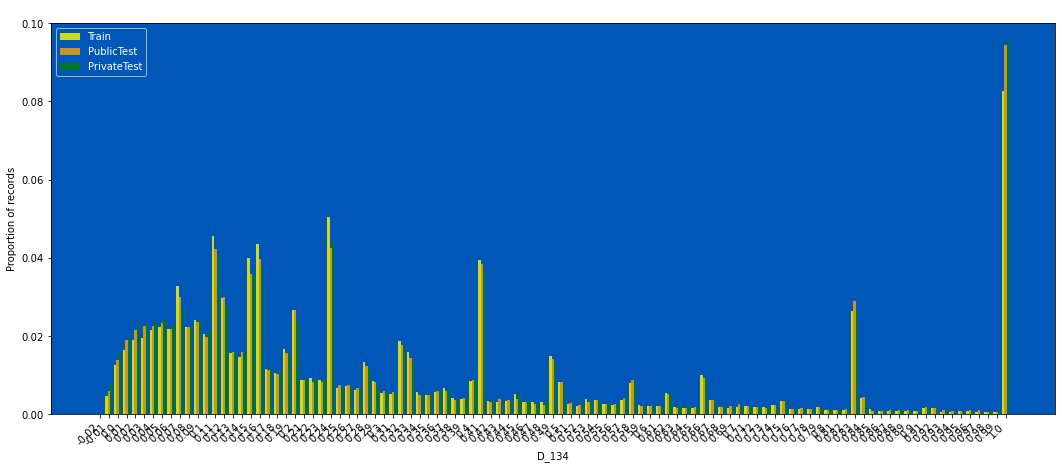

In [167]:
plot_train_test_distribution(df_list, "D_134", nunique_thr=5000, without_drop_tail=True)

### D_135 (Done)

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


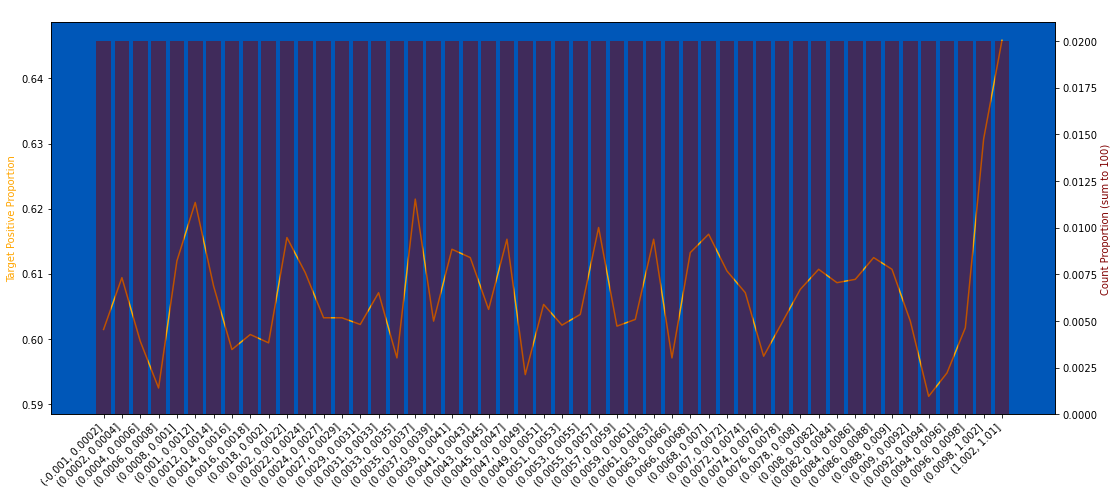

In [168]:
plot_target_check(train, "D_135", q=50, use_raw_bin=True)

In [169]:
%%time
df_list = round_dfs(df_list, col="D_135", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 237 ms, sys: 1.09 s, total: 1.32 s
Wall time: 2.42 s


5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


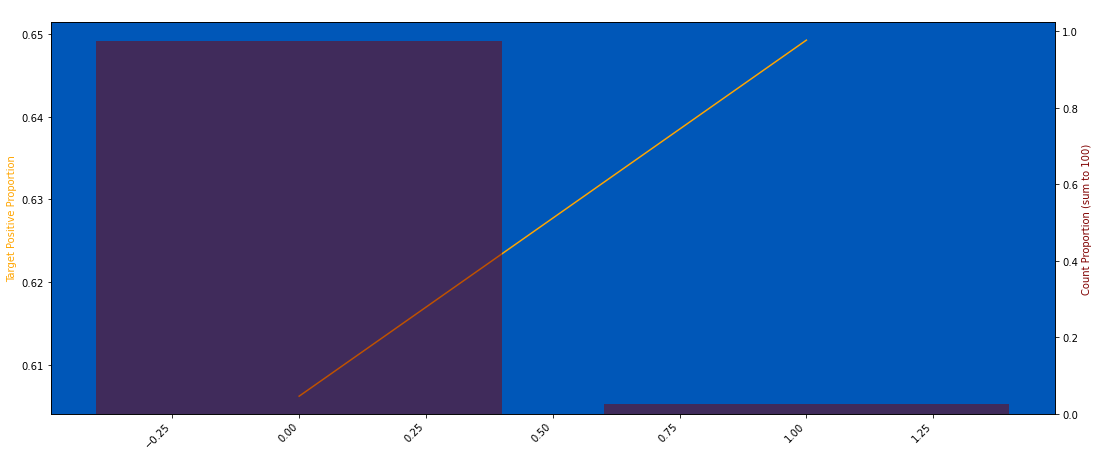

In [170]:
plot_target_check(train, "D_135", q=50, use_raw_bin=True)

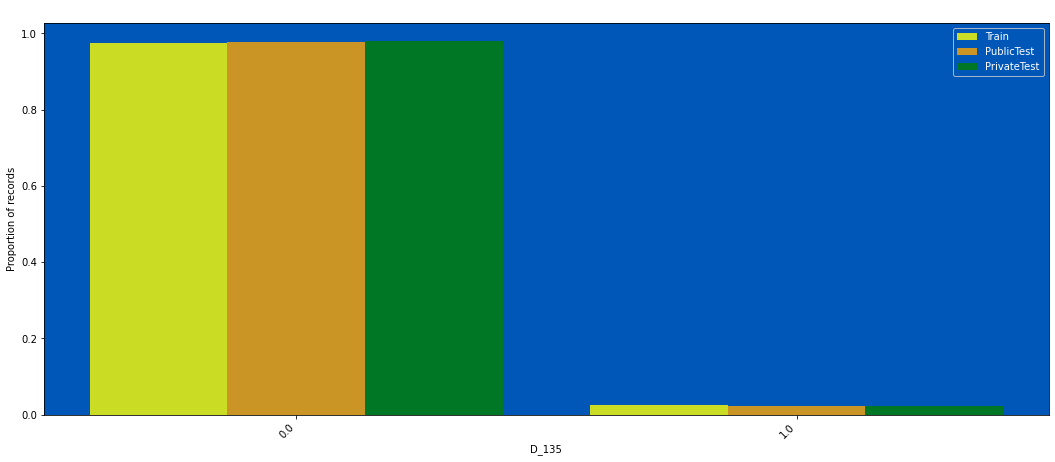

In [171]:
plot_train_test_distribution(df_list, "D_135", nunique_thr=5000, without_drop_tail=True)

### D_136

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


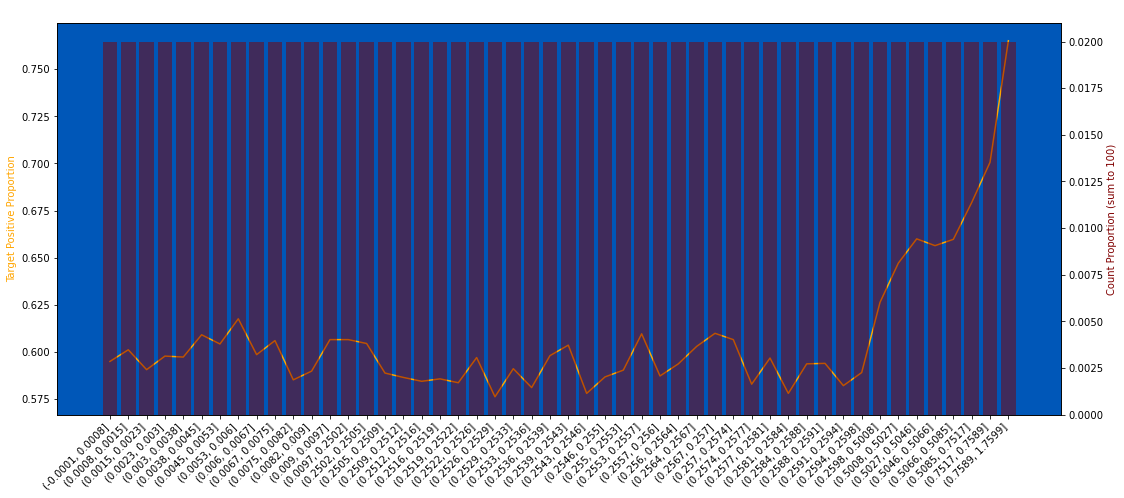

In [172]:
plot_target_check(train, "D_136", q=50, use_raw_bin=True)

In [173]:
%%time
df_list = round_dfs(df_list, col="D_136", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 239 ms, sys: 1.09 s, total: 1.33 s
Wall time: 2.42 s


In [174]:
for df in df_list:
    df["D_136_"] = (df["D_136"] * 4).round(0)

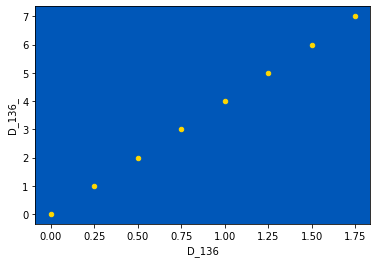

In [175]:
check_binning(train, "D_136", end=1000)

In [176]:
for df in df_list:
    df["D_136"] = (df["D_136"] * 4).round(0)

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


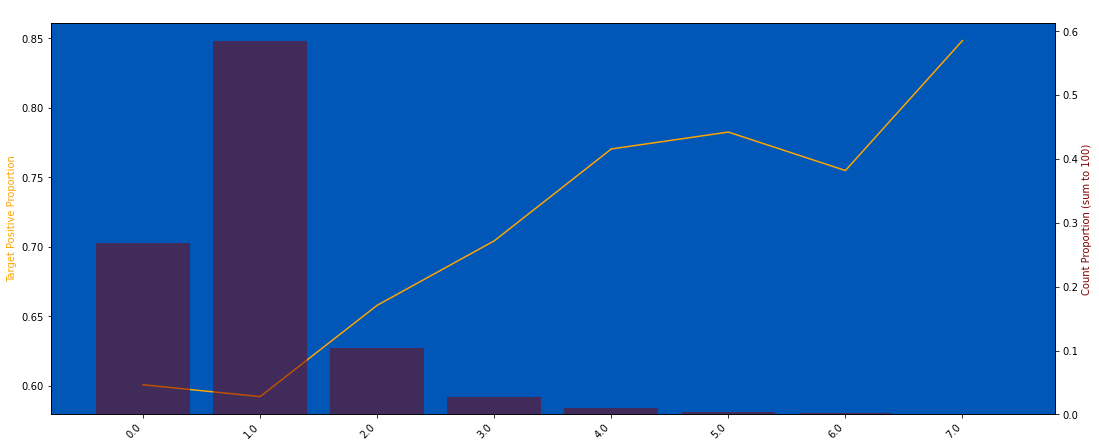

In [177]:
plot_target_check(train, "D_136", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

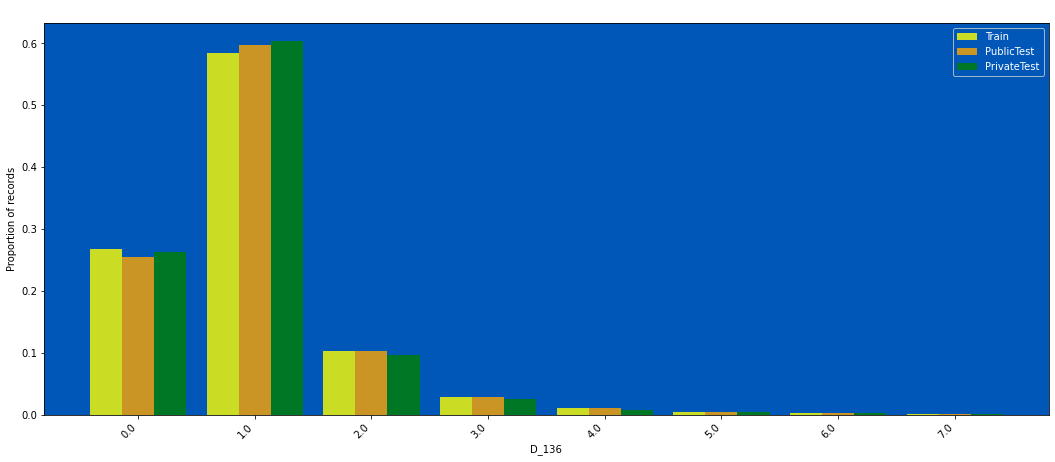

In [178]:
plot_train_test_distribution(df_list, "D_136", nunique_thr=5000, without_drop_tail=True)

### D_137 (Done)

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


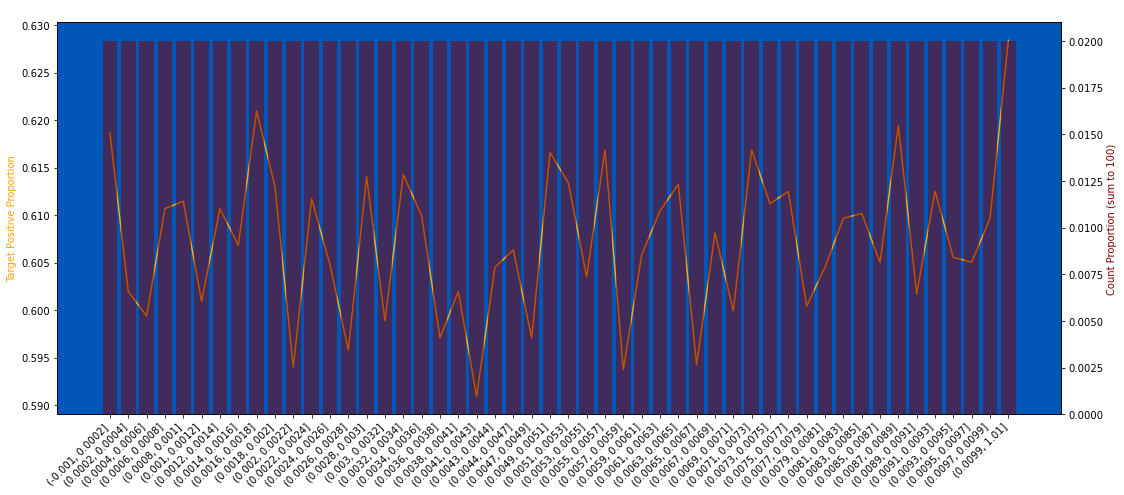

In [179]:
plot_target_check(train, "D_137", q=50, use_raw_bin=True, nunique_thr=10)

In [180]:
%%time
df_list = round_dfs(df_list, col="D_137", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 240 ms, sys: 1.11 s, total: 1.35 s
Wall time: 2.47 s


5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


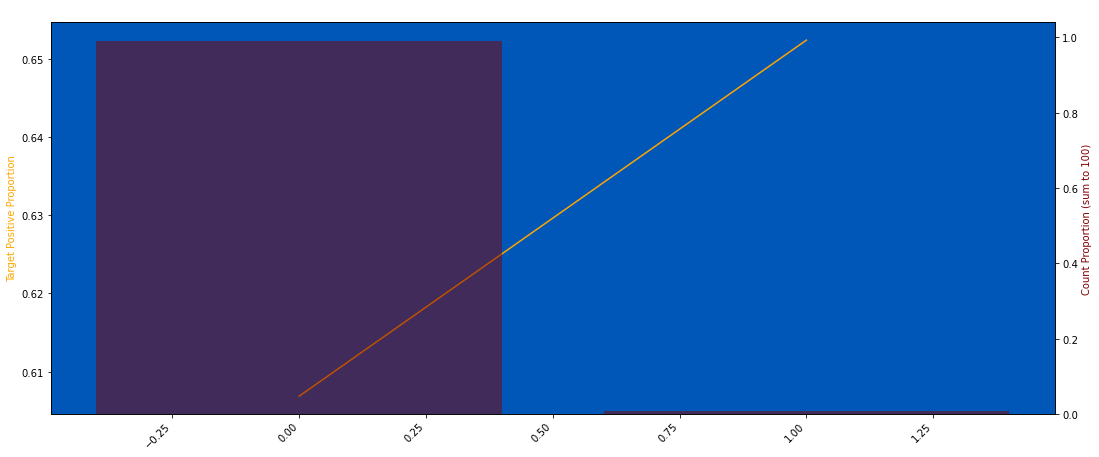

In [181]:
plot_target_check(train, "D_137", q=50, use_raw_bin=True, nunique_thr=10, without_drop_tail=True)

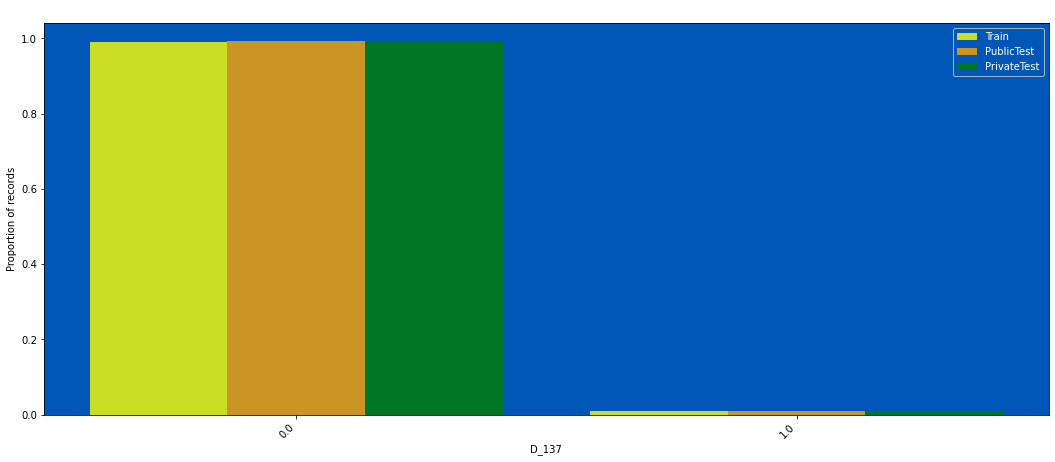

In [182]:
plot_train_test_distribution(df_list, "D_137", nunique_thr=10)

### D_138

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


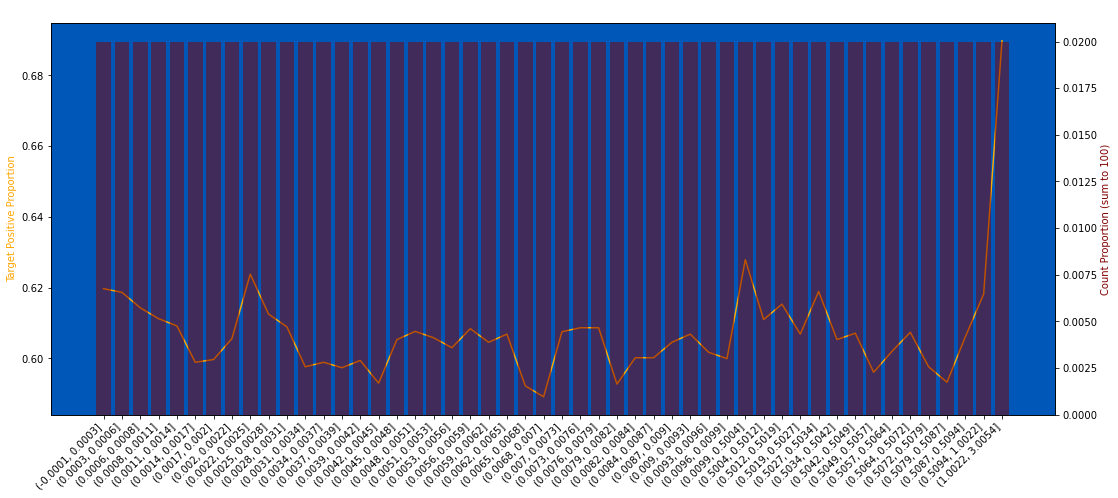

In [183]:
plot_target_check(train, "D_138", q=50, use_raw_bin=True)

In [184]:
%%time
df_list = round_dfs(df_list, col="D_138", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 237 ms, sys: 1.02 s, total: 1.26 s
Wall time: 2.38 s


In [185]:
for df in df_list:
    df["D_138_"] = (df["D_138"] * 2).round(0)

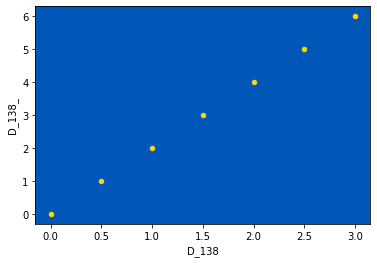

In [186]:
check_binning(train, "D_138", end=1000)

In [187]:
for df in df_list:
    df["D_138"] = (df["D_138"] * 2).round(0)

5336752 null count, 0.965 null proportion
0.2360 of the targets have label = 1


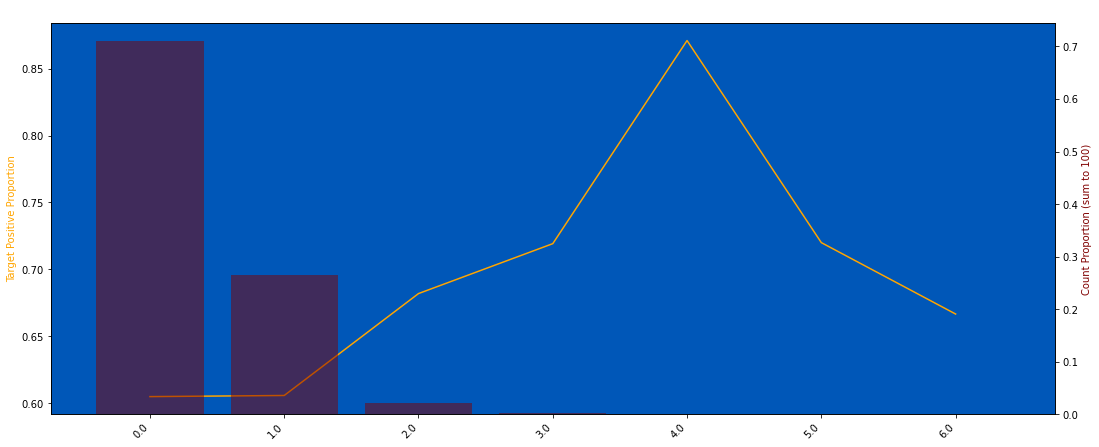

In [188]:
plot_target_check(train, "D_138", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

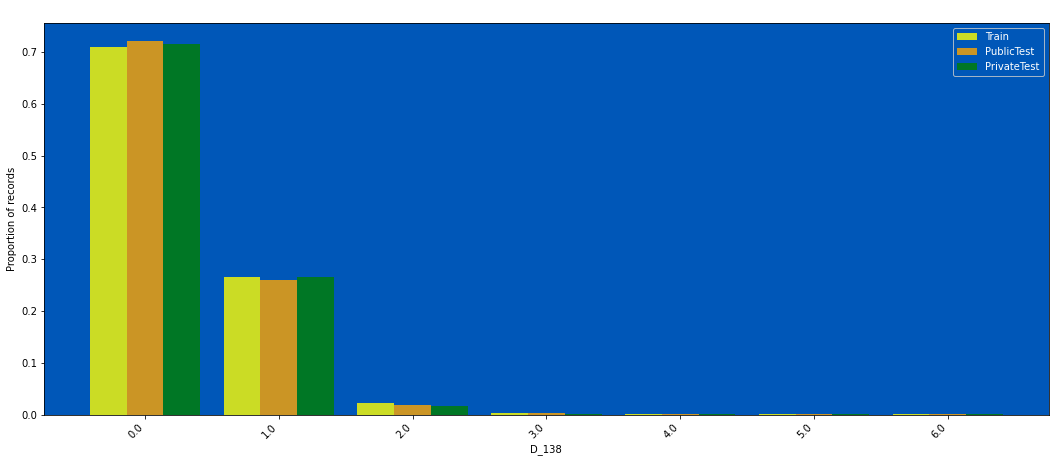

In [189]:
plot_train_test_distribution(df_list, "D_138", nunique_thr=100, without_drop_tail=True)

### D_139 (Done)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


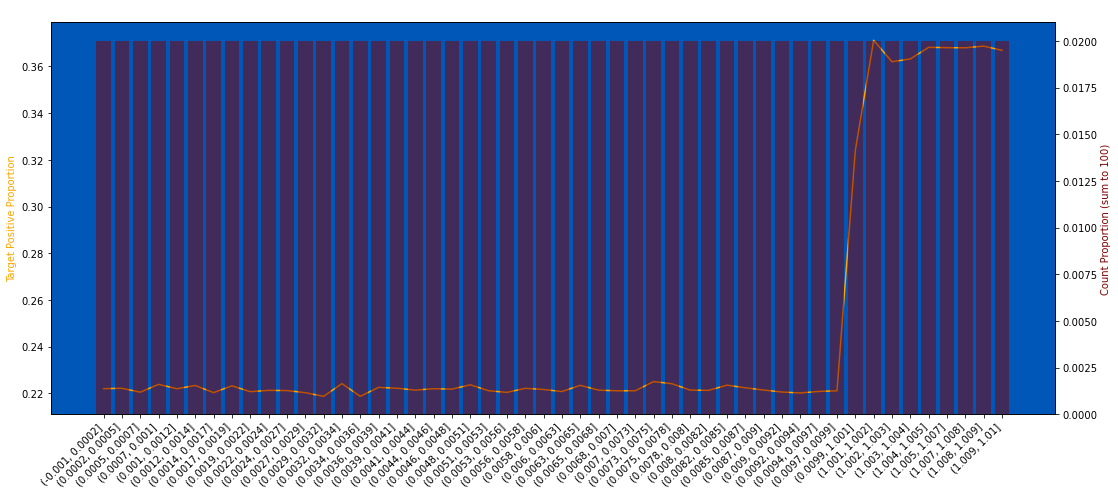

In [190]:
plot_target_check(train, "D_139", q=50, use_raw_bin=True)

In [191]:
%%time
df_list = round_dfs(df_list, col="D_139", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 227 ms, sys: 1.06 s, total: 1.28 s
Wall time: 2.21 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


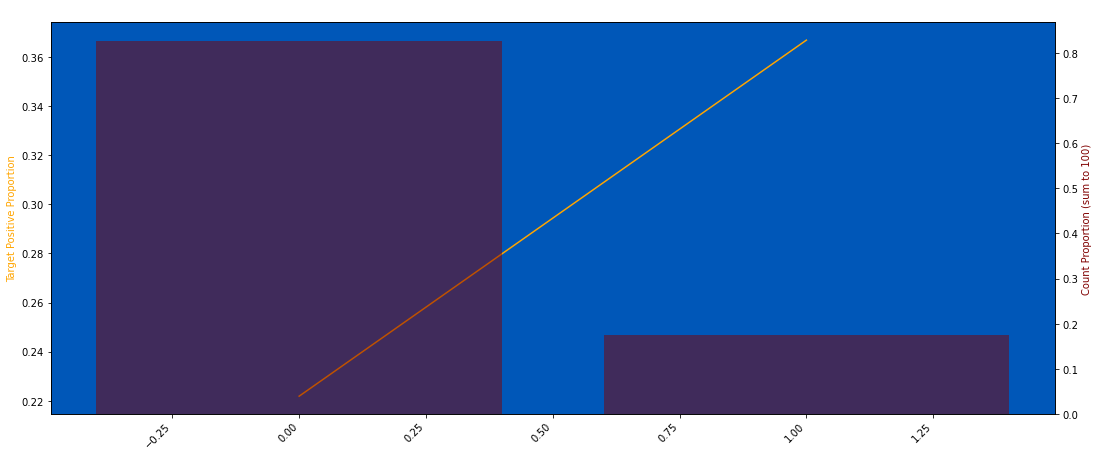

In [192]:
plot_target_check(train, "D_139", q=50, use_raw_bin=True, without_drop_tail=True)

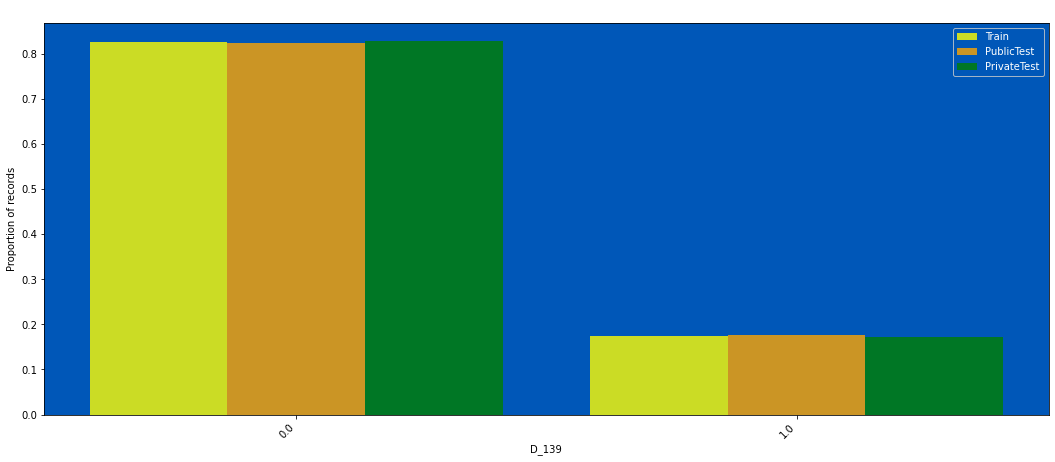

In [193]:
plot_train_test_distribution(df_list, "D_139", nunique_thr=5)

### D_140 (Done)

40632 null count, 0.007 null proportion
0.4090 of the targets have label = 1


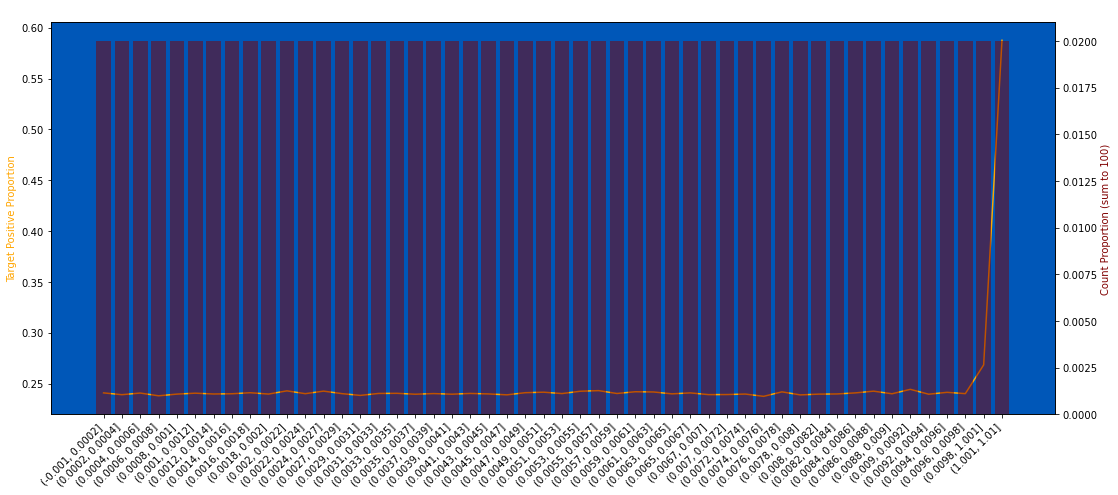

In [194]:
plot_target_check(train, "D_140", q=50, use_raw_bin=True)

In [195]:
%%time
df_list = round_dfs(df_list, col="D_140", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 232 ms, sys: 1.02 s, total: 1.25 s
Wall time: 2.16 s


40632 null count, 0.007 null proportion
0.4090 of the targets have label = 1


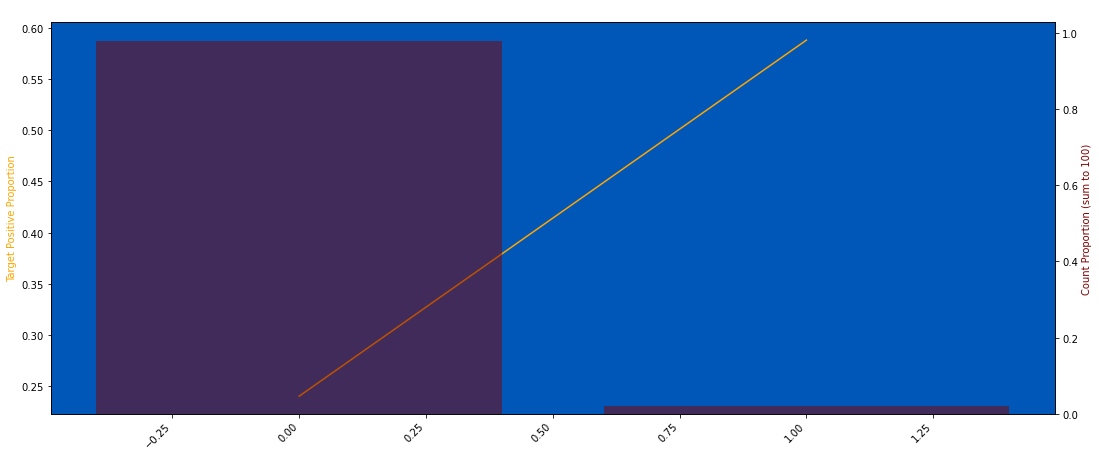

In [196]:
plot_target_check(train, "D_140", q=50, use_raw_bin=True, nunique_thr=500, without_drop_tail=True)

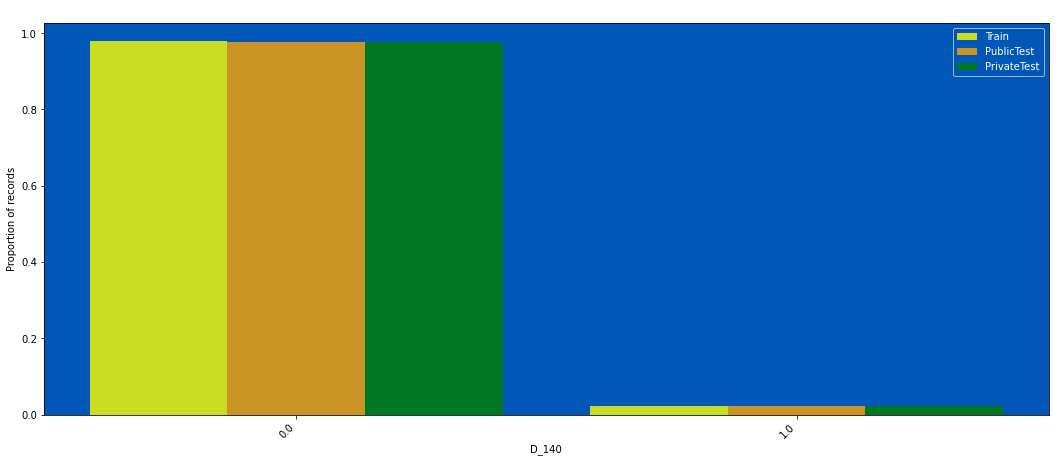

In [197]:
plot_train_test_distribution(df_list, "D_140", nunique_thr=500, without_drop_tail=True)

### D_141

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


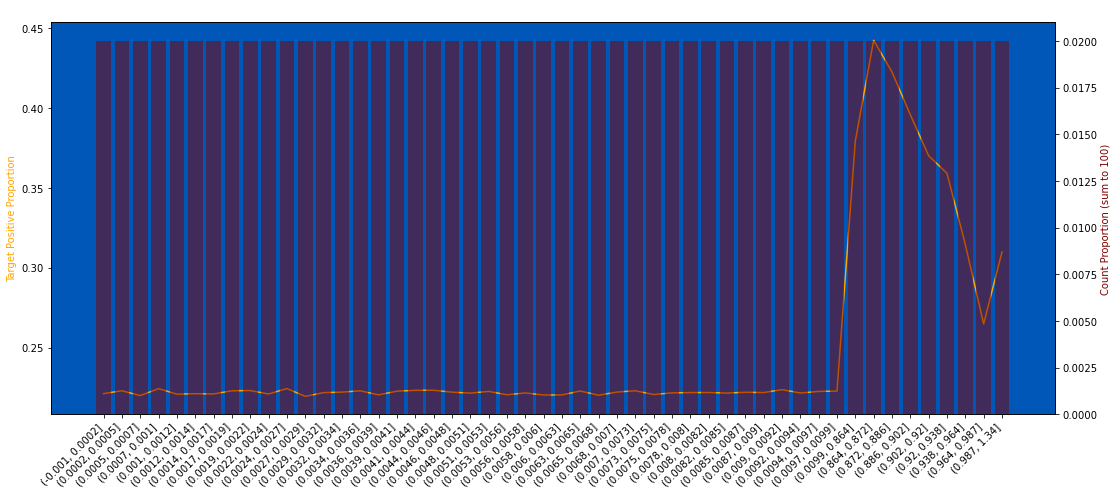

In [198]:
plot_target_check(train, "D_141", q=50, use_raw_bin=True)

In [199]:
%%time
df_list = round_dfs(df_list, col="D_141", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 224 ms, sys: 1.05 s, total: 1.27 s
Wall time: 2.19 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


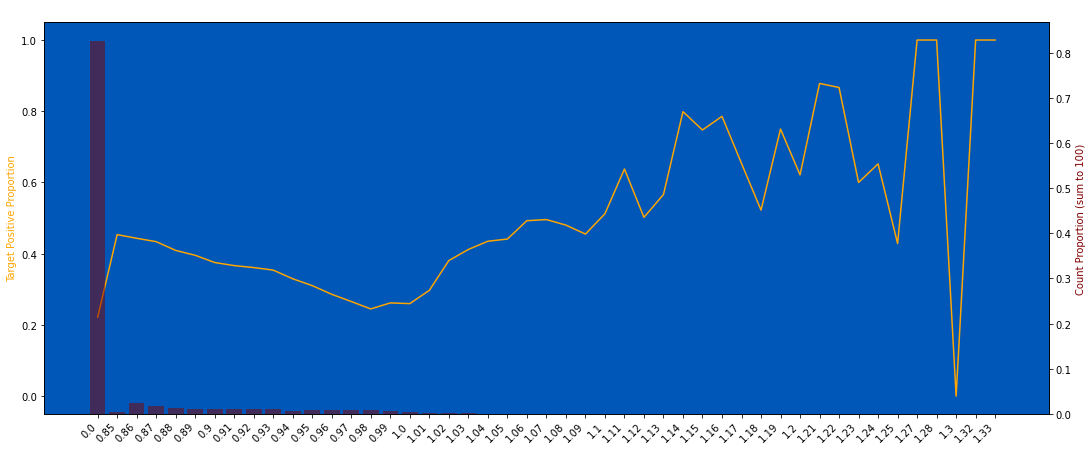

In [200]:
plot_target_check(train, "D_141", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

- 0 is NaN

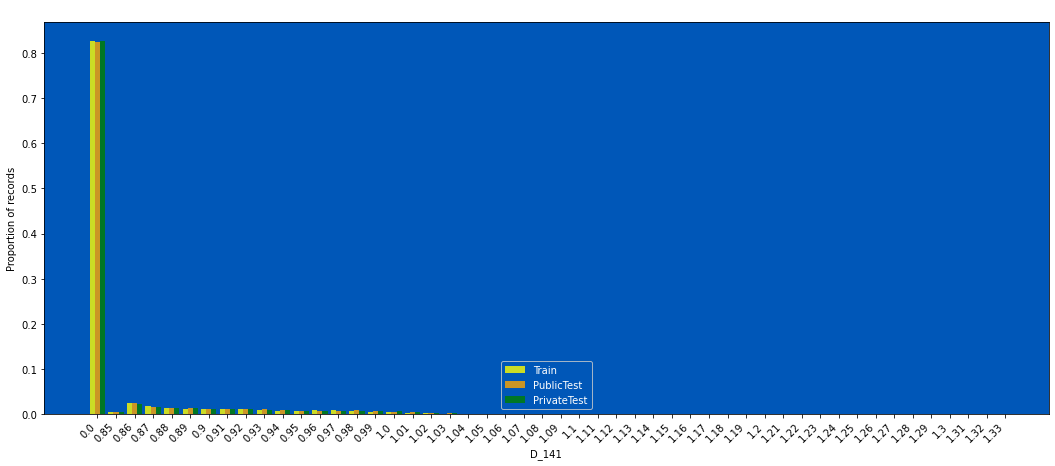

In [201]:
plot_train_test_distribution(df_list, "D_141", nunique_thr=500, without_drop_tail=True)

### D_142

4587043 null count, 0.829 null proportion
0.2248 of the targets have label = 1


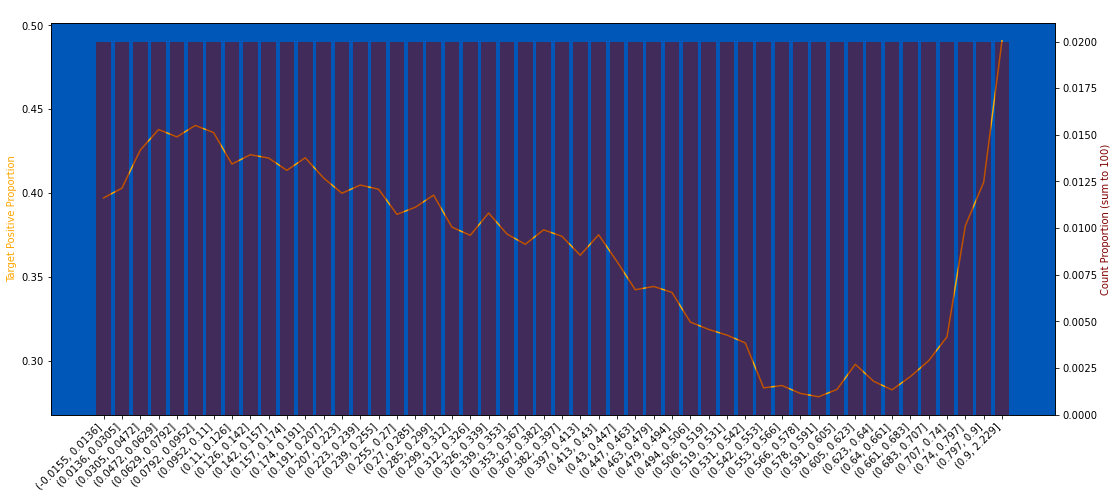

In [202]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True)

In [203]:
%%time
df_list = round_dfs(df_list, col="D_142", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 222 ms, sys: 1.05 s, total: 1.27 s
Wall time: 2.33 s


4587043 null count, 0.829 null proportion
0.2248 of the targets have label = 1


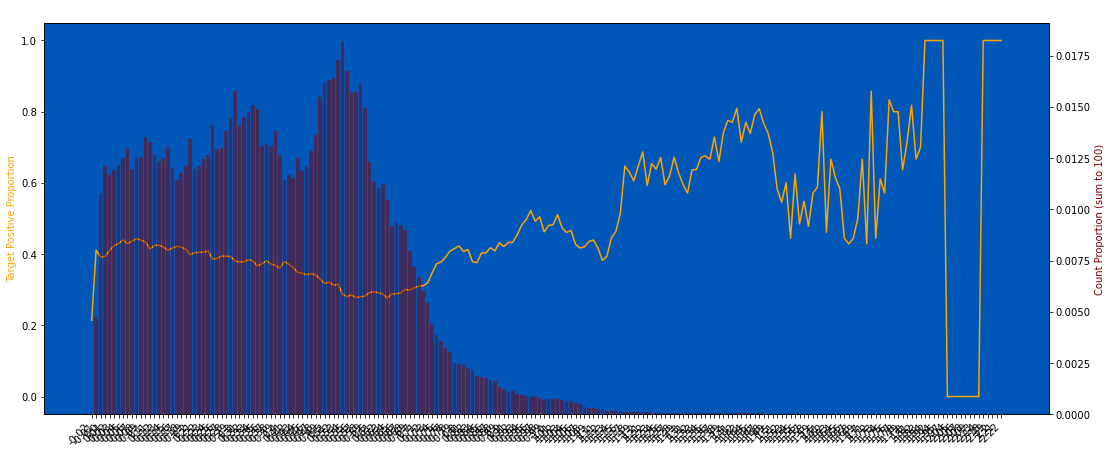

In [204]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


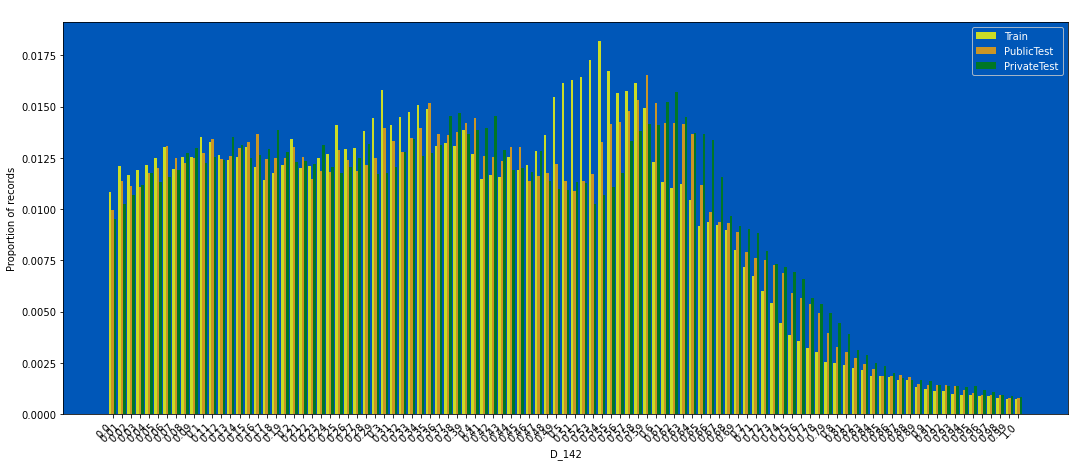

In [205]:
plot_train_test_distribution(df_list, "D_142", nunique_thr=500)

### D_143 (Done)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


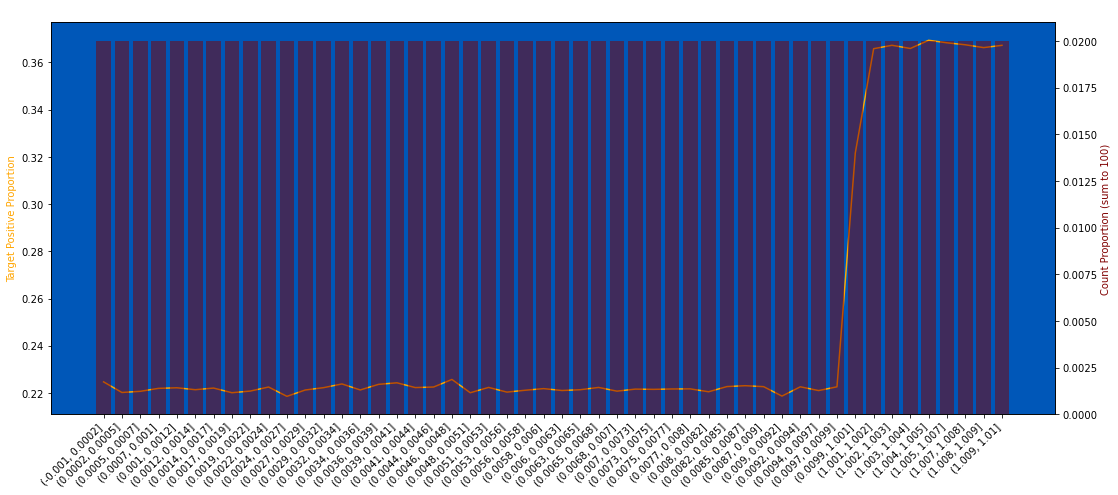

In [206]:
plot_target_check(train, "D_143", q=50, use_raw_bin=True)

In [207]:
%%time
df_list = round_dfs(df_list, col="D_143", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 214 ms, sys: 1.09 s, total: 1.3 s
Wall time: 2.21 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


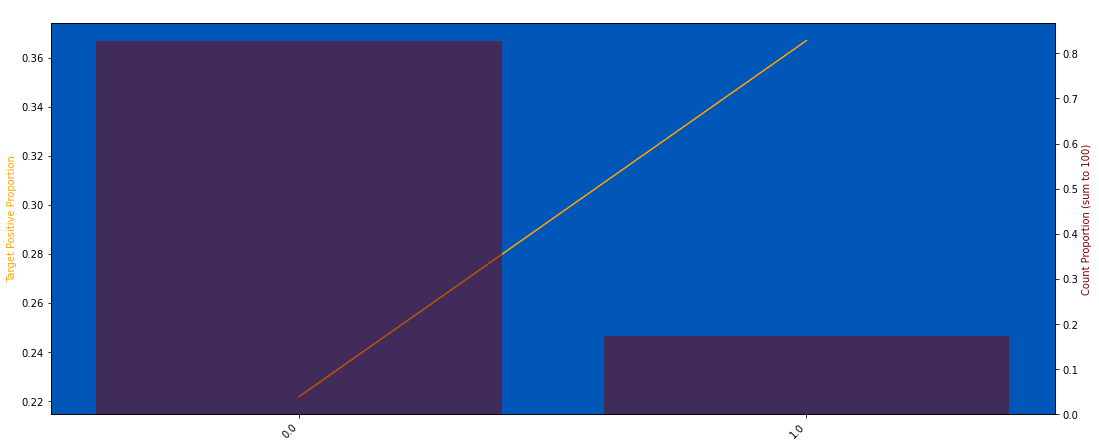

In [208]:
plot_target_check(train, "D_143", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


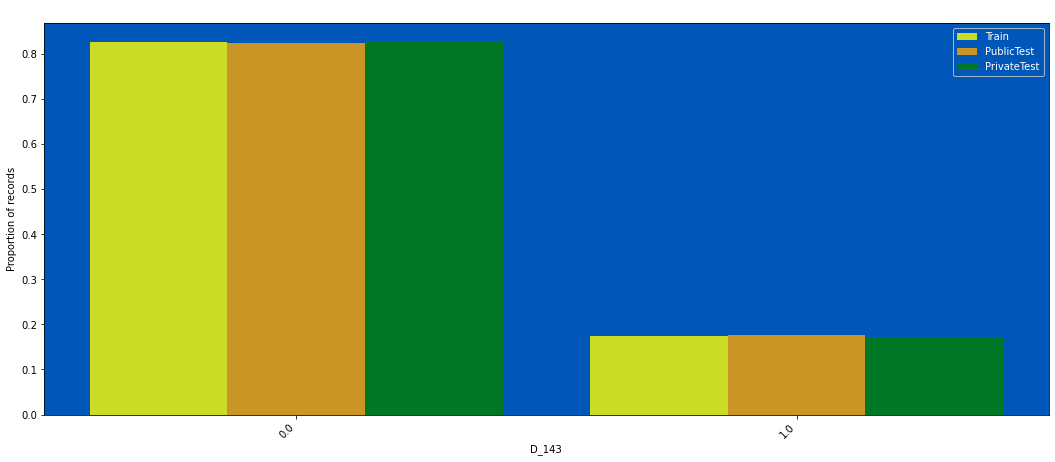

In [209]:
plot_train_test_distribution(df_list, "D_143", nunique_thr=500)

### D_144

40727 null count, 0.007 null proportion
0.4093 of the targets have label = 1


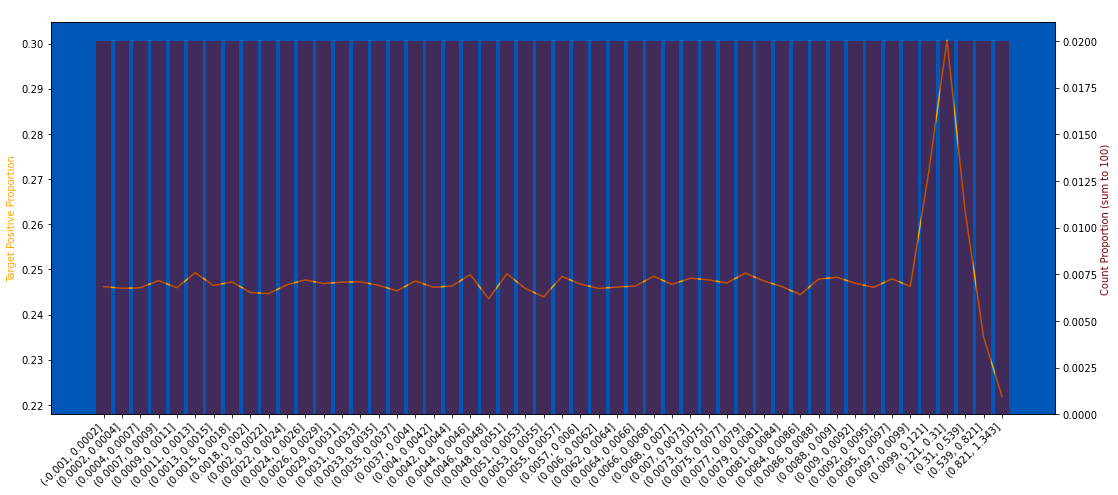

In [210]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True)

In [211]:
%%time
df_list = round_dfs(df_list, col="D_144", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 224 ms, sys: 1.04 s, total: 1.27 s
Wall time: 2.19 s


40727 null count, 0.007 null proportion
0.4093 of the targets have label = 1


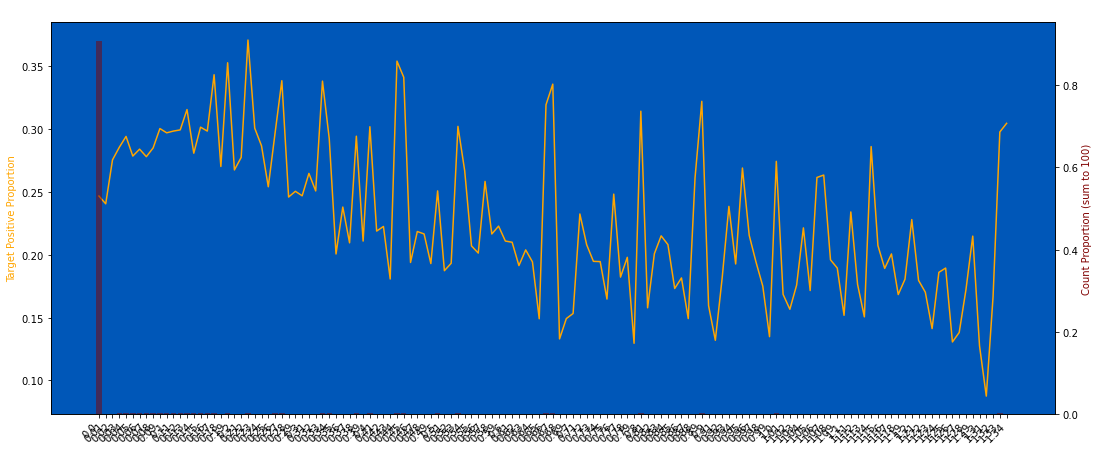

In [212]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


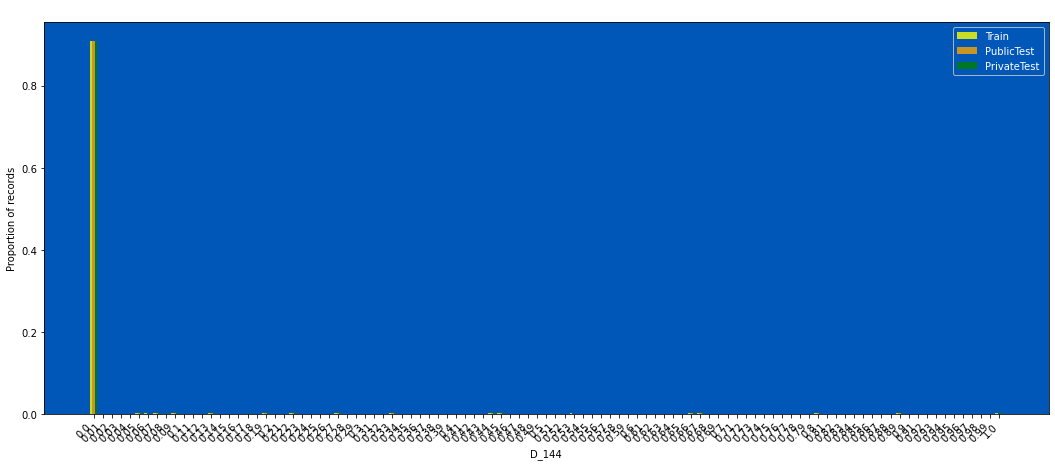

In [213]:
plot_train_test_distribution(df_list, "D_144", nunique_thr=500)

### D_145

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


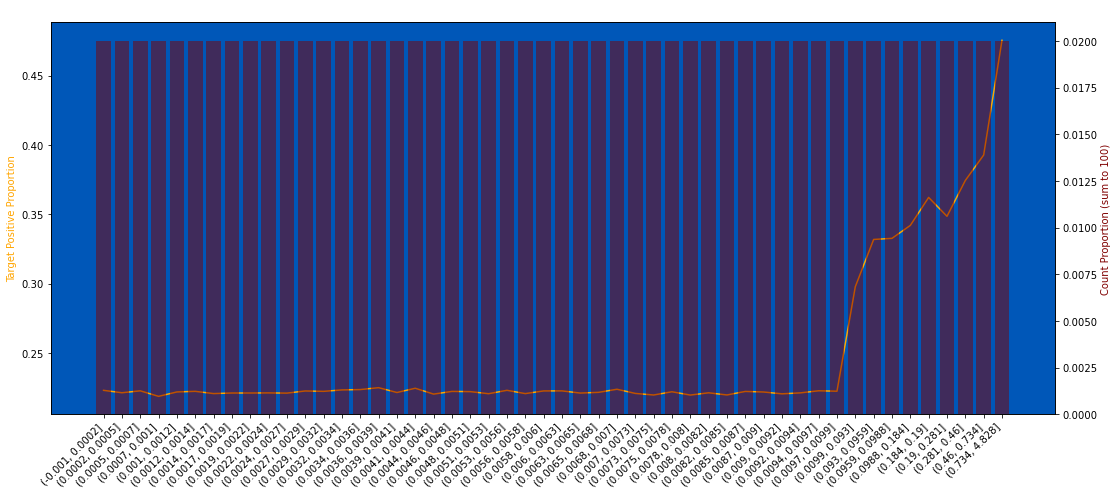

In [214]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True, nunique_thr=1000)

In [215]:
%%time
df_list = round_dfs(df_list, col="D_145", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 207 ms, sys: 1.04 s, total: 1.24 s
Wall time: 2.17 s


101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


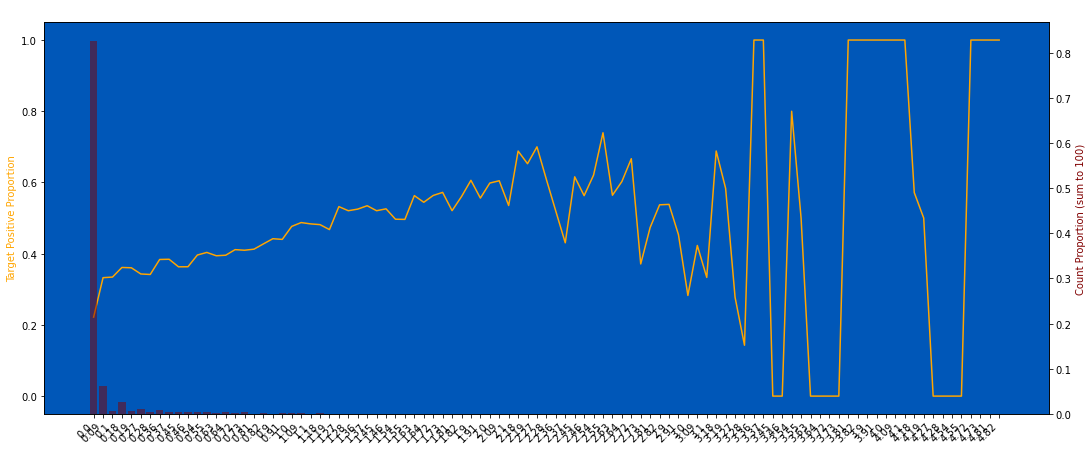

In [216]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

In [217]:
for df in df_list:
    df["D_145_"] = (df["D_145"] / 0.091).round(0)

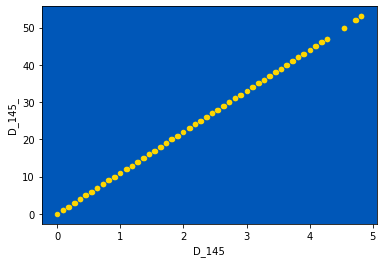

In [218]:
check_binning(train, "D_145", end=30000)

In [219]:
for df in df_list:
    df["D_145"] = (df["D_145"] / 0.091).round(0)

101548 null count, 0.018 null proportion
0.3576 of the targets have label = 1


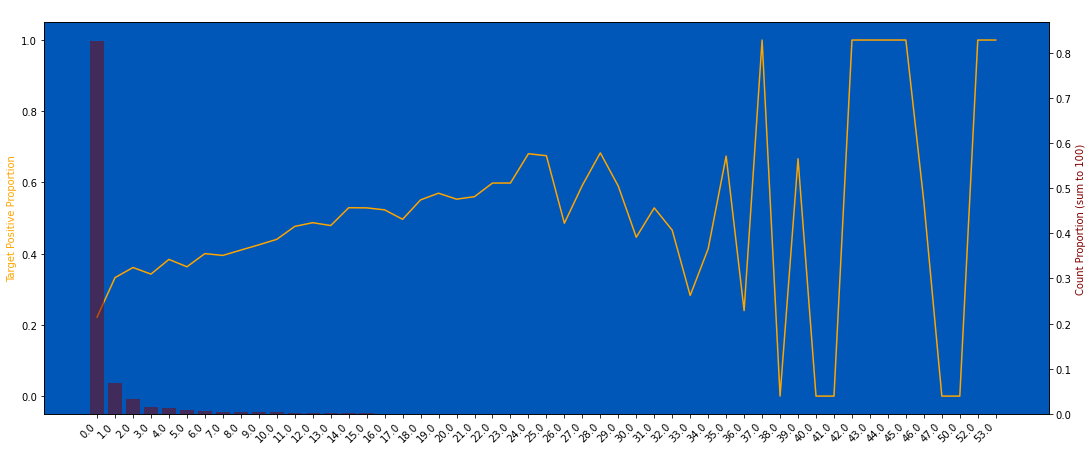

In [220]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


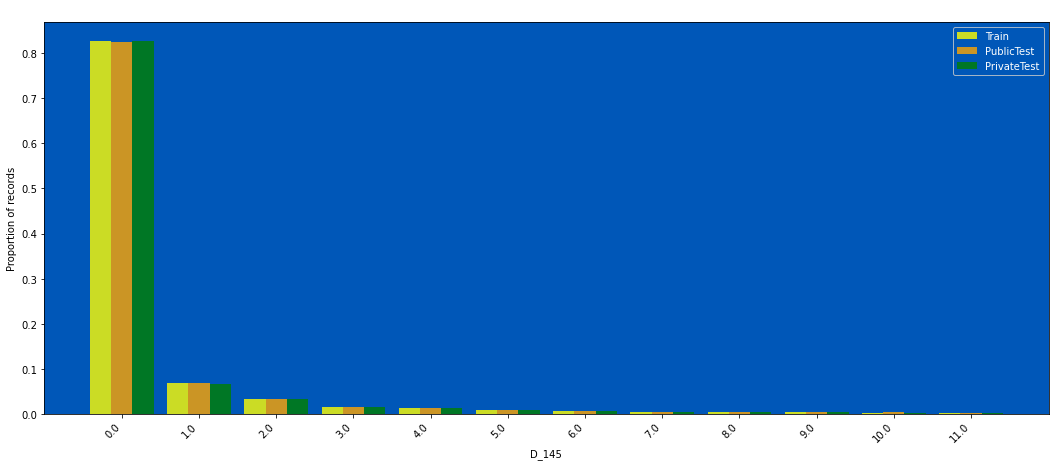

In [221]:
plot_train_test_distribution(df_list, "D_145", nunique_thr=500)

### Column checking

In [222]:
from tqdm import tqdm

In [223]:
no_use_features = ["temp"] + df_list[0].columns[df_list[0].columns.str.endswith("_")].tolist()
no_use_features

['temp',
 'D_106_',
 'D_107_',
 'D_110_',
 'D_111_',
 'D_113_',
 'D_122_',
 'D_124_',
 'D_136_',
 'D_138_',
 'D_145_']

In [224]:
%%time
for df in df_list:
    df.drop(columns=no_use_features, errors="ignore", inplace=True)

CPU times: user 1.53 s, sys: 2.67 s, total: 4.2 s
Wall time: 3.94 s


In [227]:
all_columns = get_cols(df_list[0], ["D_"])
print(all_columns)

['D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']


In [231]:
d_col_nunique = df_list[0][all_columns].nunique()
less_unique_d_cols = d_col_nunique[d_col_nunique < 99].index.tolist()
for d in less_unique_d_cols:
    if df_list[0][d].dtype != np.int32:
        print(d, ":", df_list[0][d].dtype, "\n", sorted(df_list[0][d].unique().tolist()), "\n")

D_104 : float64 
 [0.0, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, nan, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.2, 1.21, 1.23, 1.29, 1.3] 

D_131 : float64 
 [0.0, 0.97, 0.99, 1.0, nan, 0.96, 0.98, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.45, 1.47, 1.48, 1.49] 

D_141 : float64 
 [0.0, 0.86, 0.87, nan, 0.85, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.27, 1.28, 1.3, 1.32, 1.33] 



In [229]:
cols = list(
    set(less_unique_d_cols) - set(["D_104", "D_131", "D_141"])
)

In [230]:
for col in tqdm(cols):
    for df in df_list:
        df[col] = integerize(df[col])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.85it/s]


In [234]:
%%time
train = df_list[0]
test = pd.concat(df_list[1:], axis=0)
test = test.sort_values(by=["customer_ID", "S_2"]).reset_index(drop=True)

CPU times: user 5.34 s, sys: 4.21 s, total: 9.55 s
Wall time: 11.7 s


In [235]:
train.shape, test.shape

((5531451, 47), (11363762, 46))

In [236]:
float64_columns = train.select_dtypes("float64").columns.tolist()
for col in float64_columns:
    temp = df_list[-1][col].astype(np.float32).values
    if (temp - df_list[-1][col]).abs().max() < 1e-4:
        print(f"{col} fulfill criteria to convert to float32")
        for df in df_list:
            df[col] = df[col].astype(np.float32)

D_102 fulfill criteria to convert to float32
D_104 fulfill criteria to convert to float32
D_105 fulfill criteria to convert to float32
D_106 fulfill criteria to convert to float32
D_115 fulfill criteria to convert to float32
D_118 fulfill criteria to convert to float32
D_119 fulfill criteria to convert to float32
D_121 fulfill criteria to convert to float32
D_131 fulfill criteria to convert to float32
D_132 fulfill criteria to convert to float32
D_133 fulfill criteria to convert to float32
D_134 fulfill criteria to convert to float32
D_141 fulfill criteria to convert to float32
D_142 fulfill criteria to convert to float32
D_144 fulfill criteria to convert to float32


In [237]:
for d in tqdm(all_columns):
    for df in df_list:
        df[d] = df[d].fillna(-127)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 16.65it/s]


In [239]:
%%time
train.to_parquet(f"{INTERIM_TRAIN_PARQUET_PATH}/delinquency2.parquet")
test.to_parquet(f"{INTERIM_TEST_PARQUET_PATH}/delinquency2.parquet")

CPU times: user 9.75 s, sys: 1.14 s, total: 10.9 s
Wall time: 10.2 s


In [240]:
END = time.time()

In [241]:
print(f"{END - START:.2f} seconds elapsed")

458.15 seconds elapsed


In [242]:
train.tail()

customer_ID        S_2  D_102  \
5531446  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2017-11-05 0.0000   
5531447  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2017-12-23 0.0000   
5531448  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2018-01-06 0.0000   
5531449  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2018-02-06 0.0000   
5531450  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea... 2018-03-14 0.0000   

         D_103  D_104     D_105     D_106  D_107  D_108  D_109  ...  D_137  \
5531446      0 0.0000 -127.0000 -127.0000      0   -127      0  ...   -127   
5531447      0 0.0000 -127.0000 -127.0000      0   -127      0  ...   -127   
5531448      0 0.0000 -127.0000 -127.0000      0   -127      0  ...   -127   
5531449      0 0.0000 -127.0000 -127.0000      0   -127      0  ...   -127   
5531450      0 0.0000 -127.0000 -127.0000      0   -127      0  ...   -127   

         D_138  D_139  D_140  D_141     D_142  D_143  D_144  D_145  target  
5531446   -127      0      0 0.0000 -127.0000      0 0.0000      0       0  
5531447   -127      0      0 0.0000 -127.0000      0 0.0000      0       0  
5531448   -127      0      0 0.0000 -127.0000      0 0.0000      0       0  
5531449   -127      0      0 0.0000 -127.0000      0 0.0000      0       0  
5531450   -127      0      0 0.0000 -127.0000      0 0.0000      0       0  

[5 rows x 47 columns]

In [247]:
t = read_file(f"{INTERIM_TRAIN_PARQUET_PATH}/delinquency_part2.parquet", replace_negative127=False)

Shape of data: (5531451, 47)
